In [1]:
from brian import *
from numpy.fft import rfft,irfft
from scipy.io import savemat
import numpy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
def Calc_mean_membran_potential_per_bin(Membrane_potential_monitor):
    Mean_potential_per_ms = []
    Mean_potential_per_bin = []
    
    for j in range(len(Membrane_potential_monitor.values[0])):
        Mean_potential_per_ms.append(statistics.mean(Membrane_potential_monitor.values[:,j]))
    
    for i in range(0,len(Mean_potential_per_ms),2000):
        Mean_potential_per_bin.append(statistics.mean(Mean_potential_per_ms[i:i+200]))
    
    return(Mean_potential_per_bin)





In [ ]:
Mean_potential_per_bin_1pA = []

Mean_potential_per_bin_1pA = Calc_mean_membran_potential_per_bin(Membrane_potential_monitor_e)

In [ ]:
Mv_rate_10pA  = Mv.rate

In [ ]:
Mv_rate_0pA

In [ ]:


fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(Mean_potential_per_bin_11pA, Mv_rate_11pA, c='blue', label = '11 pA ', alpha=0.5, edgecolors='none')
ax.scatter(Mean_potential_per_bin_10pA, Mv_rate_10pA, c='black', label = '10 pA ',alpha=0.5, edgecolors='none')
ax.scatter(Mean_potential_per_bin_12pA, Mv_rate_12pA, c='orange', label = '12 pA ',alpha=0.5, edgecolors='none')
#ax.scatter(Mean_potential_per_bin_5A, Mv_rate_5A, c='green', label = '5 pA ',alpha=0.5, edgecolors='none')
#ax.scatter(Mean_potential_per_bin_11A, Mv_rate_11A, c='red', label = '11 pA ',alpha=0.5, edgecolors='none')
#ax.scatter(Mean_potential_per_bin_15pA, Mv_rate_15pA, c='magenta', label = '15 pA ',alpha=0.3, edgecolors='none')

ax.set_xlabel('Membrane potential V')
ax.set_ylabel('Firing rate Hz')
ax.set_title(r' tDCS 10,9,15 pA')
ax.set_ylim([0, 70])
ax.set_xlim([min(Mean_potential_per_bin_15pA), max(Mean_potential_per_bin_15pA)])

#plt.show()
plt.legend()

fig.savefig('varied tDCS.png')

In [ ]:
#import matplotlib.pyplot as plt 

plt.scatter(Mean_potential_per_bin_12pA, Mv_rate_12pA)

# x-axis label 
plt.xlabel('Membrane potential in V') 
# frequency label 
plt.ylabel('Firing rate Hz ') 
# plot title 
plt.title('tDCS 12 pA') 

#plt.axis([min(Mean_potential_per_bin_11A), max(Mean_potential_per_bin_11A), min(Mv.rate), 60])
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 


In [ ]:
Mean_potential_per_bin_15pA

In [2]:

clear()

############################################################################################
#
#   Simulation code for "A computational model of Major Depression: The role of glutamate 
#     dysfunction on cingulo-frontal network dynamics" 
#     Ramirez-Mahaluf J.P., Roxin A., Mayberg H.S. and Compte A. Cerebral Cortex, 2015
#
############################################################################################


# This Python code requires the installation of Brian www.briansimulator.org



#Network parameters

NE=80                    # Excitatory neurons, for fast simulations in the article we use 80
NI=20                     # Inhibitory neurons, for fast simulations in the article we use 20

#Biophysical parameters
tauav = 2*ms            # tau AMPA decay on vACC, this parameter was used to simulate MDD. Mild MDD (2.5%) = 2.05; Moderate MDD (5%) = 2.1; Severe MDD (7.5%) = 2.15
tauad = 2*ms            # tau AMPA decay on dlPFC
taun = 100*ms          # tau NMDA decay
taux = 2*ms              # tau NMDA rise
taug = 10*ms            # tau GABA decay
Vt  =-50*mvolt           # spike threshold
Vr  =-55*mvolt           # reset value
Elv  =-70*mvolt         # resting potential ventral ACC, this parameter was used to simulate SSRI treatment.
El  =-70*mvolt           # resting potential dlPFC
Ven = 16.129*mV      
refE= 2*ms		 # refractory periods piramidal cell
refI= 1*ms                 # refractory period inhibitory cell
cmE= 500*pF             #capacitance piramidal cel   
cmI= 200*pF              #capacitance interneuron  
tauE =20*ms              #tau piramidal cel
tauI =10*ms               #tau interneuron 
alpha =0.5*kHz
S=1	#Connectivity sparsensess; S=1, all-to-all connectivity was used in the article; use S<1 for sparse random connectivity
N=800/NE                  # Factor for rescaling the weights according to the number of neurons 

tdcs_start_time = 0*ms
tdcs_end_time = 25000*ms
tdcs_current = 0*pamp


#Connection parameters
wgEEN = 0.001761*(1/S)*N     #weight  excitatory to excitatory through NMDA
wgEEA = 0.0009454*(1/S)*N    #weight  excitatory to excitatory through AMPA
wgEIN = 0.0012*(1/S)*N         #weight  excitatory to inhibitory through NMDA
wgEIA = 0.0004*(1/S)*N         #weight  excitatory to inhibitory through AMPA
wgIEG = 0.005*(1/S)*N          #weight inhibitory to excitatory through GABA
wgIIG = 0.004865*(1/S)*N     #weight inhibitory to  inhibitory through GABA
wgEIA1 = 0.0004*(1/S)*N      #weight vACC excitatory to dlPFC inhibitory through NMDA
wgEIA2 = 0.0004*(1/S)*N      #weight  dlPFC excitatory to vACC excitatory through NMDA


#equations excitatory cell vACC 
eqsE1 = '''
dV/dt = (-gea*V-gen*V/(1+exp(-V/Ven)/3.57)-gi*(V+70*mV)-(V-Elv))/(tauE) + I/cmE   : volt
dgea/dt = -gea/(tauav)           : 1
dgi/dt = -gi/(taug)              : 1
dspre/dt = -spre/(taun)+alpha*xpre*(1-spre) : 1
dxpre/dt = -xpre/(taux)                     : 1
gen: 1
I: amp
'''
#equations inhibitory cell vACC 
eqsI1 = '''
dV/dt = (-gea*V-gen*V/(1+exp(-V/Ven)/3.57)-gi*(V+70*mV)-(V-El))/(tauI) + I/cmI   : volt
dgea/dt = -gea/(tauav)           : 1
dgi/dt = -gi/(taug)             : 1
dspre/dt = -spre/(taun)+alpha*xpre*(1-spre) : 1
dxpre/dt = -xpre/(taux)                     : 1
gen: 1
I: amp

'''
#equations excitatory cell dlPFC 
eqsE2 = '''
dV/dt = (-gea*V-gen*V/(1+exp(-V/Ven)/3.57)-gi*(V+70*mV)-(V-El))/(tauE) + I/cmE   : volt
dgea/dt = -gea/(tauad)           : 1
dgi/dt = -gi/(taug)             : 1
dspre/dt = -spre/(taun)+alpha*xpre*(1-spre) : 1
dxpre/dt = -xpre/(taux)                     : 1
gen: 1
I: amp

'''
#equations inhibitory cell dlPFC 
eqsI2 = '''
dV/dt = (-gea*V-gen*V/(1+exp(-V/Ven)/3.57)-gi*(V+70*mV)-(V-El))/(tauI) + I/cmI   : volt
dgea/dt = -gea/(tauad)           : 1
dgi/dt = -gi/(taug)             : 1
dspre/dt = -spre/(taun)+alpha*xpre*(1-spre) : 1
dxpre/dt = -xpre/(taux)                     : 1
gen: 1
I: amp
'''
#for i in range(5):

#Populations of neurons: 
Pev = NeuronGroup(NE, model= eqsE1, threshold=Vt, reset= Vr, refractory=refE)      #vACC excitatory neurons 
Piv = NeuronGroup(NI, model= eqsI1, threshold=Vt, reset= Vr, refractory=refI)          #vACC inhibitory neurons

Ped = NeuronGroup(NE, model= eqsE2, threshold=Vt, reset= Vr, refractory=refE)       #dlPFC excitatory neurons
Pid = NeuronGroup(NI, model= eqsI2, threshold=Vt, reset= Vr, refractory=refI)          #dlPFC inhibitory neurons

#Connection NMDA:
selfnmda_v = IdentityConnection(Pev, Pev, 'xpre', weight=1.0) #NMDA connections, excitatory to excitatory neurons in vACC
selfnmda_d = IdentityConnection(Ped, Ped, 'xpre', weight=1.0) #NMDA connections, excitatory to excitatory neurons in dlPF

#Connections AMPA and GABA:
Ceeav = Connection(Pev, Pev, 'gea', structure='dense') #AMPA connections, excitatory to excitatory neurons in vACC 
Ceiav = Connection(Pev, Piv, 'gea', structure='dense') #AMPA connections, excitatory to inhibitory neurons in vACC
Ciev = Connection(Piv, Pev, 'gi', structure='dense') # GABA connections, inhibitory to excitatory neurons in vACC
Ciiv = Connection(Piv, Piv, 'gi', structure='dense') # GABA connections, excitatory to excitatory neurons in vACC

Ceead = Connection(Ped, Ped, 'gea', structure='dense')#AMPA connections, excitatory to excitatory neurons in dlPFC 
Ceiad = Connection(Ped, Pid, 'gea', structure='dense') #AMPA connections, excitatory to inhibitory neurons in dlPFC
Cied = Connection(Pid, Ped, 'gi', structure='dense')# GABA connections, inhibitory to excitatory neurons in dlPFC
Ciid = Connection(Pid, Pid, 'gi', structure='dense')# GABA connections, excitatory to excitatory neurons in dlPFC

Ceiav1 = Connection(Pev, Pid, 'gea' )#AMPA connections, excitatory neurons in vACC target inhibitory neurons in dlPFC
Ceiad1 = Connection(Ped, Piv, 'gea' )#AMPA connections excitatory neurons in dlPFC target inhibitory neurons in vACC

Ceeav.connect_random(Pev, Pev, S, weight=wgEEA)  #AMPA connections, excitatory to excitatory neurons in vACC  
Ceiav.connect_random(Pev, Piv, S, weight=wgEIA)  #AMPA connections, excitatory to inhibitory neurons in vACC
Ciev.connect_random(Piv, Pev, S, weight=wgIEG)  # GABA connections, inhibitory to excitatory neurons in vACC
Ciiv.connect_random(Piv, Piv, S, weight=wgIEG)  # GABA connections, excitatory to excitatory neurons in vACC

Ceead.connect_random(Ped, Ped, S, weight=wgEEA) #AMPA connections, excitatory to excitatory neurons in dlPFC 
Ceiad.connect_random(Ped, Pid, S, weight=wgEIA) #AMPA connections, excitatory to inhibitory neurons in dlPFC
Cied.connect_random(Pid, Ped, S, weight=wgIEG) # GABA connections, inhibitory to excitatory neurons in dlPFC
Ciid.connect_random(Pid, Pid, S,weight=wgIIG) # GABA connections, excitatory to excitatory neurons in dlPFC

Ceiav1.connect_random(Pev, Pid, S, weight=wgEIA1) #AMPA connections, excitatory neurons in vACC target inhibitory neurons in dlPFC
Ceiad1.connect_random(Ped, Piv, S, weight=wgEIA2) #AMPA connections excitatory neurons in dlPFC target inhibitory neurons in vACC


#NMDA synapses
E_nmda_v = asarray(Pev.spre)
E_nmda_d = asarray(Ped.spre)
E_gen_v = asarray(Pev.gen)
E_gen_d = asarray(Ped.gen)
I_gen_v = asarray(Piv.gen)
I_gen_d = asarray(Pid.gen)

#Calculate NMDA contributions
@network_operation(when='start')
def update_nmda():
    E_gen_v[:] = wgEEN/wgEEA * numpy.dot(E_nmda_v,Ceeav.W)
    I_gen_v[:] = wgEIN/wgEIA * numpy.dot(E_nmda_v,Ceiav.W)
    E_gen_d[:] = wgEEN/wgEEA * numpy.dot(E_nmda_d,Ceead.W)
    I_gen_d[:] = wgEIN/wgEIA * numpy.dot(E_nmda_d,Ceiad.W)

@network_operation(when='start')
def inject_current():
    if (defaultclock.t>tdcs_start_time)&(defaultclock.t <tdcs_end_time):
        #Pev.I = 0.0*pamp
        #Piv.I = - 0.0*pamp
        Pev.I = tdcs_current
        #Piv.I = - 0.375*pamp
        #Ped.I = tdcs_current
        #Pid.I = 0.000000000000*amp


#External noise:
extinput1E=PoissonGroup(NE,rates=1800*Hz)
extinput1I=PoissonGroup(NI,rates=1800*Hz)

input1_coE=IdentityConnection(extinput1E,Pev,'gea',weight=0.082708)
input1_coI=IdentityConnection(extinput1I,Piv,'gea',weight=0.081)

extinput2E=PoissonGroup(NE,rates=1800*Hz)
extinput2I=PoissonGroup(NI,rates=1800*Hz)

input2_coE=IdentityConnection(extinput2E,Ped,'gea',weight=0.082708)
input2_coI=IdentityConnection(extinput2I,Pid,'gea',weight=0.081)


#Sadnnes task, emotional signal to vACC

exttaskinput1_on=10000*ms
exttaskinput1_off=10250*ms
exttaskinput1E=PoissonGroup(80,rates=lambda t: (t>exttaskinput1_on)*(t<exttaskinput1_off)*200*Hz)

taskinput1_coE=IdentityConnection(exttaskinput1E,Pev,'gea',weight=0.0955)

exttaskinput2_on=15000*ms
exttaskinput2_off=15250*ms
exttaskinput2E=PoissonGroup(80,rates=lambda t: (t>exttaskinput2_on)*(t<exttaskinput2_off)*200*Hz)

taskinput2_coE=IdentityConnection(exttaskinput2E,Pev,'gea',weight=0.0955)

exttaskinput3_on=20000*ms
exttaskinput3_off=20250*ms
exttaskinput3E=PoissonGroup(80,rates=lambda t: (t>exttaskinput3_on)*(t<exttaskinput3_off)*200*Hz)

taskinput3_coE=IdentityConnection(exttaskinput3E,Pev,'gea',weight=0.0955)

#Working memory task, cognitive signal to dlPFC
exttaskinput4_on=25000*ms
exttaskinput4_off=25250*ms
exttaskinput4E=PoissonGroup(80,rates=lambda t: (t>exttaskinput4_on)*(t<exttaskinput4_off)*200*Hz)

taskinput4_coE=IdentityConnection(exttaskinput4E,Ped,'gea',weight=0.0955)

exttaskinput5_on=30000*ms
exttaskinput5_off=30250*ms
exttaskinput5E=PoissonGroup(80,rates=lambda t: (t>exttaskinput5_on)*(t<exttaskinput5_off)*200*Hz)

taskinput5_coE=IdentityConnection(exttaskinput5E,Ped,'gea',weight=0.0955)

exttaskinput6_on=35000*ms
exttaskinput6_off=35250*ms
exttaskinput6E=PoissonGroup(80,rates=lambda t: (t>exttaskinput6_on)*(t<exttaskinput6_off)*200*Hz)

taskinput6_coE=IdentityConnection(exttaskinput6E,Ped,'gea',weight=0.0955)

#Deep Brain Stimulation (DBS): 
#extinput3I=SpikeGeneratorGroup(1,c_[zeros(2597),linspace(0*ms,19996.9*ms,2597)])
#input3_coI=Connection(extinput3I,Piv,'gea',weight=0.03)


#Save files
#Miv = SpikeMonitor(Piv)
#Mev = SpikeMonitor(Pev)
#Mid = SpikeMonitor(Pid)
#Med = SpikeMonitor(Ped)

#Membrane_potential_monitor_e=StateMonitor(Pev,'V',record = True)
#Membrane_potential_monitor_i=StateMonitor(Ped,'V',record = True)

Mv=PopulationRateMonitor(Pev,bin=0.2*second)
#Md=PopulationRateMonitor(Ped,bin=0.2*second)
#Mvm=PopulationRateMonitor(Pev,bin=1*second)
#Mdm=PopulationRateMonitor(Ped,bin=1*second)


#spikes_Ev = SpikeMonitor(Pev)
#spikes_Ed = FileSpikeMonitor(Ped,'spikes_E_dlPFC.dat',record=True)
#spikes_Iv = FileSpikeMonitor(Piv,'spikes_I_vACC.dat',record=True)
#spikes_Id = FileSpikeMonitor(Pid,'spikes_I_dlPFC.dat',record=True)

#run

run(60*second)

#Mean_potential_per_bin_0pA = []

#Mean_potential_per_bin_0pA = Calc_mean_membran_potential_per_bin(Membrane_potential_monitor_e)

Mv_rate_0pA_trial10  = Mv.rate
#Md_rate_3pA = Md.rate
#clear()
#reinit()

#tdcs_current = 1*pamp
#run(40*second)

#Mean_potential_per_bin_1pA = []

#Mean_potential_per_bin_1pA = Calc_mean_membran_potential_per_bin(Membrane_potential_monitor_e)

#Mv_rate_1pA  = Mv.rate


#Mean_for_epopulation_tDCS.append(Calc_mean_membrane_potential(Membrane_potential_monitor_e,NE))
#Mean_for_ipopulation_tDCS.append(Calc_mean_membrane_potential(Membrane_potential_monitor_i,NI))

#plot
#subplot(2,2,1)
#raster_plot(Mev, title=' vACC')

#plot(Membrane_potential_monitor.times / ms, Membrane_potential_monitor[3] / mV)
#plot(Membrane_potential_monitor.times / ms, Membrane_potential_monitor[5] / mV)
#plot(Membrane_potential_monitor.times / ms, Membrane_potential_monitor[9] / mV)
#xlabel('Time (in ms)')
#ylabel('Membrane potential (in mV)')
#title('Membrane potential for neuron 3')

#print(Membrane_potential_monitor.mean)


#subplot(2,2,2)
#plot(Mv.times,Mv.rate,Mvm.times,Mvm.rate,'ro:')
#title('vACC')
#ylabel('firing rate (Hz)')
#xlabel('time (s)')

#subplot(2,2,3)
#raster_plot(Med, title='dlPFC')

#subplot(2,2,4)
#plot(Md.times,Md.rate,Mdm.times,Mdm.rate,'ro:')
#title('dlPFC')
#ylabel('firing rate (Hz)')
#xlabel('time (s)')

#show()
#spikes_Ev.close_file()
#spikes_Ed.close_file()
#spikes_Iv.close_file()
#spikes_Id.close_file()



In [3]:
Mv_rate_0pA_trial10

array([8.37500e+00, 8.12500e-01, 3.12500e-01, 2.50000e-01, 2.50000e-01,
       1.25000e-01, 1.25000e-01, 6.25000e-02, 1.25000e-01, 6.25000e-02,
       3.12500e-01, 3.75000e-01, 5.00000e-01, 3.12500e-01, 1.25000e-01,
       1.25000e-01, 2.50000e-01, 3.12500e-01, 1.25000e-01, 1.87500e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01,
       4.37500e-01, 3.12500e-01, 1.25000e-01, 3.75000e-01, 2.50000e-01,
       3.75000e-01, 5.62500e-01, 1.25000e-01, 6.25000e-01, 1.87500e-01,
       1.87500e-01, 6.25000e-01, 1.25000e-01, 4.37500e-01, 5.62500e-01,
       4.37500e-01, 3.12500e-01, 3.12500e-01, 6.25000e-01, 6.25000e-01,
       2.50000e-01, 3.12500e-01, 1.87500e-01, 3.75000e-01, 4.37500e-01,
       4.05625e+01, 3.42500e+01, 2.73750e+01, 3.54375e+01, 3.18750e+01,
       2.85000e+01, 3.88125e+01, 3.06875e+01, 2.76250e+01, 3.06250e+01,
       2.28750e+01, 2.69375e+01, 3.09375e+01, 3.80000e+01, 3.65000e+01,
       2.98750e+01, 3.06875e+01, 3.51875e+01, 2.96250e+01, 3.268

In [4]:
Mv_rate_0pA_trial9  = [9.06250e+00, 1.31250e+00, 6.87500e-01, 2.50000e-01, 5.62500e-01,
       1.87500e-01, 2.50000e-01, 4.37500e-01, 5.62500e-01, 4.37500e-01,
       2.50000e-01, 5.62500e-01, 6.25000e-02, 4.37500e-01, 3.75000e-01,
       3.12500e-01, 6.25000e-01, 5.00000e-01, 5.00000e-01, 6.25000e-01,
       3.75000e-01, 5.62500e-01, 3.75000e-01, 5.62500e-01, 3.75000e-01,
       2.50000e-01, 5.00000e-01, 2.50000e-01, 1.25000e-01, 1.87500e-01,
       5.00000e-01, 1.25000e+00, 1.87500e-01, 4.37500e-01, 2.50000e-01,
       2.50000e-01, 4.37500e-01, 3.12500e-01, 6.25000e-02, 6.25000e-01,
       6.25000e-01, 5.62500e-01, 6.25000e-02, 9.37500e-01, 1.00000e+00,
       6.87500e-01, 4.37500e-01, 2.50000e-01, 3.75000e-01, 3.12500e-01,
       4.05625e+01, 4.73125e+01, 3.21250e+01, 3.13750e+01, 3.06250e+01,
       2.55000e+01, 2.69375e+01, 1.84375e+01, 1.75000e+01, 3.01250e+01,
       2.52500e+01, 3.65625e+01, 3.03750e+01, 2.38125e+01, 3.36250e+01,
       2.82500e+01, 3.55000e+01, 2.86250e+01, 3.64375e+01, 2.91875e+01,
       3.36875e+01, 2.78125e+01, 3.00000e+01, 3.00625e+01, 2.99375e+01,
       6.76250e+01, 4.75000e+01, 3.71250e+01, 3.45625e+01, 3.37500e+01,
       2.89375e+01, 1.81250e+01, 2.95000e+01, 3.51250e+01, 3.08125e+01,
       3.56250e+01, 3.90625e+01, 3.40625e+01, 2.91250e+01, 3.38750e+01,
       2.21250e+01, 1.31875e+01, 2.65000e+01, 3.43125e+01, 3.20000e+01,
       2.43750e+01, 3.23125e+01, 3.32500e+01, 3.50625e+01, 3.61875e+01,
       7.22500e+01, 4.95000e+01, 3.09375e+01, 2.65625e+01, 2.78125e+01,
       8.87500e+00, 1.43750e+00, 8.75000e-01, 7.50000e-01, 1.87500e-01,
       3.12500e-01, 4.37500e-01, 3.12500e-01, 3.75000e-01, 1.25000e-01,
       7.50000e-01, 3.12500e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01,
       5.00000e-01, 3.12500e-01, 6.87500e-01, 3.75000e-01, 2.50000e-01,
       3.12500e-01, 6.25000e-02, 6.25000e-02, 2.50000e-01, 2.50000e-01,
       1.87500e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01,
       3.12500e-01, 1.87500e-01, 4.37500e-01, 4.37500e-01, 5.00000e-01,
       1.87500e-01, 5.00000e-01, 2.50000e-01, 3.12500e-01, 6.25000e-02,
       3.12500e-01, 3.12500e-01, 3.12500e-01, 6.25000e-02, 2.50000e-01,
       1.87500e-01, 6.25000e-02, 2.50000e-01, 1.25000e-01, 2.50000e-01,
       2.50000e-01, 0.00000e+00, 6.25000e-02, 5.00000e-01, 1.25000e-01,
       3.12500e-01, 3.75000e-01, 1.87500e-01, 5.00000e-01, 6.87500e-01,
       5.00000e-01, 1.87500e-01, 2.50000e-01, 3.12500e-01, 2.50000e-01,
       4.37500e-01, 6.25000e-02, 2.50000e-01, 3.75000e-01, 6.25000e-02,
       1.25000e-01, 1.25000e-01, 6.25000e-02, 2.50000e-01, 6.25000e-02,
       3.12500e-01, 4.37500e-01, 6.87500e-01, 8.12500e-01, 3.12500e-01,
       6.25000e-02, 1.25000e-01, 0.00000e+00, 2.50000e-01, 5.00000e-01,
       3.12500e-01, 1.87500e-01, 1.25000e-01, 0.00000e+00, 1.87500e-01,
       4.37500e-01, 3.75000e-01, 4.37500e-01, 1.87500e-01, 4.37500e-01,
       3.12500e-01, 2.50000e-01, 1.25000e-01, 5.62500e-01, 5.62500e-01,
       6.87500e-01, 3.12500e-01, 5.00000e-01, 3.75000e-01, 1.87500e-01,
       5.00000e-01, 4.37500e-01, 5.62500e-01, 1.25000e-01, 1.87500e-01,
       1.87500e-01, 7.50000e-01, 7.50000e-01, 6.25000e-01, 3.75000e-01,
       4.37500e-01, 5.62500e-01, 5.62500e-01, 3.12500e-01, 5.00000e-01,
       4.37500e-01, 3.12500e-01, 1.87500e-01, 3.75000e-01, 1.00000e+00,
       2.50000e-01, 6.25000e-01, 4.37500e-01, 7.50000e-01, 8.12500e-01,
       6.25000e-01, 3.75000e-01, 1.87500e-01, 3.75000e-01, 2.50000e-01,
       1.25000e-01, 1.87500e-01, 6.25000e-01, 2.50000e-01, 7.50000e-01,
       3.75000e-01, 5.62500e-01, 5.00000e-01, 4.37500e-01, 3.75000e-01,
       2.50000e-01, 6.25000e-01, 2.50000e-01, 3.12500e-01, 6.25000e-01,
       1.87500e-01, 3.75000e-01, 1.87500e-01, 2.50000e-01, 4.37500e-01,
       2.50000e-01, 0.00000e+00, 5.62500e-01, 1.87500e-01, 5.62500e-01,
       4.37500e-01, 4.37500e-01, 1.87500e-01, 5.62500e-01, 6.25000e-02,
       3.75000e-01, 3.12500e-01, 3.75000e-01, 3.75000e-01, 3.75000e-01,
       3.12500e-01, 5.62500e-01, 6.87500e-01, 3.12500e-01, 0.00000e+00,
       2.50000e-01, 1.87500e-01, 3.12500e-01, 3.75000e-01, 1.87500e-01,
       3.75000e-01, 3.75000e-01, 3.12500e-01, 2.50000e-01, 5.00000e-01,
       4.37500e-01, 6.25000e-01, 2.50000e-01, 6.25000e-01, 1.87500e-01,
       3.75000e-01, 3.75000e-01, 1.87500e-01, 3.75000e-01, 2.50000e-01]

In [5]:
Mv_rate_0pA_trial8 = [2.21250e+01, 3.50000e+01, 2.26250e+01, 2.97500e+01, 3.32500e+01,
       2.80625e+01, 2.35000e+01, 2.88125e+01, 2.87500e+01, 2.91250e+01,
       3.87500e+01, 2.59375e+01, 2.68125e+01, 3.34375e+01, 2.31875e+01,
       1.01250e+01, 1.60625e+01, 2.72500e+01, 3.13750e+01, 3.60625e+01,
       3.08750e+01, 2.86875e+01, 1.89375e+01, 1.80000e+01, 3.00625e+01,
       2.83125e+01, 3.12500e+01, 3.61250e+01, 3.05000e+01, 3.28125e+01,
       2.70625e+01, 2.89375e+01, 2.93125e+01, 3.52500e+01, 2.93125e+01,
       3.21875e+01, 3.83125e+01, 2.60625e+01, 2.74375e+01, 3.67500e+01,
       2.58750e+01, 2.78125e+01, 3.46875e+01, 3.28750e+01, 2.26250e+01,
       2.65000e+01, 2.65625e+01, 2.10000e+01, 3.45000e+01, 2.41250e+01,
       6.85000e+01, 4.38750e+01, 4.03750e+01, 3.35000e+01, 3.20625e+01,
       2.26250e+01, 1.76875e+01, 2.14375e+01, 2.87500e+01, 1.55000e+01,
       5.81250e+00, 1.62500e+00, 7.50000e-01, 4.37500e-01, 3.12500e-01,
       3.12500e-01, 3.75000e-01, 3.12500e-01, 1.00000e+00, 0.00000e+00,
       5.00000e-01, 4.37500e-01, 3.75000e-01, 3.12500e-01, 1.87500e-01,
       5.11250e+01, 4.88125e+01, 3.48125e+01, 2.88750e+01, 2.24375e+01,
       3.01875e+01, 3.10000e+01, 2.72500e+01, 3.63125e+01, 3.89375e+01,
       3.28750e+01, 3.27500e+01, 3.33125e+01, 3.18750e+01, 3.05625e+01,
       3.06875e+01, 4.57500e+01, 3.25000e+01, 1.77500e+01, 1.53125e+01,
       3.38750e+01, 2.13125e+01, 2.58750e+01, 3.06875e+01, 3.98125e+01,
       7.00000e+01, 4.76875e+01, 3.27500e+01, 3.48125e+01, 3.18125e+01,
       3.43750e+01, 3.42500e+01, 2.61875e+01, 2.67500e+01, 1.52500e+01,
       1.80625e+01, 3.36250e+01, 3.25000e+01, 2.87500e+01, 3.03125e+01,
       2.93750e+01, 3.02500e+01, 3.13125e+01, 3.55625e+01, 3.48125e+01,
       3.30625e+01, 2.73750e+01, 2.63750e+01, 3.16250e+01, 3.18125e+01,
       3.12500e+01, 5.81250e+00, 6.25000e-01, 3.12500e-01, 2.50000e-01,
       4.37500e-01, 1.87500e-01, 5.62500e-01, 2.50000e-01, 3.75000e-01,
       2.50000e-01, 1.25000e-01, 6.25000e-02, 3.12500e-01, 0.00000e+00,
       3.12500e-01, 0.00000e+00, 2.50000e-01, 1.87500e-01, 1.87500e-01,
       1.25000e-01, 0.00000e+00, 2.50000e-01, 1.87500e-01, 6.25000e-02,
       6.25000e-02, 1.25000e-01, 3.75000e-01, 1.25000e-01, 1.25000e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 0.00000e+00, 3.12500e-01,
       1.87500e-01, 1.87500e-01, 1.87500e-01, 1.87500e-01, 6.25000e-02,
       3.75000e-01, 1.87500e-01, 5.00000e-01, 1.25000e-01, 6.25000e-02,
       1.25000e-01, 3.75000e-01, 7.50000e-01, 1.25000e-01, 1.87500e-01,
       4.37500e-01, 0.00000e+00, 7.50000e-01, 3.12500e-01, 3.12500e-01,
       5.62500e-01, 1.87500e-01, 1.25000e-01, 3.75000e-01, 4.37500e-01,
       0.00000e+00, 6.25000e-02, 3.12500e-01, 5.00000e-01, 5.00000e-01,
       4.37500e-01, 4.37500e-01, 8.75000e-01, 2.50000e-01, 1.25000e-01,
       3.12500e-01, 1.87500e-01, 3.75000e-01, 4.37500e-01, 6.25000e-02,
       1.87500e-01, 1.87500e-01, 6.25000e-02, 2.50000e-01, 1.25000e-01,
       7.50000e-01, 1.87500e-01, 1.25000e-01, 6.25000e-01, 6.87500e-01,
       8.12500e-01, 8.12500e-01, 1.18750e+00, 3.75000e-01, 3.12500e-01,
       4.37500e-01, 3.75000e-01, 2.50000e-01, 4.37500e-01, 1.87500e-01,
       3.12500e-01, 3.12500e-01, 4.37500e-01, 5.62500e-01, 1.87500e-01,
       3.12500e-01, 5.62500e-01, 3.75000e-01, 3.12500e-01, 6.25000e-01,
       6.25000e-01, 2.50000e-01, 6.25000e-02, 6.87500e-01, 5.00000e-01,
       5.00000e-01, 4.37500e-01, 4.37500e-01, 3.75000e-01, 3.12500e-01,
       5.00000e-01, 5.62500e-01, 2.50000e-01, 1.25000e+00, 4.37500e-01,
       6.25000e-01, 1.87500e-01, 3.12500e-01, 1.87500e-01, 3.75000e-01,
       3.12500e-01, 3.12500e-01, 4.37500e-01, 6.25000e-02, 3.75000e-01,
       5.00000e-01, 5.62500e-01, 5.62500e-01, 1.25000e-01, 4.37500e-01,
       2.50000e-01, 3.75000e-01, 3.12500e-01, 5.00000e-01, 3.75000e-01,
       6.25000e-01, 5.00000e-01, 1.25000e-01, 5.00000e-01, 3.75000e-01,
       6.25000e-01, 3.75000e-01, 2.50000e-01, 6.87500e-01, 1.87500e-01,
       3.75000e-01, 1.25000e-01, 2.50000e-01, 1.25000e-01, 7.50000e-01,
       5.62500e-01, 2.50000e-01, 0.00000e+00, 1.25000e-01, 2.50000e-01,
       1.87500e-01, 3.75000e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01,
       2.50000e-01, 3.75000e-01, 3.12500e-01, 5.00000e-01, 4.37500e-01,
       6.25000e-01, 6.87500e-01, 1.87500e-01, 5.62500e-01, 5.62500e-01]

In [6]:
Mv_rate_0pA_trial7 = [8.31250e+00, 8.75000e-01, 2.50000e-01, 5.62500e-01, 3.75000e-01,
       3.12500e-01, 5.62500e-01, 4.37500e-01, 6.87500e-01, 3.12500e-01,
       1.87500e-01, 5.00000e-01, 3.12500e-01, 8.75000e-01, 3.75000e-01,
       3.75000e-01, 5.62500e-01, 6.25000e-02, 6.25000e-01, 6.87500e-01,
       8.75000e-01, 3.12500e-01, 8.75000e-01, 3.75000e-01, 1.87500e-01,
       6.25000e-02, 1.87500e-01, 3.75000e-01, 4.37500e-01, 3.75000e-01,
       1.87500e-01, 3.75000e-01, 5.62500e-01, 6.25000e-01, 1.25000e-01,
       6.25000e-01, 3.12500e-01, 3.12500e-01, 3.12500e-01, 2.50000e-01,
       5.00000e-01, 1.87500e-01, 3.75000e-01, 6.25000e-01, 5.62500e-01,
       4.37500e-01, 3.75000e-01, 5.00000e-01, 3.12500e-01, 2.50000e-01,
       4.55000e+01, 4.56250e+01, 3.38125e+01, 4.18125e+01, 2.81250e+01,
       3.61250e+01, 3.66250e+01, 3.01250e+01, 3.00625e+01, 2.69375e+01,
       2.35000e+01, 2.70625e+01, 3.50000e+01, 2.57500e+01, 3.60625e+01,
       2.40625e+01, 3.10000e+01, 3.87500e+01, 2.86250e+01, 2.95000e+01,
       1.57500e+01, 9.62500e+00, 3.56250e+00, 9.37500e-01, 3.75000e-01,
       4.05625e+01, 4.18750e+01, 3.31250e+01, 3.30000e+01, 2.31250e+01,
       3.15000e+01, 3.38125e+01, 3.60625e+01, 3.56250e+01, 3.46875e+01,
       3.22500e+01, 2.74375e+01, 3.16875e+01, 3.35625e+01, 3.21250e+01,
       2.76875e+01, 3.58125e+01, 3.20625e+01, 2.89375e+01, 2.03750e+01,
       2.47500e+01, 3.60000e+01, 3.66250e+01, 3.08125e+01, 3.12500e+01,
       7.05625e+01, 4.73125e+01, 2.43750e+01, 2.73750e+01, 1.62500e+01,
       2.83125e+01, 2.31250e+01, 2.01250e+01, 2.73750e+01, 3.98125e+01,
       3.35000e+01, 3.64375e+01, 3.50625e+01, 4.03750e+01, 3.20000e+01,
       4.20625e+01, 2.99375e+01, 3.09375e+01, 3.21250e+01, 3.08125e+01,
       2.69375e+01, 3.20000e+01, 3.06875e+01, 3.55000e+01, 3.04375e+01,
       2.46250e+01, 5.87500e+00, 1.12500e+00, 5.62500e-01, 1.87500e-01,
       2.50000e-01, 6.25000e-02, 1.87500e-01, 2.50000e-01, 1.87500e-01,
       1.87500e-01, 2.50000e-01, 3.12500e-01, 5.62500e-01, 4.37500e-01,
       3.12500e-01, 6.25000e-01, 5.62500e-01, 5.00000e-01, 2.50000e-01,
       2.50000e-01, 1.25000e-01, 5.62500e-01, 6.25000e-02, 3.12500e-01,
       6.25000e-02, 1.25000e-01, 2.50000e-01, 3.12500e-01, 1.25000e-01,
       6.25000e-02, 1.87500e-01, 1.87500e-01, 1.87500e-01, 1.25000e-01,
       2.50000e-01, 2.50000e-01, 5.62500e-01, 1.25000e-01, 1.87500e-01,
       3.12500e-01, 1.25000e-01, 2.50000e-01, 1.25000e-01, 1.87500e-01,
       6.25000e-02, 5.00000e-01, 5.62500e-01, 2.50000e-01, 3.12500e-01,
       1.25000e-01, 0.00000e+00, 1.87500e-01, 1.87500e-01, 0.00000e+00,
       1.25000e-01, 1.87500e-01, 1.25000e-01, 2.50000e-01, 1.87500e-01,
       3.12500e-01, 1.25000e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01,
       2.50000e-01, 1.87500e-01, 3.12500e-01, 1.25000e-01, 1.87500e-01,
       2.50000e-01, 1.25000e-01, 3.12500e-01, 4.37500e-01, 3.75000e-01,
       1.87500e-01, 1.87500e-01, 1.25000e-01, 3.12500e-01, 2.50000e-01,
       1.25000e-01, 0.00000e+00, 2.50000e-01, 3.12500e-01, 2.50000e-01,
       3.12500e-01, 6.25000e-02, 1.87500e-01, 1.25000e-01, 1.87500e-01,
       1.87500e-01, 1.25000e-01, 1.25000e-01, 1.87500e-01, 1.25000e-01,
       1.25000e-01, 3.12500e-01, 5.62500e-01, 6.87500e-01, 1.87500e-01,
       3.12500e-01, 1.25000e-01, 6.25000e-02, 2.50000e-01, 0.00000e+00,
       1.87500e-01, 1.87500e-01, 3.12500e-01, 6.25000e-02, 5.00000e-01,
       1.25000e-01, 1.25000e-01, 1.25000e-01, 1.25000e-01, 1.87500e-01,
       1.25000e-01, 0.00000e+00, 1.25000e-01, 1.87500e-01, 1.87500e-01,
       2.50000e-01, 7.50000e-01, 7.50000e-01, 5.62500e-01, 3.75000e-01,
       1.87500e-01, 2.50000e-01, 6.25000e-01, 4.37500e-01, 2.50000e-01,
       1.25000e-01, 3.12500e-01, 2.50000e-01, 3.12500e-01, 3.12500e-01,
       5.00000e-01, 3.12500e-01, 2.50000e-01, 1.87500e-01, 1.25000e-01,
       7.50000e-01, 3.75000e-01, 2.50000e-01, 3.12500e-01, 6.87500e-01,
       4.37500e-01, 5.62500e-01, 2.50000e-01, 5.62500e-01, 6.87500e-01,
       1.00000e+00, 1.87500e-01, 3.75000e-01, 5.00000e-01, 6.25000e-02,
       2.50000e-01, 3.75000e-01, 3.75000e-01, 2.50000e-01, 4.37500e-01,
       5.62500e-01, 1.25000e-01, 1.25000e-01, 6.25000e-02, 4.37500e-01,
       6.87500e-01, 6.25000e-01, 5.62500e-01, 6.87500e-01, 8.75000e-01,
       5.00000e-01, 5.00000e-01, 1.25000e-01, 2.50000e-01, 1.87500e-01]

In [7]:
Mv_rate_0pA_trial6  = [9.18750e+00, 1.81250e+00, 1.31250e+00, 5.00000e-01, 2.50000e-01,
       6.87500e-01, 6.25000e-01, 4.37500e-01, 1.25000e-01, 6.25000e-02,
       1.87500e-01, 4.37500e-01, 5.00000e-01, 8.12500e-01, 1.87500e-01,
       3.12500e-01, 1.87500e-01, 2.50000e-01, 9.37500e-01, 5.62500e-01,
       3.12500e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01,
       5.62500e-01, 3.75000e-01, 6.25000e-02, 2.50000e-01, 3.12500e-01,
       7.50000e-01, 9.37500e-01, 5.00000e-01, 3.75000e-01, 1.87500e-01,
       1.87500e-01, 2.50000e-01, 3.75000e-01, 2.50000e-01, 1.87500e-01,
       3.12500e-01, 2.50000e-01, 3.12500e-01, 5.00000e-01, 5.00000e-01,
       1.25000e-01, 1.25000e-01, 5.00000e-01, 0.00000e+00, 1.25000e-01,
       4.08125e+01, 4.58750e+01, 2.96250e+01, 3.36875e+01, 3.65625e+01,
       3.21250e+01, 3.53750e+01, 3.26250e+01, 3.28750e+01, 3.72500e+01,
       3.70625e+01, 2.01875e+01, 2.21875e+01, 1.66250e+01, 2.80625e+01,
       3.65000e+01, 3.25000e+01, 2.96875e+01, 2.92500e+01, 2.06250e+01,
       3.79375e+01, 3.50000e+01, 3.53125e+01, 3.49375e+01, 3.63125e+01,
       7.21250e+01, 4.81875e+01, 3.31875e+01, 3.71250e+01, 3.31875e+01,
       3.16250e+01, 3.25000e+01, 3.78750e+01, 3.68125e+01, 3.60000e+01,
       3.20625e+01, 3.80000e+01, 3.01250e+01, 2.86875e+01, 3.23750e+01,
       2.82500e+01, 2.33750e+01, 2.98125e+01, 1.96875e+01, 2.72500e+01,
       3.62500e+01, 3.57500e+01, 3.14375e+01, 3.26250e+01, 3.19375e+01,
       6.65625e+01, 4.73125e+01, 3.31875e+01, 3.65000e+01, 4.11250e+01,
       3.70625e+01, 3.28125e+01, 3.36250e+01, 3.00000e+01, 3.15625e+01,
       2.88750e+01, 3.21250e+01, 2.61875e+01, 2.95625e+01, 4.10000e+01,
       3.57500e+01, 3.27500e+01, 2.95625e+01, 3.05000e+01, 3.42500e+01,
       3.75000e+01, 3.02500e+01, 3.09375e+01, 3.68750e+01, 3.51250e+01,
       2.26250e+01, 1.56250e+00, 1.87500e-01, 4.37500e-01, 2.50000e-01,
       0.00000e+00, 2.50000e-01, 3.75000e-01, 1.87500e-01, 3.12500e-01,
       1.25000e-01, 1.25000e-01, 6.25000e-02, 6.25000e-02, 1.87500e-01,
       1.87500e-01, 1.87500e-01, 2.50000e-01, 6.25000e-02, 0.00000e+00,
       3.12500e-01, 1.25000e-01, 0.00000e+00, 1.25000e-01, 3.75000e-01,
       6.25000e-02, 6.25000e-02, 3.12500e-01, 1.87500e-01, 1.87500e-01,
       1.25000e-01, 6.25000e-02, 6.25000e-02, 6.25000e-02, 0.00000e+00,
       3.12500e-01, 1.25000e-01, 6.25000e-02, 4.37500e-01, 5.00000e-01,
       1.87500e-01, 2.50000e-01, 1.87500e-01, 6.25000e-02, 1.25000e-01,
       2.50000e-01, 6.25000e-02, 1.25000e-01, 1.25000e-01, 3.12500e-01,
       6.25000e-02, 6.25000e-02, 3.12500e-01, 6.25000e-02, 3.12500e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 6.25000e-02, 6.25000e-02,
       1.87500e-01, 3.75000e-01, 2.50000e-01, 4.37500e-01, 1.87500e-01,
       1.87500e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01, 2.50000e-01,
       3.12500e-01, 3.12500e-01, 3.12500e-01, 3.75000e-01, 6.25000e-01,
       3.75000e-01, 8.75000e-01, 6.25000e-01, 6.87500e-01, 2.50000e-01,
       3.75000e-01, 6.87500e-01, 4.37500e-01, 3.12500e-01, 6.87500e-01,
       6.87500e-01, 1.25000e-01, 6.25000e-02, 1.87500e-01, 5.62500e-01,
       6.87500e-01, 3.75000e-01, 1.87500e-01, 4.37500e-01, 5.00000e-01,
       2.50000e-01, 3.75000e-01, 1.87500e-01, 6.25000e-02, 5.00000e-01,
       6.25000e-02, 3.75000e-01, 4.37500e-01, 2.50000e-01, 3.75000e-01,
       3.75000e-01, 5.00000e-01, 3.75000e-01, 5.00000e-01, 8.12500e-01,
       3.75000e-01, 4.37500e-01, 3.75000e-01, 3.12500e-01, 2.50000e-01,
       5.62500e-01, 4.37500e-01, 5.62500e-01, 3.12500e-01, 2.50000e-01,
       6.25000e-01, 4.37500e-01, 5.62500e-01, 6.25000e-02, 3.12500e-01,
       2.50000e-01, 6.87500e-01, 4.37500e-01, 3.75000e-01, 3.75000e-01,
       3.12500e-01, 3.75000e-01, 4.37500e-01, 2.50000e-01, 6.25000e-01,
       9.37500e-01, 5.62500e-01, 5.00000e-01, 2.50000e-01, 1.87500e-01,
       5.62500e-01, 6.25000e-02, 4.37500e-01, 4.37500e-01, 5.62500e-01,
       5.00000e-01, 5.62500e-01, 8.75000e-01, 6.87500e-01, 3.12500e-01,
       3.12500e-01, 1.87500e-01, 1.25000e-01, 5.00000e-01, 5.00000e-01,
       6.25000e-01, 8.12500e-01, 2.50000e-01, 4.37500e-01, 4.37500e-01,
       2.50000e-01, 3.75000e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01,
       1.25000e-01, 4.37500e-01, 2.50000e-01, 3.75000e-01, 3.12500e-01,
       8.12500e-01, 5.00000e-01, 3.75000e-01, 8.75000e-01, 5.00000e-01]

In [8]:
Mv_rate_0pA_trial5 = [8.87500e+00, 2.12500e+00, 5.00000e-01, 5.62500e-01, 6.25000e-01,
       5.62500e-01, 2.50000e-01, 8.12500e-01, 5.00000e-01, 1.25000e-01,
       3.12500e-01, 2.50000e-01, 4.37500e-01, 2.50000e-01, 1.87500e-01,
       2.50000e-01, 1.87500e-01, 3.75000e-01, 3.75000e-01, 6.25000e-02,
       9.37500e-01, 1.18750e+00, 6.25000e-01, 2.50000e-01, 5.00000e-01,
       1.87500e-01, 1.87500e-01, 1.25000e-01, 3.12500e-01, 4.37500e-01,
       3.12500e-01, 3.75000e-01, 1.25000e-01, 4.37500e-01, 5.00000e-01,
       3.12500e-01, 2.50000e-01, 1.25000e-01, 3.12500e-01, 2.50000e-01,
       5.00000e-01, 5.62500e-01, 3.75000e-01, 5.00000e-01, 3.75000e-01,
       4.37500e-01, 3.12500e-01, 0.00000e+00, 1.87500e-01, 5.00000e-01,
       3.78750e+01, 4.32500e+01, 3.18125e+01, 3.68750e+01, 3.58125e+01,
       3.03750e+01, 3.20625e+01, 3.46875e+01, 2.81875e+01, 2.80625e+01,
       3.61250e+01, 3.24375e+01, 2.85625e+01, 3.11875e+01, 3.30625e+01,
       3.62500e+01, 3.40625e+01, 2.85625e+01, 3.13750e+01, 2.00625e+01,
       3.09375e+01, 3.18125e+01, 2.91250e+01, 3.34375e+01, 3.14375e+01,
       7.45000e+01, 4.52500e+01, 2.56875e+01, 3.26250e+01, 3.36250e+01,
       3.03125e+01, 3.15000e+01, 3.13750e+01, 3.92500e+01, 3.73750e+01,
       2.49375e+01, 3.43750e+01, 3.40625e+01, 3.22500e+01, 3.21875e+01,
       3.24375e+01, 1.55000e+01, 3.23750e+01, 3.30625e+01, 2.16250e+01,
       2.92500e+01, 3.56250e+01, 3.33750e+01, 4.05000e+01, 3.08750e+01,
       7.16875e+01, 3.34375e+01, 1.96875e+01, 2.16250e+01, 2.41250e+01,
       2.99375e+01, 3.11875e+01, 3.31250e+01, 2.40625e+01, 3.25000e+01,
       2.16875e+01, 1.52500e+01, 1.13750e+01, 2.25000e+00, 1.06250e+00,
       6.87500e-01, 1.87500e-01, 1.87500e-01, 7.50000e-01, 8.75000e-01,
       4.37500e-01, 8.12500e-01, 1.87500e-01, 2.50000e-01, 0.00000e+00,
       1.25000e-01, 3.12500e-01, 1.25000e-01, 1.87500e-01, 0.00000e+00,
       2.50000e-01, 6.25000e-02, 6.25000e-02, 3.12500e-01, 1.87500e-01,
       1.87500e-01, 0.00000e+00, 1.87500e-01, 1.87500e-01, 1.25000e-01,
       3.12500e-01, 1.87500e-01, 6.25000e-01, 5.00000e-01, 1.87500e-01,
       2.50000e-01, 1.25000e-01, 1.25000e-01, 4.37500e-01, 3.12500e-01,
       1.25000e-01, 6.25000e-02, 4.37500e-01, 5.00000e-01, 1.87500e-01,
       2.50000e-01, 2.50000e-01, 3.12500e-01, 6.25000e-02, 6.25000e-02,
       1.25000e-01, 3.12500e-01, 3.12500e-01, 6.25000e-02, 1.25000e-01,
       2.50000e-01, 0.00000e+00, 1.87500e-01, 0.00000e+00, 6.25000e-02,
       3.12500e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01, 5.62500e-01,
       0.00000e+00, 2.50000e-01, 2.50000e-01, 1.25000e-01, 3.75000e-01,
       7.50000e-01, 3.12500e-01, 2.50000e-01, 3.75000e-01, 2.50000e-01,
       3.12500e-01, 2.50000e-01, 6.87500e-01, 0.00000e+00, 6.25000e-01,
       3.12500e-01, 3.75000e-01, 3.12500e-01, 6.87500e-01, 1.87500e-01,
       1.87500e-01, 3.12500e-01, 1.25000e-01, 0.00000e+00, 3.12500e-01,
       1.87500e-01, 3.75000e-01, 2.50000e-01, 1.87500e-01, 4.37500e-01,
       2.50000e-01, 2.50000e-01, 2.50000e-01, 3.12500e-01, 1.87500e-01,
       2.50000e-01, 1.25000e-01, 5.00000e-01, 4.37500e-01, 7.50000e-01,
       4.37500e-01, 3.75000e-01, 2.50000e-01, 6.87500e-01, 4.37500e-01,
       6.87500e-01, 3.12500e-01, 5.00000e-01, 6.87500e-01, 3.75000e-01,
       4.37500e-01, 5.62500e-01, 5.00000e-01, 1.25000e-01, 2.50000e-01,
       2.50000e-01, 5.62500e-01, 6.87500e-01, 1.87500e-01, 3.12500e-01,
       1.25000e-01, 3.12500e-01, 1.87500e-01, 1.87500e-01, 3.75000e-01,
       5.00000e-01, 5.00000e-01, 2.50000e-01, 3.75000e-01, 2.50000e-01,
       4.37500e-01, 7.50000e-01, 4.37500e-01, 6.25000e-01, 4.37500e-01,
       2.50000e-01, 6.87500e-01, 2.50000e-01, 3.12500e-01, 3.12500e-01,
       1.87500e-01, 1.87500e-01, 6.25000e-01, 4.37500e-01, 7.50000e-01,
       3.75000e-01, 1.87500e-01, 3.75000e-01, 2.50000e-01, 2.50000e-01,
       3.12500e-01, 6.25000e-01, 1.87500e-01, 2.50000e-01, 1.25000e-01,
       4.37500e-01, 6.87500e-01, 1.87500e-01, 2.50000e-01, 5.62500e-01,
       5.62500e-01, 3.12500e-01, 2.50000e-01, 1.87500e-01, 3.12500e-01,
       5.62500e-01, 4.37500e-01, 1.00000e+00, 2.50000e-01, 1.00000e+00,
       4.37500e-01, 2.50000e-01, 4.37500e-01, 2.50000e-01, 1.87500e-01,
       6.25000e-01, 3.12500e-01, 1.25000e-01, 4.37500e-01, 3.12500e-01,
       3.12500e-01, 3.75000e-01, 4.37500e-01, 1.87500e-01, 3.75000e-01]

In [9]:
Mv_rate_0pA_trial4 = [6.87500e+00, 3.75000e-01, 3.75000e-01, 2.50000e-01, 2.50000e-01,
       4.37500e-01, 3.12500e-01, 2.50000e-01, 6.25000e-02, 2.50000e-01,
       1.87500e-01, 1.25000e-01, 1.87500e-01, 0.00000e+00, 1.87500e-01,
       1.87500e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01, 6.25000e-02,
       1.87500e-01, 3.75000e-01, 1.25000e-01, 1.87500e-01, 5.00000e-01,
       3.12500e-01, 4.37500e-01, 1.25000e-01, 1.87500e-01, 0.00000e+00,
       1.87500e-01, 1.25000e-01, 3.75000e-01, 3.12500e-01, 6.25000e-02,
       2.50000e-01, 1.25000e-01, 3.12500e-01, 1.25000e-01, 4.37500e-01,
       3.75000e-01, 1.87500e-01, 1.25000e-01, 1.25000e-01, 1.87500e-01,
       2.50000e-01, 1.87500e-01, 2.50000e-01, 1.25000e-01, 5.00000e-01,
       3.90625e+01, 4.80625e+01, 2.69375e+01, 2.89375e+01, 3.48750e+01,
       3.44375e+01, 3.33750e+01, 3.46250e+01, 1.40000e+01, 6.87500e+00,
       3.25000e+00, 4.37500e-01, 4.37500e-01, 4.37500e-01, 4.37500e-01,
       1.87500e-01, 2.50000e-01, 3.12500e-01, 5.00000e-01, 1.87500e-01,
       3.12500e-01, 1.87500e-01, 1.87500e-01, 1.87500e-01, 3.75000e-01,
       4.05000e+01, 3.69375e+01, 3.87500e+01, 4.52500e+01, 3.31250e+01,
       3.88750e+01, 3.71250e+01, 3.94375e+01, 2.73125e+01, 3.53125e+01,
       3.96250e+01, 3.08125e+01, 3.27500e+01, 3.70000e+01, 3.12500e+01,
       3.38125e+01, 3.22500e+01, 3.46875e+01, 2.63125e+01, 2.57500e+01,
       3.56875e+01, 2.75000e+01, 2.16875e+01, 3.41875e+01, 2.28750e+01,
       7.20000e+01, 4.00625e+01, 3.74375e+01, 3.98750e+01, 2.94375e+01,
       3.40625e+01, 2.89375e+01, 3.15000e+01, 2.94375e+01, 2.07500e+01,
       2.96250e+01, 2.56875e+01, 3.64375e+01, 3.14375e+01, 3.13125e+01,
       3.76875e+01, 3.25625e+01, 3.28750e+01, 3.41250e+01, 3.33750e+01,
       3.65625e+01, 2.98750e+01, 3.90000e+01, 3.71250e+01, 3.25625e+01,
       3.05000e+01, 3.31250e+00, 1.25000e-01, 1.87500e-01, 3.12500e-01,
       2.50000e-01, 3.12500e-01, 3.12500e-01, 4.37500e-01, 6.25000e-02,
       1.25000e-01, 1.25000e-01, 1.87500e-01, 5.62500e-01, 4.37500e-01,
       2.50000e-01, 2.50000e-01, 5.00000e-01, 8.75000e-01, 5.00000e-01,
       4.37500e-01, 8.12500e-01, 2.50000e-01, 6.25000e-02, 1.25000e-01,
       0.00000e+00, 1.87500e-01, 4.37500e-01, 2.50000e-01, 3.12500e-01,
       6.25000e-02, 0.00000e+00, 1.87500e-01, 1.25000e-01, 2.50000e-01,
       6.25000e-02, 2.50000e-01, 1.25000e-01, 2.50000e-01, 3.12500e-01,
       3.12500e-01, 3.75000e-01, 1.87500e-01, 4.37500e-01, 3.12500e-01,
       5.62500e-01, 6.25000e-02, 4.37500e-01, 3.12500e-01, 1.87500e-01,
       6.25000e-02, 2.50000e-01, 3.12500e-01, 1.87500e-01, 6.25000e-02,
       2.50000e-01, 1.87500e-01, 3.75000e-01, 6.87500e-01, 2.50000e-01,
       1.25000e-01, 2.50000e-01, 1.87500e-01, 3.12500e-01, 2.50000e-01,
       2.50000e-01, 4.37500e-01, 3.75000e-01, 5.00000e-01, 1.87500e-01,
       2.50000e-01, 3.75000e-01, 2.50000e-01, 4.37500e-01, 1.87500e-01,
       6.87500e-01, 4.37500e-01, 2.50000e-01, 4.37500e-01, 2.50000e-01,
       3.75000e-01, 2.50000e-01, 1.87500e-01, 0.00000e+00, 1.25000e-01,
       4.37500e-01, 4.37500e-01, 1.25000e-01, 0.00000e+00, 3.12500e-01,
       1.37500e+00, 7.50000e-01, 2.50000e-01, 3.75000e-01, 3.12500e-01,
       2.50000e-01, 2.50000e-01, 3.75000e-01, 3.12500e-01, 5.62500e-01,
       4.37500e-01, 2.50000e-01, 4.37500e-01, 3.12500e-01, 3.75000e-01,
       9.37500e-01, 3.75000e-01, 3.12500e-01, 3.75000e-01, 6.25000e-01,
       1.00000e+00, 7.50000e-01, 8.12500e-01, 6.87500e-01, 3.75000e-01,
       2.50000e-01, 5.62500e-01, 5.62500e-01, 5.62500e-01, 9.37500e-01,
       6.25000e-01, 6.87500e-01, 6.87500e-01, 2.50000e-01, 3.75000e-01,
       2.50000e-01, 5.00000e-01, 6.25000e-01, 5.62500e-01, 3.12500e-01,
       3.12500e-01, 3.75000e-01, 4.37500e-01, 6.87500e-01, 5.62500e-01,
       5.62500e-01, 3.12500e-01, 3.75000e-01, 6.25000e-02, 1.25000e-01,
       3.75000e-01, 3.12500e-01, 3.75000e-01, 5.62500e-01, 1.25000e-01,
       1.87500e-01, 1.87500e-01, 6.25000e-02, 8.12500e-01, 2.50000e-01,
       1.87500e-01, 6.25000e-02, 0.00000e+00, 1.25000e-01, 5.62500e-01,
       4.37500e-01, 1.25000e-01, 0.00000e+00, 3.75000e-01, 3.12500e-01,
       2.50000e-01, 4.37500e-01, 4.37500e-01, 5.62500e-01, 2.50000e-01,
       3.12500e-01, 3.12500e-01, 3.75000e-01, 1.87500e-01, 2.50000e-01,
       3.12500e-01, 6.87500e-01, 2.50000e-01, 3.75000e-01, 2.50000e-01]

In [10]:
Mv_rate_0pA_trial3 = [8.18750e+00, 1.00000e+00, 1.87500e-01, 1.25000e-01, 1.25000e-01,
       3.75000e-01, 3.75000e-01, 1.87500e-01, 3.75000e-01, 1.87500e-01,
       4.37500e-01, 4.37500e-01, 3.75000e-01, 1.87500e-01, 1.25000e-01,
       2.50000e-01, 1.25000e-01, 3.12500e-01, 5.00000e-01, 2.50000e-01,
       4.37500e-01, 3.12500e-01, 3.12500e-01, 5.62500e-01, 5.00000e-01,
       3.75000e-01, 6.25000e-02, 3.12500e-01, 3.75000e-01, 3.12500e-01,
       4.37500e-01, 3.12500e-01, 5.00000e-01, 1.25000e-01, 3.75000e-01,
       5.00000e-01, 4.37500e-01, 3.12500e-01, 6.25000e-02, 6.87500e-01,
       4.37500e-01, 5.62500e-01, 6.87500e-01, 4.37500e-01, 3.12500e-01,
       5.62500e-01, 1.87500e-01, 1.25000e-01, 3.75000e-01, 3.75000e-01,
       4.27500e+01, 4.76250e+01, 2.71875e+01, 3.37500e+01, 3.70000e+01,
       3.54375e+01, 2.63750e+01, 2.60000e+01, 3.35000e+01, 3.33125e+01,
       2.68750e+01, 3.95625e+01, 1.98125e+01, 2.52500e+01, 3.62500e+01,
       3.49375e+01, 2.76250e+01, 2.78750e+01, 3.00000e+01, 3.17500e+01,
       3.27500e+01, 2.70000e+01, 2.78750e+01, 2.46875e+01, 2.46875e+01,
       7.11875e+01, 4.43750e+01, 3.15625e+01, 2.28750e+01, 3.05625e+01,
       3.77500e+01, 3.81250e+01, 3.68125e+01, 3.65000e+01, 3.11875e+01,
       3.60000e+01, 3.88750e+01, 3.47500e+01, 3.33125e+01, 3.17500e+01,
       3.66875e+01, 3.36250e+01, 3.15000e+01, 3.93125e+01, 3.46875e+01,
       3.06250e+01, 3.20625e+01, 4.04375e+01, 2.79375e+01, 3.15000e+01,
       6.95625e+01, 4.15000e+01, 3.22500e+01, 2.86250e+01, 3.44375e+01,
       3.19375e+01, 3.06250e+01, 3.38750e+01, 2.98750e+01, 3.70625e+01,
       3.74375e+01, 3.36250e+01, 2.38750e+01, 1.58750e+01, 2.46250e+01,
       3.71250e+01, 3.33125e+01, 3.33125e+01, 3.93125e+01, 3.01250e+01,
       3.78750e+01, 2.88125e+01, 3.17500e+01, 3.49375e+01, 3.16250e+01,
       3.19375e+01, 3.56250e+00, 6.87500e-01, 3.12500e-01, 4.37500e-01,
       1.25000e-01, 6.25000e-02, 3.12500e-01, 2.50000e-01, 3.12500e-01,
       1.25000e-01, 1.25000e-01, 0.00000e+00, 0.00000e+00, 1.87500e-01,
       3.75000e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01, 2.50000e-01,
       4.37500e-01, 1.87500e-01, 6.87500e-01, 3.12500e-01, 3.12500e-01,
       3.12500e-01, 3.12500e-01, 0.00000e+00, 6.25000e-01, 3.12500e-01,
       2.50000e-01, 4.37500e-01, 1.87500e-01, 2.50000e-01, 3.75000e-01,
       3.12500e-01, 1.87500e-01, 1.87500e-01, 6.25000e-02, 3.12500e-01,
       1.25000e-01, 1.25000e-01, 2.50000e-01, 2.50000e-01, 3.12500e-01,
       1.25000e-01, 3.12500e-01, 2.50000e-01, 6.25000e-01, 1.87500e-01,
       0.00000e+00, 1.25000e-01, 1.87500e-01, 3.75000e-01, 1.87500e-01,
       1.87500e-01, 0.00000e+00, 2.50000e-01, 5.00000e-01, 3.12500e-01,
       6.25000e-02, 3.12500e-01, 2.50000e-01, 3.12500e-01, 1.25000e-01,
       0.00000e+00, 2.50000e-01, 3.12500e-01, 3.75000e-01, 1.25000e-01,
       4.37500e-01, 2.50000e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01,
       3.75000e-01, 2.50000e-01, 5.00000e-01, 1.25000e-01, 6.25000e-02,
       2.50000e-01, 3.12500e-01, 3.12500e-01, 2.50000e-01, 3.12500e-01,
       1.25000e-01, 3.75000e-01, 6.25000e-02, 5.62500e-01, 3.12500e-01,
       5.00000e-01, 2.50000e-01, 1.25000e-01, 1.87500e-01, 1.25000e-01,
       1.87500e-01, 2.50000e-01, 6.25000e-02, 6.25000e-01, 5.00000e-01,
       3.12500e-01, 3.12500e-01, 3.12500e-01, 3.75000e-01, 1.87500e-01,
       1.87500e-01, 4.37500e-01, 1.87500e-01, 1.25000e-01, 1.25000e-01,
       3.12500e-01, 6.25000e-01, 4.37500e-01, 4.37500e-01, 3.75000e-01,
       7.50000e-01, 3.12500e-01, 3.12500e-01, 6.25000e-01, 5.62500e-01,
       3.75000e-01, 2.50000e-01, 2.50000e-01, 6.87500e-01, 4.37500e-01,
       2.50000e-01, 3.75000e-01, 5.62500e-01, 5.00000e-01, 8.75000e-01,
       1.87500e-01, 4.37500e-01, 1.87500e-01, 3.75000e-01, 3.75000e-01,
       3.75000e-01, 5.00000e-01, 5.00000e-01, 6.25000e-01, 1.87500e-01,
       4.37500e-01, 3.75000e-01, 4.37500e-01, 3.12500e-01, 4.37500e-01,
       6.87500e-01, 4.37500e-01, 3.75000e-01, 6.25000e-02, 2.50000e-01,
       2.50000e-01, 3.75000e-01, 3.12500e-01, 3.12500e-01, 4.37500e-01,
       6.25000e-01, 5.62500e-01, 5.62500e-01, 3.75000e-01, 5.00000e-01,
       3.75000e-01, 2.50000e-01, 3.12500e-01, 5.00000e-01, 1.87500e-01,
       6.25000e-01, 4.37500e-01, 3.12500e-01, 1.25000e-01, 2.50000e-01,
       0.00000e+00, 1.87500e-01, 3.75000e-01, 4.37500e-01, 5.62500e-01]

In [11]:
Mv_rate_0pA_trial2 = [1.58125e+01, 6.87500e+00, 2.18750e+00, 6.87500e-01, 5.62500e-01,
       5.62500e-01, 3.75000e-01, 8.12500e-01, 7.50000e-01, 7.50000e-01,
       5.62500e-01, 1.87500e-01, 1.25000e-01, 2.50000e-01, 2.50000e-01,
       2.50000e-01, 5.62500e-01, 4.37500e-01, 1.87500e-01, 1.25000e-01,
       4.37500e-01, 3.12500e-01, 1.87500e-01, 1.87500e-01, 4.37500e-01,
       1.87500e-01, 6.87500e-01, 1.87500e-01, 6.25000e-01, 3.75000e-01,
       4.37500e-01, 4.37500e-01, 5.00000e-01, 5.00000e-01, 3.12500e-01,
       8.12500e-01, 1.25000e-01, 6.87500e-01, 4.37500e-01, 5.62500e-01,
       1.87500e-01, 8.12500e-01, 1.25000e-01, 5.00000e-01, 6.25000e-01,
       5.62500e-01, 3.12500e-01, 3.75000e-01, 5.62500e-01, 3.12500e-01,
       4.33750e+01, 4.41875e+01, 2.61875e+01, 3.75000e+01, 3.76250e+01,
       4.03125e+01, 2.74375e+01, 2.81875e+01, 3.46250e+01, 3.47500e+01,
       3.98125e+01, 3.35625e+01, 1.98750e+01, 2.62500e+01, 2.94375e+01,
       2.61875e+01, 2.10625e+01, 3.45000e+01, 2.25000e+01, 3.15000e+01,
       3.15000e+01, 3.86250e+01, 3.85000e+01, 2.31250e+01, 3.00000e+01,
       6.88125e+01, 4.64375e+01, 3.25000e+01, 4.27500e+01, 2.88750e+01,
       2.90625e+01, 3.65000e+01, 3.75625e+01, 2.56250e+01, 2.86875e+01,
       3.10625e+01, 2.85625e+01, 3.86250e+01, 3.72500e+01, 2.23125e+01,
       3.08125e+01, 2.66875e+01, 3.58750e+01, 3.28750e+01, 3.05000e+01,
       2.90000e+01, 3.27500e+01, 2.80625e+01, 3.17500e+01, 2.05000e+01,
       7.00000e+01, 4.27500e+01, 2.75625e+01, 3.33750e+01, 3.06250e+01,
       4.30625e+01, 3.55000e+01, 3.11875e+01, 3.37500e+01, 3.27500e+01,
       3.83125e+01, 2.64375e+01, 3.38750e+01, 4.03125e+01, 3.97500e+01,
       3.73125e+01, 2.70625e+01, 3.35625e+01, 3.38125e+01, 4.01875e+01,
       3.55000e+01, 3.65000e+01, 3.10625e+01, 3.60000e+01, 3.26250e+01,
       2.99375e+01, 3.62500e+00, 1.06250e+00, 6.25000e-02, 0.00000e+00,
       4.37500e-01, 1.25000e-01, 2.50000e-01, 1.87500e-01, 2.50000e-01,
       1.25000e-01, 3.75000e-01, 1.87500e-01, 2.50000e-01, 3.75000e-01,
       2.50000e-01, 6.25000e-02, 1.25000e-01, 2.50000e-01, 1.87500e-01,
       6.25000e-02, 3.12500e-01, 4.37500e-01, 6.25000e-02, 4.37500e-01,
       1.25000e-01, 1.25000e-01, 1.87500e-01, 3.75000e-01, 1.87500e-01,
       1.25000e-01, 1.87500e-01, 3.75000e-01, 2.50000e-01, 3.75000e-01,
       1.25000e-01, 3.12500e-01, 6.25000e-01, 6.25000e-02, 5.00000e-01,
       2.50000e-01, 3.75000e-01, 3.12500e-01, 0.00000e+00, 1.87500e-01,
       5.62500e-01, 6.25000e-02, 2.50000e-01, 7.50000e-01, 1.87500e-01,
       3.12500e-01, 1.25000e-01, 0.00000e+00, 6.25000e-02, 1.25000e-01,
       1.25000e-01, 0.00000e+00, 6.25000e-01, 3.12500e-01, 3.75000e-01,
       3.12500e-01, 3.12500e-01, 5.00000e-01, 5.00000e-01, 1.25000e-01,
       5.00000e-01, 7.50000e-01, 6.87500e-01, 5.00000e-01, 3.75000e-01,
       3.75000e-01, 5.00000e-01, 4.37500e-01, 2.50000e-01, 5.00000e-01,
       5.62500e-01, 5.00000e-01, 3.75000e-01, 8.75000e-01, 5.62500e-01,
       7.50000e-01, 3.12500e-01, 2.50000e-01, 3.75000e-01, 5.62500e-01,
       7.50000e-01, 1.25000e-01, 2.50000e-01, 2.50000e-01, 3.12500e-01,
       3.12500e-01, 8.12500e-01, 5.62500e-01, 2.50000e-01, 1.87500e-01,
       4.37500e-01, 4.37500e-01, 5.62500e-01, 1.25000e-01, 1.25000e-01,
       4.37500e-01, 5.00000e-01, 4.37500e-01, 4.37500e-01, 4.37500e-01,
       4.37500e-01, 3.12500e-01, 3.75000e-01, 3.75000e-01, 5.00000e-01,
       3.12500e-01, 3.12500e-01, 6.25000e-01, 1.87500e-01, 0.00000e+00,
       3.75000e-01, 6.87500e-01, 5.00000e-01, 5.00000e-01, 9.37500e-01,
       8.12500e-01, 6.25000e-01, 5.62500e-01, 2.50000e-01, 1.87500e-01,
       5.00000e-01, 2.50000e-01, 5.62500e-01, 1.00000e+00, 3.12500e-01,
       9.37500e-01, 5.00000e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01,
       1.25000e-01, 2.50000e-01, 6.87500e-01, 3.75000e-01, 3.75000e-01,
       7.50000e-01, 3.75000e-01, 2.50000e-01, 6.87500e-01, 8.12500e-01,
       3.12500e-01, 1.87500e-01, 3.75000e-01, 3.75000e-01, 3.75000e-01,
       5.62500e-01, 5.00000e-01, 7.50000e-01, 5.00000e-01, 5.62500e-01,
       5.00000e-01, 1.87500e-01, 8.12500e-01, 6.25000e-01, 1.25000e-01,
       5.00000e-01, 2.50000e-01, 3.12500e-01, 1.25000e-01, 4.37500e-01,
       2.50000e-01, 4.37500e-01, 2.50000e-01, 5.62500e-01, 3.75000e-01,
       2.50000e-01, 3.75000e-01, 5.62500e-01, 3.12500e-01, 3.75000e-01]

In [12]:
Mv_rate_0pA_trial1 = [9.18750e+00, 9.37500e-01, 5.62500e-01, 3.75000e-01, 3.12500e-01,
       4.37500e-01, 3.12500e-01, 6.25000e-02, 2.50000e-01, 1.87500e-01,
       3.12500e-01, 1.87500e-01, 3.12500e-01, 1.25000e-01, 6.25000e-01,
       1.25000e-01, 4.37500e-01, 4.37500e-01, 3.12500e-01, 2.50000e-01,
       1.87500e-01, 3.12500e-01, 6.25000e-02, 6.25000e-02, 1.87500e-01,
       1.87500e-01, 2.50000e-01, 2.50000e-01, 3.75000e-01, 7.50000e-01,
       5.00000e-01, 5.00000e-01, 3.12500e-01, 1.25000e-01, 3.12500e-01,
       5.00000e-01, 7.50000e-01, 7.50000e-01, 2.50000e-01, 1.25000e-01,
       3.75000e-01, 2.50000e-01, 1.87500e-01, 0.00000e+00, 4.37500e-01,
       6.25000e-02, 3.12500e-01, 2.50000e-01, 5.18125e+01, 4.65625e+01,
       2.59375e+01, 1.44375e+01, 2.81250e+01, 4.06875e+01, 4.13125e+01,
       2.60000e+01, 3.72500e+01, 3.38750e+01, 3.44375e+01, 3.18125e+01,
       2.88125e+01, 3.08125e+01, 3.05000e+01, 3.66875e+01, 3.41250e+01,
       3.78750e+01, 2.76875e+01, 2.93125e+01, 2.54375e+01, 2.76250e+01,
       3.67500e+01, 1.32500e+01, 8.50000e+00, 7.30625e+01, 4.59375e+01,
       3.66875e+01, 3.67500e+01, 3.62500e+01, 3.07500e+01, 2.86875e+01,
       3.11250e+01, 2.71250e+01, 3.05625e+01, 3.46875e+01, 2.73750e+01,
       2.13125e+01, 2.13125e+01, 3.12500e+01, 3.45000e+01, 3.71250e+01,
       4.04375e+01, 3.88750e+01, 4.01875e+01, 2.80000e+01, 3.65000e+01,
       2.19375e+01, 3.11250e+01, 3.31875e+01, 7.21875e+01, 4.46875e+01,
       3.20625e+01, 3.06250e+01, 3.75000e+01, 3.44375e+01, 2.71250e+01,
       2.75000e+01, 2.66875e+01, 3.21250e+01, 2.99375e+01, 3.72500e+01,
       3.83750e+01, 3.46875e+01, 3.33125e+01, 2.71875e+01, 2.28750e+01,
       3.03125e+01, 2.75625e+01, 3.20625e+01, 2.46875e+01, 3.13750e+01,
       3.18750e+01, 3.63750e+01, 2.80625e+01, 1.86250e+01, 7.50000e-01,
       2.50000e-01, 3.12500e-01, 2.50000e-01, 1.87500e-01, 1.25000e-01,
       3.12500e-01, 4.37500e-01, 1.25000e-01, 1.87500e-01, 6.25000e-01,
       1.87500e-01, 4.37500e-01, 4.37500e-01, 5.62500e-01, 2.50000e-01,
       1.87500e-01, 6.87500e-01, 7.50000e-01, 5.00000e-01, 6.25000e-01,
       5.62500e-01, 5.62500e-01, 1.87500e-01, 0.00000e+00, 0.00000e+00,
       6.25000e-02, 2.50000e-01, 1.25000e-01, 4.37500e-01, 2.50000e-01,
       1.87500e-01, 6.25000e-02, 1.87500e-01, 4.37500e-01, 2.50000e-01,
       1.87500e-01, 3.75000e-01, 6.25000e-02, 2.50000e-01, 1.87500e-01,
       1.87500e-01, 5.00000e-01, 0.00000e+00, 1.25000e-01, 4.37500e-01,
       3.12500e-01, 2.50000e-01, 3.12500e-01, 1.25000e-01, 1.25000e-01,
       1.25000e-01, 1.25000e-01, 1.25000e-01, 1.25000e-01, 3.75000e-01,
       3.12500e-01, 4.37500e-01, 1.25000e-01, 1.25000e-01, 6.25000e-02,
       2.50000e-01, 1.87500e-01, 1.25000e-01, 2.50000e-01, 6.25000e-02,
       3.75000e-01, 3.12500e-01, 4.37500e-01, 2.50000e-01, 3.12500e-01,
       1.25000e-01, 1.25000e-01, 1.87500e-01, 1.25000e-01, 1.25000e-01,
       1.25000e-01, 4.37500e-01, 1.87500e-01, 2.50000e-01, 1.87500e-01,
       5.00000e-01, 3.12500e-01, 4.37500e-01, 2.50000e-01, 9.37500e-01,
       3.75000e-01, 3.12500e-01, 3.12500e-01, 6.25000e-01, 1.00000e+00,
       1.06250e+00, 3.75000e-01, 2.50000e-01, 3.75000e-01, 3.12500e-01,
       8.12500e-01, 6.87500e-01, 5.00000e-01, 8.75000e-01, 3.75000e-01,
       4.37500e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01, 3.75000e-01,
       4.37500e-01, 4.37500e-01, 3.12500e-01, 1.87500e-01, 1.87500e-01,
       2.50000e-01, 1.25000e-01, 3.12500e-01, 1.25000e-01, 5.00000e-01,
       5.00000e-01, 4.37500e-01, 4.37500e-01, 3.12500e-01, 5.00000e-01,
       2.50000e-01, 3.12500e-01, 2.50000e-01, 3.12500e-01, 4.37500e-01,
       1.25000e-01, 5.00000e-01, 3.12500e-01, 8.12500e-01, 5.62500e-01,
       5.00000e-01, 4.37500e-01, 1.25000e-01, 5.00000e-01, 3.75000e-01,
       4.37500e-01, 5.00000e-01, 6.25000e-01, 0.00000e+00, 3.12500e-01,
       6.25000e-02, 3.12500e-01, 6.25000e-01, 3.75000e-01, 2.50000e-01,
       4.37500e-01, 4.37500e-01, 1.87500e-01, 3.12500e-01, 3.12500e-01,
       3.12500e-01, 3.12500e-01, 1.87500e-01, 4.37500e-01, 4.37500e-01,
       2.50000e-01, 1.25000e-01, 1.87500e-01, 1.87500e-01, 6.25000e-02,
       2.50000e-01, 2.50000e-01, 3.75000e-01, 3.75000e-01, 1.25000e-01,
       3.75000e-01, 4.37500e-01, 6.25000e-01, 1.87500e-01, 3.75000e-01,
       6.25000e-01, 1.25000e-01, 2.50000e-01, 3.12500e-01, 5.62500e-01]

In [13]:
Mv_rate_6pA_trial9  = [2.26250e+01, 3.46875e+01, 3.66875e+01, 3.79375e+01, 3.63750e+01,
       4.13125e+01, 3.95000e+01, 3.98125e+01, 3.96250e+01, 4.05000e+01,
       3.38125e+01, 3.58125e+01, 2.90625e+01, 4.26875e+01, 3.73125e+01,
       3.81250e+01, 3.68750e+01, 3.38125e+01, 4.31875e+01, 3.74375e+01,
       3.71875e+01, 3.73750e+01, 3.88125e+01, 4.20000e+01, 4.51250e+01,
       3.56875e+01, 3.36250e+01, 4.13125e+01, 3.97500e+01, 4.31250e+01,
       4.06250e+01, 3.42500e+01, 4.23125e+01, 4.45625e+01, 3.67500e+01,
       3.85000e+01, 4.13750e+01, 3.81250e+01, 3.85625e+01, 4.16875e+01,
       3.75000e+01, 4.39375e+01, 3.80625e+01, 2.95000e+01, 4.23125e+01,
       3.94375e+01, 4.59375e+01, 3.58125e+01, 3.68750e+01, 3.46875e+01,
       7.38750e+01, 4.60625e+01, 4.08125e+01, 3.54375e+01, 4.14375e+01,
       4.02500e+01, 4.41875e+01, 4.01875e+01, 4.35000e+01, 3.81875e+01,
       3.83750e+01, 3.65625e+01, 3.65625e+01, 4.56250e+01, 4.72500e+01,
       3.93750e+01, 3.54375e+01, 4.08125e+01, 3.80625e+01, 4.15000e+01,
       3.21875e+01, 2.96250e+01, 4.05625e+01, 3.66875e+01, 3.51875e+01,
       7.06875e+01, 4.16875e+01, 3.58750e+01, 3.10625e+01, 4.38750e+01,
       3.61250e+01, 3.21250e+01, 3.93750e+01, 4.53750e+01, 4.52500e+01,
       4.21875e+01, 3.64375e+01, 3.94375e+01, 3.90625e+01, 4.07500e+01,
       3.73125e+01, 3.37500e+01, 3.92500e+01, 3.91875e+01, 3.91875e+01,
       3.13750e+01, 3.85000e+01, 4.36250e+01, 4.08750e+01, 3.65000e+01,
       7.76250e+01, 4.90625e+01, 3.75000e+01, 4.45625e+01, 4.50000e+01,
       4.27500e+01, 3.96250e+01, 4.22500e+01, 4.48750e+01, 4.01875e+01,
       3.71250e+01, 4.03750e+01, 4.10000e+01, 4.26875e+01, 3.93750e+01,
       3.71875e+01, 3.97500e+01, 4.45000e+01, 4.08125e+01, 3.68750e+01,
       3.65000e+01, 3.90000e+01, 4.35000e+01, 3.54375e+01, 4.13125e+01,
       3.06875e+01, 1.00625e+01, 1.75000e+00, 4.37500e-01, 4.37500e-01,
       1.87500e-01, 5.00000e-01, 3.75000e-01, 1.87500e-01, 6.25000e-02,
       3.12500e-01, 7.50000e-01, 2.50000e-01, 3.75000e-01, 9.37500e-01,
       2.50000e-01, 3.12500e-01, 5.62500e-01, 3.75000e-01, 3.75000e-01,
       1.25000e-01, 5.00000e-01, 1.87500e-01, 4.37500e-01, 6.25000e-01,
       4.37500e-01, 2.50000e-01, 5.62500e-01, 4.37500e-01, 3.12500e-01,
       4.37500e-01, 4.37500e-01, 6.87500e-01, 1.87500e-01, 5.00000e-01,
       3.12500e-01, 3.75000e-01, 1.87500e-01, 5.00000e-01, 3.12500e-01,
       5.00000e-01, 3.12500e-01, 1.87500e-01, 3.12500e-01, 3.75000e-01,
       4.37500e-01, 3.12500e-01, 6.25000e-01, 6.25000e-01, 5.62500e-01,
       1.25000e-01, 1.25000e-01, 3.12500e-01, 1.87500e-01, 5.00000e-01,
       6.25000e-02, 2.50000e-01, 3.75000e-01, 3.75000e-01, 1.87500e-01,
       6.25000e-02, 1.87500e-01, 2.50000e-01, 5.00000e-01, 3.75000e-01,
       3.12500e-01, 1.87500e-01, 1.87500e-01, 6.25000e-01, 4.37500e-01,
       8.75000e-01, 3.75000e-01, 6.25000e-02, 3.12500e-01, 4.37500e-01,
       3.12500e-01, 5.00000e-01, 7.50000e-01, 6.25000e-01, 1.18750e+00,
       1.56250e+00, 1.31250e+00, 1.56250e+00, 4.37500e-01, 5.00000e-01,
       1.06250e+00, 8.12500e-01, 6.25000e-01, 5.00000e-01, 5.62500e-01,
       7.50000e-01, 3.75000e-01, 5.62500e-01, 4.37500e-01, 8.12500e-01,
       1.18750e+00, 6.25000e-01, 5.62500e-01, 6.87500e-01, 4.37500e-01,
       7.50000e-01, 3.75000e-01, 9.37500e-01, 3.75000e-01, 6.25000e-01,
       6.25000e-01, 5.00000e-01, 4.37500e-01, 5.00000e-01, 8.75000e-01,
       8.12500e-01, 5.62500e-01, 1.00000e+00, 7.50000e-01, 3.75000e-01,
       1.25000e+00, 1.43750e+00, 5.00000e-01, 3.75000e-01, 6.87500e-01,
       8.75000e-01, 1.06250e+00, 8.75000e-01, 4.37500e-01, 8.12500e-01,
       1.00000e+00, 1.56250e+00, 1.06250e+00, 7.50000e-01, 7.50000e-01,
       4.37500e-01, 3.75000e-01, 4.37500e-01, 3.75000e-01, 7.50000e-01,
       4.37500e-01, 7.50000e-01, 5.62500e-01, 8.75000e-01, 9.37500e-01,
       1.25000e+00, 5.62500e-01, 5.62500e-01, 6.25000e-01, 1.06250e+00,
       1.00000e+00, 4.37500e-01, 8.75000e-01, 6.25000e-01, 6.87500e-01,
       8.12500e-01, 3.12500e-01, 3.75000e-01, 6.25000e-01, 5.62500e-01,
       2.50000e-01, 6.25000e-01, 3.75000e-01, 1.06250e+00, 4.37500e-01,
       3.75000e-01, 8.12500e-01, 6.87500e-01, 6.25000e-01, 3.75000e-01,
       4.37500e-01, 3.75000e-01, 8.12500e-01, 1.37500e+00, 9.37500e-01,
       9.37500e-01, 8.12500e-01, 8.12500e-01, 1.12500e+00, 1.18750e+00]

In [14]:
Mv_rate_6pA_trial10 = [1.44375e+01, 3.39375e+01, 4.10000e+01, 2.82500e+01, 4.13125e+01,
       4.53750e+01, 4.50000e+01, 3.42500e+01, 4.68125e+01, 4.00625e+01,
       4.03750e+01, 3.78750e+01, 4.03125e+01, 3.97500e+01, 3.76875e+01,
       3.71875e+01, 4.00000e+01, 3.82500e+01, 4.41250e+01, 2.46250e+01,
       3.70625e+01, 4.33750e+01, 4.04375e+01, 4.03125e+01, 4.71250e+01,
       3.56875e+01, 3.75000e+01, 4.00000e+01, 4.21875e+01, 4.57500e+01,
       3.84375e+01, 3.98125e+01, 3.83125e+01, 4.38125e+01, 4.15000e+01,
       3.93125e+01, 4.06875e+01, 4.51250e+01, 4.56250e+01, 4.70625e+01,
       3.97500e+01, 3.88125e+01, 3.30000e+01, 3.68750e+01, 4.60625e+01,
       4.37500e+01, 3.61875e+01, 3.73750e+01, 3.93125e+01, 3.40000e+01,
       7.31250e+01, 5.25000e+01, 3.91250e+01, 3.86875e+01, 4.21875e+01,
       3.65625e+01, 3.61875e+01, 4.19375e+01, 3.92500e+01, 4.23750e+01,
       3.16250e+01, 4.73125e+01, 3.85625e+01, 3.55000e+01, 4.46250e+01,
       4.30625e+01, 3.23125e+01, 3.85000e+01, 3.68750e+01, 3.59375e+01,
       4.94375e+01, 4.26250e+01, 4.24375e+01, 3.63125e+01, 3.45625e+01,
       7.33750e+01, 4.53750e+01, 4.15000e+01, 3.99375e+01, 4.47500e+01,
       4.19375e+01, 3.88125e+01, 3.58750e+01, 2.88125e+01, 3.63750e+01,
       3.52500e+01, 4.04375e+01, 4.45625e+01, 4.35625e+01, 4.13750e+01,
       4.11875e+01, 4.16875e+01, 3.77500e+01, 2.66875e+01, 2.33750e+01,
       4.20000e+01, 4.18125e+01, 4.10625e+01, 4.55625e+01, 4.16250e+01,
       7.46250e+01, 4.62500e+01, 3.18750e+01, 4.20000e+01, 3.34375e+01,
       3.60000e+01, 3.60625e+01, 4.08125e+01, 4.29375e+01, 3.41875e+01,
       4.16875e+01, 4.39375e+01, 3.92500e+01, 4.68125e+01, 4.17500e+01,
       4.33125e+01, 4.27500e+01, 4.06250e+01, 4.03750e+01, 3.45000e+01,
       3.92500e+01, 4.33750e+01, 3.69375e+01, 4.13750e+01, 3.98750e+01,
       1.92500e+01, 2.87500e+00, 7.50000e-01, 4.37500e-01, 1.25000e-01,
       3.12500e-01, 3.75000e-01, 6.25000e-01, 7.50000e-01, 1.25000e+00,
       1.31250e+00, 7.50000e-01, 5.62500e-01, 8.75000e-01, 3.12500e-01,
       5.00000e-01, 3.75000e-01, 8.12500e-01, 6.87500e-01, 8.75000e-01,
       9.37500e-01, 5.62500e-01, 3.75000e-01, 1.25000e-01, 6.25000e-01,
       1.87500e-01, 3.12500e-01, 2.50000e-01, 1.87500e-01, 6.25000e-02,
       3.12500e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01, 3.12500e-01,
       5.62500e-01, 4.37500e-01, 3.75000e-01, 4.37500e-01, 7.50000e-01,
       3.12500e-01, 8.75000e-01, 4.37500e-01, 1.87500e-01, 7.50000e-01,
       6.25000e-01, 2.50000e-01, 6.25000e-01, 8.12500e-01, 5.62500e-01,
       5.00000e-01, 3.12500e-01, 3.12500e-01, 2.50000e-01, 3.75000e-01,
       4.37500e-01, 4.37500e-01, 2.50000e-01, 5.62500e-01, 3.75000e-01,
       3.12500e-01, 3.12500e-01, 1.25000e-01, 5.00000e-01, 5.00000e-01,
       5.62500e-01, 3.12500e-01, 3.12500e-01, 5.62500e-01, 4.37500e-01,
       8.12500e-01, 1.00000e+00, 9.37500e-01, 4.37500e-01, 7.50000e-01,
       1.87500e-01, 3.12500e-01, 2.50000e-01, 8.12500e-01, 7.50000e-01,
       3.12500e-01, 9.37500e-01, 7.50000e-01, 7.50000e-01, 2.50000e-01,
       4.37500e-01, 6.87500e-01, 5.62500e-01, 1.25000e+00, 1.12500e+00,
       1.18750e+00, 5.62500e-01, 7.50000e-01, 1.18750e+00, 1.31250e+00,
       3.75000e-01, 3.12500e-01, 2.50000e-01, 5.00000e-01, 5.00000e-01,
       5.62500e-01, 6.25000e-01, 7.50000e-01, 8.12500e-01, 4.37500e-01,
       6.87500e-01, 5.62500e-01, 6.87500e-01, 5.62500e-01, 2.50000e-01,
       6.25000e-01, 5.00000e-01, 8.12500e-01, 3.75000e-01, 2.50000e-01,
       6.25000e-01, 5.00000e-01, 3.75000e-01, 6.25000e-01, 5.00000e-01,
       5.00000e-01, 7.50000e-01, 6.25000e-01, 7.50000e-01, 9.37500e-01,
       1.12500e+00, 5.62500e-01, 3.12500e-01, 3.12500e-01, 3.75000e-01,
       7.50000e-01, 9.37500e-01, 6.25000e-01, 4.37500e-01, 6.25000e-01,
       3.75000e-01, 8.12500e-01, 1.43750e+00, 1.62500e+00, 6.25000e-01,
       1.50000e+00, 1.12500e+00, 4.37500e-01, 2.50000e-01, 5.00000e-01,
       6.87500e-01, 4.37500e-01, 7.50000e-01, 1.00000e+00, 6.25000e-01,
       6.25000e-01, 6.25000e-01, 7.50000e-01, 8.12500e-01, 8.75000e-01,
       1.87500e-01, 3.12500e-01, 6.25000e-01, 6.25000e-01, 8.12500e-01,
       8.75000e-01, 7.50000e-01, 5.00000e-01, 6.25000e-01, 7.50000e-01,
       6.87500e-01, 5.00000e-01, 8.75000e-01, 7.50000e-01, 8.12500e-01,
       3.12500e-01, 2.50000e-01, 6.87500e-01, 3.75000e-01, 4.37500e-01]

In [4]:
Mv_rate_6pA_trial9

NameError: name 'Mv_rate_6pA_trial9' is not defined

In [15]:
Mv_rate_6pA_trial8  = [1.28750e+01, 4.25000e+00, 2.18750e+00, 1.68750e+00, 8.12500e-01,
       5.00000e-01, 8.12500e-01, 6.87500e-01, 6.87500e-01, 4.37500e-01,
       6.87500e-01, 1.31250e+00, 3.12500e-01, 5.62500e-01, 7.50000e-01,
       4.37500e-01, 1.25000e+00, 6.87500e-01, 7.50000e-01, 8.12500e-01,
       5.62500e-01, 8.75000e-01, 1.25000e+00, 6.25000e-01, 3.75000e-01,
       6.25000e-01, 1.18750e+00, 4.37500e-01, 6.87500e-01, 6.25000e-01,
       6.87500e-01, 6.25000e-01, 3.12500e-01, 2.50000e-01, 3.12500e-01,
       2.50000e-01, 3.75000e-01, 1.25000e-01, 6.25000e-01, 6.87500e-01,
       8.12500e-01, 3.75000e-01, 3.12500e-01, 8.75000e-01, 4.37500e-01,
       6.25000e-01, 6.25000e-01, 8.12500e-01, 1.87500e-01, 5.00000e-01,
       4.73125e+01, 5.00000e+01, 4.03750e+01, 4.43125e+01, 3.70625e+01,
       3.49375e+01, 4.48750e+01, 4.28125e+01, 3.78750e+01, 3.41250e+01,
       4.07500e+01, 4.25625e+01, 3.96250e+01, 2.51250e+01, 4.03750e+01,
       3.76875e+01, 3.68750e+01, 3.85000e+01, 4.14375e+01, 3.86250e+01,
       4.06250e+01, 3.45000e+01, 4.25625e+01, 4.01875e+01, 4.35000e+01,
       7.40000e+01, 4.74375e+01, 3.76250e+01, 4.64375e+01, 4.42500e+01,
       4.20000e+01, 3.77500e+01, 3.83125e+01, 4.24375e+01, 4.63750e+01,
       4.04375e+01, 3.98750e+01, 3.88750e+01, 4.18750e+01, 4.39375e+01,
       4.11250e+01, 3.68750e+01, 3.79375e+01, 3.96875e+01, 4.06875e+01,
       3.70625e+01, 4.00625e+01, 4.53125e+01, 3.95625e+01, 3.68750e+01,
       7.35625e+01, 4.60000e+01, 4.10000e+01, 4.12500e+01, 3.56875e+01,
       3.60625e+01, 4.11875e+01, 3.60625e+01, 3.98750e+01, 3.67500e+01,
       3.54375e+01, 3.92500e+01, 4.05625e+01, 3.28750e+01, 3.20000e+01,
       4.01250e+01, 3.60625e+01, 3.96250e+01, 3.96875e+01, 3.93125e+01,
       4.11250e+01, 3.74375e+01, 3.71875e+01, 4.06875e+01, 2.98750e+01,
       1.53750e+01, 1.87500e-01, 7.50000e-01, 2.50000e-01, 3.12500e-01,
       5.00000e-01, 6.87500e-01, 6.25000e-02, 3.12500e-01, 8.12500e-01,
       5.00000e-01, 4.37500e-01, 3.12500e-01, 3.12500e-01, 4.37500e-01,
       1.25000e-01, 3.12500e-01, 1.87500e-01, 6.25000e-02, 6.25000e-02,
       5.62500e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01, 7.50000e-01,
       4.37500e-01, 6.25000e-02, 3.12500e-01, 5.62500e-01, 3.75000e-01,
       3.12500e-01, 2.50000e-01, 3.12500e-01, 7.50000e-01, 1.25000e+00,
       1.25000e+00, 3.75000e-01, 8.12500e-01, 6.87500e-01, 3.12500e-01,
       4.37500e-01, 4.37500e-01, 5.62500e-01, 5.00000e-01, 5.62500e-01,
       5.00000e-01, 4.37500e-01, 8.12500e-01, 2.50000e-01, 1.00000e+00,
       2.50000e-01, 3.12500e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01,
       5.00000e-01, 3.12500e-01, 4.37500e-01, 8.75000e-01, 6.25000e-01,
       8.12500e-01, 1.25000e-01, 6.87500e-01, 3.75000e-01, 5.00000e-01,
       3.75000e-01, 3.12500e-01, 3.75000e-01, 4.37500e-01, 1.25000e-01,
       3.12500e-01, 3.12500e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01,
       2.50000e-01, 6.87500e-01, 1.25000e-01, 6.25000e-02, 5.62500e-01,
       1.87500e-01, 3.12500e-01, 6.25000e-02, 1.87500e-01, 1.87500e-01,
       3.12500e-01, 3.75000e-01, 5.00000e-01, 2.50000e-01, 3.12500e-01,
       5.00000e-01, 3.75000e-01, 5.00000e-01, 6.25000e-01, 6.87500e-01,
       5.62500e-01, 4.37500e-01, 3.12500e-01, 1.00000e+00, 4.37500e-01,
       1.00000e+00, 1.25000e+00, 1.00000e+00, 6.25000e-01, 5.62500e-01,
       3.12500e-01, 3.12500e-01, 8.75000e-01, 5.62500e-01, 4.37500e-01,
       2.50000e-01, 1.25000e-01, 3.12500e-01, 6.25000e-01, 5.62500e-01,
       6.87500e-01, 3.75000e-01, 3.75000e-01, 5.62500e-01, 6.25000e-01,
       1.12500e+00, 5.62500e-01, 8.12500e-01, 6.87500e-01, 5.00000e-01,
       3.12500e-01, 7.50000e-01, 2.50000e-01, 3.12500e-01, 3.12500e-01,
       8.75000e-01, 9.37500e-01, 6.87500e-01, 1.06250e+00, 8.75000e-01,
       7.50000e-01, 1.00000e+00, 3.75000e-01, 5.62500e-01, 1.00000e+00,
       8.75000e-01, 3.12500e-01, 3.75000e-01, 1.06250e+00, 5.62500e-01,
       1.06250e+00, 1.12500e+00, 1.06250e+00, 5.00000e-01, 1.37500e+00,
       4.37500e-01, 3.75000e-01, 1.18750e+00, 6.87500e-01, 3.12500e-01,
       9.37500e-01, 5.62500e-01, 2.50000e-01, 5.00000e-01, 1.00000e+00,
       1.18750e+00, 6.25000e-01, 4.37500e-01, 8.75000e-01, 4.37500e-01,
       6.87500e-01, 5.62500e-01, 6.87500e-01, 8.75000e-01, 5.00000e-01,
       5.62500e-01, 1.00000e+00, 8.12500e-01, 6.25000e-01, 1.12500e+00]

In [16]:
Mv_rate_6pA_trial7  = [1.21875e+01, 2.81250e+00, 4.37500e-01, 6.25000e-01, 3.12500e-01,
       1.87500e-01, 2.50000e-01, 6.25000e-01, 2.50000e-01, 3.12500e-01,
       1.25000e-01, 4.37500e-01, 3.12500e-01, 1.25000e-01, 4.37500e-01,
       6.87500e-01, 7.50000e-01, 5.62500e-01, 1.87500e-01, 1.25000e-01,
       4.37500e-01, 1.87500e-01, 5.62500e-01, 3.12500e-01, 0.00000e+00,
       8.12500e-01, 6.87500e-01, 6.25000e-01, 2.50000e-01, 3.12500e-01,
       8.12500e-01, 3.75000e-01, 8.12500e-01, 2.50000e-01, 1.87500e-01,
       3.12500e-01, 5.62500e-01, 1.25000e-01, 1.25000e-01, 3.12500e-01,
       1.25000e-01, 6.25000e-01, 3.12500e-01, 1.87500e-01, 6.87500e-01,
       5.00000e-01, 4.37500e-01, 8.12500e-01, 5.00000e-01, 3.75000e-01,
       5.44375e+01, 5.11875e+01, 3.86250e+01, 3.83750e+01, 4.21250e+01,
       3.80000e+01, 4.25625e+01, 4.16875e+01, 3.70000e+01, 4.23125e+01,
       3.93125e+01, 3.98125e+01, 4.10000e+01, 4.15625e+01, 4.01875e+01,
       3.51250e+01, 3.74375e+01, 4.13750e+01, 3.55625e+01, 4.74375e+01,
       3.71250e+01, 3.03125e+01, 3.61250e+01, 3.48750e+01, 3.65625e+01,
       7.01250e+01, 4.80000e+01, 3.85625e+01, 4.32500e+01, 3.87500e+01,
       3.63750e+01, 3.70625e+01, 3.40000e+01, 3.96875e+01, 4.01250e+01,
       3.75000e+01, 3.80625e+01, 3.73750e+01, 3.92500e+01, 4.21875e+01,
       4.33125e+01, 4.15625e+01, 4.55625e+01, 4.20625e+01, 3.61875e+01,
       3.32500e+01, 3.98750e+01, 4.58750e+01, 4.07500e+01, 4.47500e+01,
       7.12500e+01, 5.40000e+01, 4.31250e+01, 3.56250e+01, 4.01250e+01,
       4.61250e+01, 4.42500e+01, 3.89375e+01, 3.08750e+01, 4.01250e+01,
       4.34375e+01, 3.88750e+01, 4.06875e+01, 3.25000e+01, 3.19375e+01,
       4.32500e+01, 4.45625e+01, 3.86250e+01, 4.47500e+01, 4.06250e+01,
       3.61250e+01, 4.29375e+01, 3.68750e+01, 4.08125e+01, 3.83125e+01,
       3.49375e+01, 5.43750e+00, 1.06250e+00, 5.00000e-01, 2.50000e-01,
       4.37500e-01, 6.25000e-02, 1.25000e-01, 3.12500e-01, 3.75000e-01,
       1.25000e-01, 3.12500e-01, 3.75000e-01, 3.75000e-01, 7.50000e-01,
       2.50000e-01, 1.87500e-01, 6.25000e-02, 5.00000e-01, 3.12500e-01,
       2.50000e-01, 3.75000e-01, 3.12500e-01, 1.87500e-01, 3.12500e-01,
       1.25000e-01, 6.25000e-02, 1.87500e-01, 3.12500e-01, 3.12500e-01,
       3.75000e-01, 6.25000e-01, 2.50000e-01, 1.25000e-01, 2.50000e-01,
       2.50000e-01, 3.75000e-01, 3.12500e-01, 2.50000e-01, 1.25000e-01,
       3.75000e-01, 1.87500e-01, 6.25000e-01, 1.87500e-01, 4.37500e-01,
       2.50000e-01, 5.00000e-01, 5.62500e-01, 3.75000e-01, 1.87500e-01,
       6.25000e-02, 2.50000e-01, 5.00000e-01, 3.12500e-01, 5.62500e-01,
       3.75000e-01, 5.00000e-01, 3.12500e-01, 1.87500e-01, 2.50000e-01,
       3.75000e-01, 2.50000e-01, 6.87500e-01, 7.50000e-01, 5.62500e-01,
       6.87500e-01, 6.87500e-01, 6.87500e-01, 1.25000e+00, 2.50000e-01,
       1.87500e-01, 8.75000e-01, 8.12500e-01, 8.75000e-01, 7.50000e-01,
       8.12500e-01, 6.25000e-01, 6.25000e-01, 5.62500e-01, 3.75000e-01,
       7.50000e-01, 1.06250e+00, 6.87500e-01, 9.37500e-01, 1.56250e+00,
       1.18750e+00, 1.37500e+00, 1.18750e+00, 5.00000e-01, 8.12500e-01,
       1.75000e+00, 1.56250e+00, 5.62500e-01, 8.75000e-01, 1.00000e+00,
       5.62500e-01, 1.43750e+00, 8.75000e-01, 4.37500e-01, 4.37500e-01,
       1.37500e+00, 6.25000e-01, 4.37500e-01, 4.37500e-01, 9.37500e-01,
       8.12500e-01, 1.31250e+00, 1.43750e+00, 1.12500e+00, 7.50000e-01,
       1.25000e+00, 1.00000e+00, 7.50000e-01, 6.87500e-01, 1.37500e+00,
       6.25000e-01, 8.12500e-01, 6.25000e-01, 3.75000e-01, 8.12500e-01,
       1.12500e+00, 8.12500e-01, 3.75000e-01, 6.87500e-01, 7.50000e-01,
       1.37500e+00, 6.87500e-01, 6.87500e-01, 3.75000e-01, 1.25000e+00,
       1.87500e+00, 1.06250e+00, 6.25000e-01, 5.00000e-01, 6.25000e-01,
       8.12500e-01, 4.37500e-01, 5.62500e-01, 7.50000e-01, 5.62500e-01,
       3.75000e-01, 5.00000e-01, 5.62500e-01, 3.12500e-01, 2.50000e-01,
       3.75000e-01, 1.25000e-01, 8.12500e-01, 8.75000e-01, 6.25000e-01,
       7.50000e-01, 1.06250e+00, 7.50000e-01, 6.87500e-01, 7.50000e-01,
       6.87500e-01, 3.12500e-01, 7.50000e-01, 6.25000e-01, 9.37500e-01,
       8.12500e-01, 7.50000e-01, 4.37500e-01, 1.06250e+00, 1.50000e+00,
       7.50000e-01, 6.25000e-01, 7.50000e-01, 1.25000e+00, 1.43750e+00,
       5.62500e-01, 5.00000e-01, 3.75000e-01, 3.75000e-01, 4.37500e-01]

In [17]:
Mv_rate_6pA_trial6 = [1.40625e+01, 1.38750e+01, 3.70625e+01, 3.98750e+01, 3.91875e+01,
       3.73125e+01, 4.21875e+01, 4.36875e+01, 4.35000e+01, 3.23125e+01,
       3.42500e+01, 4.22500e+01, 4.09375e+01, 4.00625e+01, 4.27500e+01,
       3.74375e+01, 3.77500e+01, 4.01250e+01, 4.57500e+01, 4.16875e+01,
       4.13125e+01, 4.02500e+01, 4.05625e+01, 4.13125e+01, 4.03750e+01,
       3.69375e+01, 2.90000e+01, 4.39375e+01, 4.18750e+01, 3.98125e+01,
       3.50625e+01, 3.99375e+01, 3.61875e+01, 3.93125e+01, 4.17500e+01,
       3.75000e+01, 3.44375e+01, 4.13125e+01, 4.32500e+01, 3.86250e+01,
       4.46250e+01, 3.85625e+01, 4.33125e+01, 3.44375e+01, 3.72500e+01,
       4.27500e+01, 3.57500e+01, 3.13125e+01, 3.67500e+01, 4.03750e+01,
       7.22500e+01, 4.80625e+01, 3.20000e+01, 3.21250e+01, 3.71250e+01,
       4.20000e+01, 4.42500e+01, 4.32500e+01, 4.39375e+01, 3.77500e+01,
       4.28125e+01, 3.90625e+01, 4.41250e+01, 4.08125e+01, 3.80625e+01,
       4.25625e+01, 3.16875e+01, 2.47500e+01, 3.37500e+01, 4.01250e+01,
       3.33125e+01, 3.55000e+01, 4.01250e+01, 3.98125e+01, 4.09375e+01,
       7.24375e+01, 4.63750e+01, 4.16875e+01, 4.01250e+01, 4.25625e+01,
       3.31250e+01, 3.60625e+01, 4.72500e+01, 4.80625e+01, 3.55625e+01,
       3.80000e+01, 4.43125e+01, 3.27500e+01, 4.11250e+01, 4.23750e+01,
       3.74375e+01, 3.58125e+01, 4.26875e+01, 3.95625e+01, 4.23125e+01,
       3.81875e+01, 4.41250e+01, 4.07500e+01, 4.10000e+01, 3.08125e+01,
       7.44375e+01, 5.00625e+01, 4.30625e+01, 3.43125e+01, 4.36875e+01,
       4.09375e+01, 4.36250e+01, 4.16875e+01, 4.29375e+01, 4.41250e+01,
       4.30625e+01, 3.23750e+01, 4.33750e+01, 3.30000e+01, 3.68750e+01,
       3.30625e+01, 3.81250e+01, 3.63125e+01, 4.33750e+01, 4.57500e+01,
       4.03125e+01, 3.83750e+01, 3.85000e+01, 3.85625e+01, 4.28750e+01,
       2.50625e+01, 4.93750e+00, 1.18750e+00, 2.50000e-01, 0.00000e+00,
       3.12500e-01, 0.00000e+00, 4.37500e-01, 5.62500e-01, 6.87500e-01,
       1.87500e-01, 6.25000e-01, 2.50000e-01, 3.12500e-01, 3.12500e-01,
       2.50000e-01, 1.25000e-01, 2.50000e-01, 1.25000e-01, 5.00000e-01,
       3.12500e-01, 6.25000e-02, 1.25000e-01, 3.12500e-01, 6.25000e-01,
       1.87500e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01,
       7.50000e-01, 3.12500e-01, 1.25000e-01, 0.00000e+00, 8.75000e-01,
       6.25000e-01, 7.50000e-01, 3.12500e-01, 3.75000e-01, 1.87500e-01,
       3.75000e-01, 2.50000e-01, 5.62500e-01, 3.12500e-01, 2.50000e-01,
       1.25000e-01, 2.50000e-01, 3.75000e-01, 3.12500e-01, 2.50000e-01,
       1.87500e-01, 1.87500e-01, 3.75000e-01, 4.37500e-01, 6.25000e-01,
       5.00000e-01, 3.12500e-01, 2.50000e-01, 5.00000e-01, 4.37500e-01,
       7.50000e-01, 3.12500e-01, 8.75000e-01, 3.75000e-01, 1.25000e-01,
       6.87500e-01, 3.12500e-01, 1.25000e-01, 3.12500e-01, 4.37500e-01,
       6.87500e-01, 1.87500e-01, 5.62500e-01, 3.75000e-01, 4.37500e-01,
       1.87500e-01, 4.37500e-01, 2.50000e-01, 2.50000e-01, 5.00000e-01,
       3.75000e-01, 4.37500e-01, 3.75000e-01, 3.75000e-01, 3.75000e-01,
       2.50000e-01, 6.25000e-02, 4.37500e-01, 5.62500e-01, 4.37500e-01,
       1.87500e-01, 1.87500e-01, 3.12500e-01, 3.12500e-01, 4.37500e-01,
       1.25000e-01, 5.00000e-01, 3.12500e-01, 3.12500e-01, 1.87500e-01,
       4.37500e-01, 1.87500e-01, 5.62500e-01, 8.12500e-01, 3.12500e-01,
       2.50000e-01, 5.62500e-01, 7.50000e-01, 5.00000e-01, 2.50000e-01,
       2.50000e-01, 5.00000e-01, 6.87500e-01, 3.12500e-01, 5.00000e-01,
       1.12500e+00, 9.37500e-01, 6.87500e-01, 9.37500e-01, 4.37500e-01,
       6.25000e-01, 5.00000e-01, 6.25000e-01, 5.00000e-01, 7.50000e-01,
       3.75000e-01, 7.50000e-01, 9.37500e-01, 6.25000e-01, 3.75000e-01,
       3.75000e-01, 3.75000e-01, 8.75000e-01, 8.12500e-01, 5.00000e-01,
       1.00000e+00, 1.18750e+00, 2.50000e-01, 6.87500e-01, 6.25000e-01,
       8.12500e-01, 3.75000e-01, 4.37500e-01, 1.75000e+00, 1.87500e-01,
       5.00000e-01, 1.06250e+00, 6.25000e-01, 6.25000e-01, 8.75000e-01,
       6.25000e-01, 5.62500e-01, 5.00000e-01, 2.50000e-01, 6.25000e-01,
       5.62500e-01, 5.00000e-01, 3.75000e-01, 1.12500e+00, 6.87500e-01,
       1.25000e-01, 6.87500e-01, 5.00000e-01, 1.00000e+00, 4.37500e-01,
       4.37500e-01, 1.06250e+00, 7.50000e-01, 1.00000e+00, 3.75000e-01,
       1.43750e+00, 1.31250e+00, 3.75000e-01, 1.43750e+00, 5.00000e-01]

In [18]:
Mv_rate_2pA_trial10 = [6.87500e+00, 7.50000e-01, 2.50000e-01, 1.25000e-01, 1.25000e-01,
       1.25000e-01, 1.25000e-01, 3.12500e-01, 1.25000e-01, 2.50000e-01,
       3.75000e-01, 5.00000e-01, 6.25000e-02, 3.75000e-01, 1.87500e-01,
       3.75000e-01, 1.87500e-01, 3.75000e-01, 3.75000e-01, 2.50000e-01,
       1.87500e-01, 2.50000e-01, 3.12500e-01, 6.25000e-02, 4.37500e-01,
       1.25000e-01, 1.25000e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01,
       5.00000e-01, 0.00000e+00, 4.37500e-01, 1.87500e-01, 3.75000e-01,
       2.50000e-01, 5.00000e-01, 6.87500e-01, 4.37500e-01, 5.00000e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 1.12500e+00, 9.37500e-01,
       3.75000e-01, 6.87500e-01, 9.37500e-01, 5.62500e-01, 3.75000e-01,
       4.37500e+01, 4.36250e+01, 3.89375e+01, 3.44375e+01, 3.73750e+01,
       3.33750e+01, 3.68750e+01, 4.06875e+01, 2.62500e+01, 3.33750e+01,
       3.01875e+01, 4.05000e+01, 3.55000e+01, 2.85625e+01, 2.73125e+01,
       3.04375e+01, 3.36250e+01, 2.80625e+01, 3.28125e+01, 3.82500e+01,
       3.19375e+01, 3.13750e+01, 3.47500e+01, 3.63125e+01, 3.73750e+01,
       7.25000e+01, 4.19375e+01, 3.75000e+01, 2.75000e+01, 3.92500e+01,
       3.50000e+01, 3.19375e+01, 3.48750e+01, 3.76875e+01, 3.23750e+01,
       3.38750e+01, 4.55000e+01, 3.88750e+01, 3.85000e+01, 4.12500e+01,
       3.78750e+01, 3.56250e+01, 4.17500e+01, 3.45625e+01, 3.28125e+01,
       2.70000e+01, 2.04375e+01, 3.06875e+01, 4.08750e+01, 4.22500e+01,
       6.97500e+01, 4.06250e+01, 3.84375e+01, 3.76250e+01, 3.16250e+01,
       3.21875e+01, 4.01250e+01, 3.73750e+01, 3.19375e+01, 2.77500e+01,
       2.68125e+01, 3.13750e+01, 3.81875e+01, 3.23750e+01, 3.23750e+01,
       2.20625e+01, 2.20625e+01, 3.76250e+01, 4.11250e+01, 2.95000e+01,
       3.29375e+01, 3.21875e+01, 3.63750e+01, 3.91875e+01, 4.03125e+01,
       2.18750e+01, 1.31250e+00, 4.37500e-01, 2.50000e-01, 6.25000e-02,
       1.87500e-01, 1.25000e-01, 6.25000e-02, 1.87500e-01, 6.25000e-02,
       3.75000e-01, 1.25000e-01, 3.12500e-01, 5.00000e-01, 3.75000e-01,
       2.50000e-01, 1.25000e-01, 1.87500e-01, 6.25000e-02, 2.50000e-01,
       1.87500e-01, 3.12500e-01, 3.12500e-01, 6.25000e-02, 5.00000e-01,
       6.25000e-02, 1.87500e-01, 6.25000e-02, 2.50000e-01, 3.75000e-01,
       5.62500e-01, 1.87500e-01, 6.25000e-02, 3.75000e-01, 4.37500e-01,
       1.87500e-01, 1.87500e-01, 1.25000e-01, 1.25000e-01, 2.50000e-01,
       6.25000e-01, 1.87500e-01, 4.37500e-01, 1.87500e-01, 1.87500e-01,
       2.50000e-01, 2.50000e-01, 1.25000e-01, 1.87500e-01, 3.12500e-01,
       1.87500e-01, 1.25000e-01, 4.37500e-01, 2.50000e-01, 3.75000e-01,
       3.75000e-01, 3.12500e-01, 3.12500e-01, 3.12500e-01, 7.50000e-01,
       6.25000e-01, 2.50000e-01, 5.00000e-01, 3.12500e-01, 4.37500e-01,
       5.00000e-01, 2.50000e-01, 4.37500e-01, 6.25000e-01, 6.87500e-01,
       9.37500e-01, 8.12500e-01, 3.75000e-01, 1.00000e+00, 5.00000e-01,
       2.50000e-01, 7.50000e-01, 5.00000e-01, 8.75000e-01, 6.25000e-01,
       3.75000e-01, 7.50000e-01, 6.87500e-01, 5.62500e-01, 3.12500e-01,
       1.87500e-01, 2.50000e-01, 1.87500e-01, 5.62500e-01, 2.50000e-01,
       5.62500e-01, 6.87500e-01, 8.12500e-01, 3.12500e-01, 2.50000e-01,
       5.62500e-01, 6.87500e-01, 5.00000e-01, 5.00000e-01, 3.12500e-01,
       3.12500e-01, 1.12500e+00, 6.25000e-01, 2.50000e-01, 7.50000e-01,
       7.50000e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01, 4.37500e-01,
       4.37500e-01, 4.37500e-01, 5.00000e-01, 6.87500e-01, 8.75000e-01,
       5.00000e-01, 4.37500e-01, 5.62500e-01, 4.37500e-01, 3.75000e-01,
       3.12500e-01, 3.75000e-01, 5.00000e-01, 4.37500e-01, 3.12500e-01,
       5.00000e-01, 8.12500e-01, 8.12500e-01, 5.00000e-01, 1.25000e-01,
       2.50000e-01, 7.50000e-01, 5.00000e-01, 3.75000e-01, 3.75000e-01,
       1.25000e-01, 8.12500e-01, 3.75000e-01, 6.87500e-01, 3.75000e-01,
       6.87500e-01, 5.62500e-01, 5.62500e-01, 3.12500e-01, 7.50000e-01,
       8.75000e-01, 5.00000e-01, 4.37500e-01, 4.37500e-01, 5.00000e-01,
       1.25000e-01, 3.12500e-01, 7.50000e-01, 3.75000e-01, 3.75000e-01,
       3.12500e-01, 7.50000e-01, 4.37500e-01, 3.75000e-01, 8.75000e-01,
       4.37500e-01, 9.37500e-01, 0.00000e+00, 6.87500e-01, 5.00000e-01,
       2.50000e-01, 3.12500e-01, 5.62500e-01, 6.25000e-02, 4.37500e-01,
       6.25000e-01, 7.50000e-01, 2.50000e-01, 3.12500e-01, 4.37500e-01]

In [19]:
Mv_rate_2pA_trial9 = [1.81250e+01, 2.28125e+01, 3.50625e+01, 3.56250e+01, 3.51250e+01,
       4.18750e+01, 3.23125e+01, 4.06250e+01, 3.80000e+01, 2.76250e+01,
       2.59375e+01, 2.57500e+01, 3.74375e+01, 2.39375e+01, 3.21875e+01,
       3.34375e+01, 4.20625e+01, 3.51250e+01, 3.56875e+01, 3.84375e+01,
       2.95625e+01, 3.50625e+01, 3.13750e+01, 3.84375e+01, 3.32500e+01,
       4.26250e+01, 2.82500e+01, 3.26875e+01, 3.53125e+01, 3.82500e+01,
       3.69375e+01, 3.60000e+01, 3.68125e+01, 4.38125e+01, 3.90000e+01,
       3.61250e+01, 3.79375e+01, 3.12500e+01, 3.29375e+01, 3.73750e+01,
       3.92500e+01, 3.56250e+01, 4.11250e+01, 3.15625e+01, 2.81875e+01,
       3.70000e+01, 3.92500e+01, 3.66875e+01, 3.51875e+01, 3.40000e+01,
       7.08125e+01, 4.72500e+01, 3.55625e+01, 3.16250e+01, 3.51875e+01,
       3.81875e+01, 3.78750e+01, 3.79375e+01, 3.61250e+01, 3.48750e+01,
       3.33125e+01, 3.86875e+01, 4.02500e+01, 3.40000e+01, 2.05625e+01,
       2.01250e+01, 3.25000e+01, 3.43750e+01, 3.55000e+01, 2.96250e+01,
       3.60000e+01, 4.02500e+01, 3.92500e+01, 2.28125e+01, 3.42500e+01,
       7.26250e+01, 4.53125e+01, 3.45000e+01, 3.28125e+01, 3.63125e+01,
       2.76875e+01, 3.33125e+01, 2.68750e+01, 3.75625e+01, 1.45000e+01,
       2.56250e+00, 1.12500e+00, 1.87500e-01, 4.37500e-01, 7.50000e-01,
       2.50000e-01, 3.12500e-01, 3.12500e-01, 6.25000e-01, 4.37500e-01,
       6.25000e-02, 5.62500e-01, 1.25000e-01, 4.37500e-01, 6.87500e-01,
       4.63750e+01, 5.01875e+01, 4.11250e+01, 3.85000e+01, 3.28125e+01,
       4.18125e+01, 3.26250e+01, 3.71875e+01, 3.28125e+01, 3.73750e+01,
       3.21250e+01, 2.33750e+01, 2.63750e+01, 2.40625e+01, 3.33750e+01,
       3.33125e+01, 2.37500e+01, 3.22500e+01, 3.75625e+01, 3.43750e+01,
       3.78125e+01, 3.86250e+01, 4.23750e+01, 3.73750e+01, 3.68750e+01,
       2.43125e+01, 1.93750e+00, 5.00000e-01, 4.37500e-01, 3.12500e-01,
       4.37500e-01, 3.75000e-01, 3.75000e-01, 4.37500e-01, 1.18750e+00,
       6.87500e-01, 6.25000e-01, 2.50000e-01, 5.62500e-01, 5.00000e-01,
       6.25000e-01, 7.50000e-01, 5.00000e-01, 4.37500e-01, 3.75000e-01,
       3.12500e-01, 4.37500e-01, 3.75000e-01, 3.12500e-01, 6.25000e-02,
       1.25000e-01, 2.50000e-01, 5.00000e-01, 3.75000e-01, 3.75000e-01,
       1.25000e-01, 5.00000e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01,
       2.50000e-01, 6.25000e-02, 6.25000e-02, 0.00000e+00, 1.25000e-01,
       1.87500e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01, 3.75000e-01,
       1.87500e-01, 1.87500e-01, 1.87500e-01, 1.87500e-01, 3.75000e-01,
       6.25000e-02, 1.87500e-01, 1.87500e-01, 1.25000e-01, 1.25000e-01,
       1.25000e-01, 1.25000e-01, 3.12500e-01, 3.12500e-01, 1.25000e-01,
       1.25000e-01, 0.00000e+00, 3.12500e-01, 3.12500e-01, 3.12500e-01,
       1.87500e-01, 1.25000e-01, 1.25000e-01, 6.25000e-02, 1.87500e-01,
       2.50000e-01, 4.37500e-01, 1.25000e-01, 2.50000e-01, 3.75000e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 6.25000e-01, 2.50000e-01,
       5.00000e-01, 6.25000e-01, 2.50000e-01, 0.00000e+00, 1.25000e-01,
       3.12500e-01, 5.00000e-01, 6.25000e-02, 3.12500e-01, 5.62500e-01,
       1.25000e-01, 1.87500e-01, 8.75000e-01, 2.50000e-01, 3.12500e-01,
       4.37500e-01, 1.87500e-01, 3.75000e-01, 6.25000e-01, 3.75000e-01,
       4.37500e-01, 5.62500e-01, 5.00000e-01, 3.12500e-01, 3.12500e-01,
       4.37500e-01, 3.75000e-01, 4.37500e-01, 4.37500e-01, 3.75000e-01,
       5.00000e-01, 5.00000e-01, 6.25000e-01, 5.00000e-01, 6.87500e-01,
       5.00000e-01, 1.25000e-01, 3.12500e-01, 5.00000e-01, 3.75000e-01,
       3.12500e-01, 3.75000e-01, 9.37500e-01, 8.12500e-01, 5.00000e-01,
       3.75000e-01, 3.12500e-01, 3.12500e-01, 4.37500e-01, 5.62500e-01,
       6.87500e-01, 8.12500e-01, 2.50000e-01, 2.50000e-01, 6.87500e-01,
       3.12500e-01, 8.12500e-01, 3.12500e-01, 3.75000e-01, 1.87500e-01,
       1.25000e-01, 3.75000e-01, 4.37500e-01, 7.50000e-01, 7.50000e-01,
       3.12500e-01, 6.87500e-01, 3.12500e-01, 3.75000e-01, 6.87500e-01,
       3.75000e-01, 6.25000e-02, 3.12500e-01, 4.37500e-01, 3.12500e-01,
       3.75000e-01, 3.75000e-01, 6.25000e-01, 3.75000e-01, 1.25000e-01,
       0.00000e+00, 6.87500e-01, 3.12500e-01, 2.50000e-01, 6.25000e-01,
       2.50000e-01, 1.87500e-01, 5.62500e-01, 6.25000e-01, 5.62500e-01,
       5.00000e-01, 5.62500e-01, 5.00000e-01, 3.12500e-01, 3.75000e-01]

In [20]:
Mv_rate_2pA_trial8 = [9.31250e+00, 1.68750e+00, 4.37500e-01, 5.00000e-01, 7.50000e-01,
       3.75000e-01, 4.37500e-01, 3.12500e-01, 4.37500e-01, 7.50000e-01,
       4.37500e-01, 6.87500e-01, 3.75000e-01, 3.75000e-01, 6.25000e-01,
       1.18750e+00, 3.12500e-01, 6.87500e-01, 3.12500e-01, 3.75000e-01,
       4.37500e-01, 5.00000e-01, 3.12500e-01, 0.00000e+00, 0.00000e+00,
       7.50000e-01, 5.62500e-01, 3.12500e-01, 2.50000e-01, 3.75000e-01,
       3.12500e-01, 6.87500e-01, 8.75000e-01, 6.87500e-01, 5.00000e-01,
       5.00000e-01, 3.75000e-01, 5.62500e-01, 1.87500e-01, 5.62500e-01,
       6.25000e-02, 3.12500e-01, 3.12500e-01, 2.50000e-01, 6.25000e-01,
       6.25000e-01, 5.62500e-01, 3.12500e-01, 3.12500e-01, 5.62500e-01,
       5.28125e+01, 4.93750e+01, 3.68125e+01, 3.79375e+01, 2.88125e+01,
       4.02500e+01, 2.76250e+01, 2.91875e+01, 3.98750e+01, 3.55625e+01,
       3.03125e+01, 3.38750e+01, 4.04375e+01, 3.75000e+01, 3.84375e+01,
       3.35625e+01, 3.00000e+01, 3.33125e+01, 2.38750e+01, 2.51875e+01,
       3.72500e+01, 3.59375e+01, 3.68750e+01, 4.09375e+01, 2.85625e+01,
       7.11875e+01, 4.73125e+01, 4.00625e+01, 3.03750e+01, 3.13750e+01,
       3.45625e+01, 3.49375e+01, 3.39375e+01, 4.10625e+01, 3.13750e+01,
       3.43125e+01, 3.65625e+01, 4.08750e+01, 3.86875e+01, 3.82500e+01,
       3.83125e+01, 3.85625e+01, 4.34375e+01, 3.67500e+01, 3.15000e+01,
       4.11875e+01, 3.58750e+01, 3.27500e+01, 3.13125e+01, 3.73750e+01,
       7.34375e+01, 4.96250e+01, 3.16250e+01, 3.88750e+01, 3.65625e+01,
       4.16875e+01, 3.50625e+01, 3.45000e+01, 3.22500e+01, 2.48125e+01,
       9.68750e+00, 1.78125e+01, 2.54375e+01, 3.88125e+01, 4.04375e+01,
       3.23125e+01, 3.40000e+01, 3.41875e+01, 3.53125e+01, 3.35625e+01,
       3.82500e+01, 3.10625e+01, 3.06875e+01, 3.20625e+01, 3.06250e+01,
       1.94375e+01, 4.37500e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01,
       3.12500e-01, 1.25000e-01, 1.25000e-01, 3.12500e-01, 1.25000e-01,
       3.12500e-01, 6.25000e-01, 3.12500e-01, 3.75000e-01, 2.50000e-01,
       4.37500e-01, 2.50000e-01, 2.50000e-01, 2.50000e-01, 3.12500e-01,
       1.87500e-01, 6.87500e-01, 1.25000e-01, 1.87500e-01, 1.25000e-01,
       1.25000e-01, 6.25000e-02, 3.12500e-01, 2.50000e-01, 2.50000e-01,
       3.12500e-01, 3.75000e-01, 3.75000e-01, 6.87500e-01, 5.00000e-01,
       5.62500e-01, 4.37500e-01, 4.37500e-01, 2.50000e-01, 5.00000e-01,
       3.12500e-01, 6.25000e-02, 6.25000e-01, 3.12500e-01, 5.00000e-01,
       1.00000e+00, 3.12500e-01, 1.25000e-01, 9.37500e-01, 2.50000e-01,
       1.25000e-01, 0.00000e+00, 1.87500e-01, 2.50000e-01, 1.25000e-01,
       1.25000e-01, 1.25000e-01, 6.25000e-02, 3.12500e-01, 1.87500e-01,
       1.25000e-01, 2.50000e-01, 2.50000e-01, 3.12500e-01, 6.25000e-02,
       6.25000e-02, 2.50000e-01, 2.50000e-01, 1.25000e-01, 1.87500e-01,
       1.87500e-01, 2.50000e-01, 1.87500e-01, 2.50000e-01, 1.25000e-01,
       3.75000e-01, 1.87500e-01, 3.12500e-01, 1.25000e-01, 3.75000e-01,
       2.50000e-01, 1.87500e-01, 4.37500e-01, 6.25000e-02, 1.25000e-01,
       2.50000e-01, 3.75000e-01, 3.75000e-01, 6.25000e-02, 6.25000e-02,
       1.87500e-01, 1.25000e-01, 1.87500e-01, 3.75000e-01, 3.75000e-01,
       1.00000e+00, 1.06250e+00, 4.37500e-01, 3.75000e-01, 2.50000e-01,
       6.25000e-01, 5.00000e-01, 5.62500e-01, 8.75000e-01, 6.25000e-01,
       2.50000e-01, 3.75000e-01, 4.37500e-01, 8.12500e-01, 2.50000e-01,
       6.87500e-01, 1.25000e-01, 5.00000e-01, 3.75000e-01, 6.25000e-01,
       3.75000e-01, 3.75000e-01, 6.87500e-01, 5.00000e-01, 7.50000e-01,
       5.00000e-01, 3.75000e-01, 3.75000e-01, 5.00000e-01, 1.87500e-01,
       4.37500e-01, 5.00000e-01, 3.12500e-01, 7.50000e-01, 2.50000e-01,
       4.37500e-01, 2.50000e-01, 6.25000e-01, 2.50000e-01, 4.37500e-01,
       6.25000e-01, 4.37500e-01, 1.87500e-01, 3.75000e-01, 5.00000e-01,
       3.75000e-01, 5.00000e-01, 6.87500e-01, 1.87500e-01, 6.25000e-01,
       2.50000e-01, 2.50000e-01, 2.50000e-01, 4.37500e-01, 3.75000e-01,
       5.62500e-01, 6.25000e-01, 5.62500e-01, 3.75000e-01, 6.87500e-01,
       6.87500e-01, 3.12500e-01, 1.25000e-01, 3.75000e-01, 1.87500e-01,
       4.37500e-01, 2.50000e-01, 8.75000e-01, 5.00000e-01, 7.50000e-01,
       7.50000e-01, 5.00000e-01, 2.50000e-01, 8.12500e-01, 4.37500e-01,
       3.12500e-01, 5.00000e-01, 6.87500e-01, 5.62500e-01, 5.62500e-01]

In [21]:
Mv_rate_2pA_trial7 = [1.33750e+01, 2.58125e+01, 3.22500e+01, 3.66875e+01, 3.35625e+01,
       3.04375e+01, 3.20625e+01, 2.45625e+01, 2.46875e+01, 3.25000e+01,
       4.42500e+01, 3.51875e+01, 4.05625e+01, 3.63125e+01, 2.61875e+01,
       4.19375e+01, 3.49375e+01, 2.51875e+01, 3.21250e+01, 1.91250e+01,
       3.25000e+01, 3.83125e+01, 2.96250e+01, 2.91875e+01, 3.53750e+01,
       3.26250e+01, 3.61250e+01, 3.01250e+01, 2.74375e+01, 3.75000e+01,
       3.20625e+01, 3.12500e+01, 3.75000e+01, 4.14375e+01, 2.53125e+01,
       3.36250e+01, 3.72500e+01, 3.65000e+01, 2.78750e+01, 3.20625e+01,
       3.67500e+01, 3.88750e+01, 3.34375e+01, 4.05625e+01, 2.96875e+01,
       3.75000e+01, 3.30625e+01, 4.33125e+01, 3.31875e+01, 2.98125e+01,
       7.16250e+01, 4.49375e+01, 3.81875e+01, 3.61250e+01, 3.91250e+01,
       3.77500e+01, 3.50625e+01, 3.18750e+01, 3.28125e+01, 4.24375e+01,
       4.32500e+01, 4.05000e+01, 3.55625e+01, 3.99375e+01, 3.33125e+01,
       3.28750e+01, 4.03750e+01, 2.71875e+01, 2.49375e+01, 3.65625e+01,
       3.56250e+01, 3.95000e+01, 3.01250e+01, 3.75000e+01, 3.51875e+01,
       7.21875e+01, 4.73750e+01, 2.94375e+01, 3.85000e+01, 2.85625e+01,
       3.36875e+01, 3.34375e+01, 3.46875e+01, 3.12500e+01, 3.55000e+01,
       3.78750e+01, 3.66250e+01, 2.18750e+01, 2.96875e+01, 3.30000e+01,
       3.30625e+01, 3.64375e+01, 3.55625e+01, 3.99375e+01, 4.15000e+01,
       3.97500e+01, 3.66250e+01, 3.46250e+01, 3.12500e+01, 4.03750e+01,
       7.00000e+01, 4.44375e+01, 1.96875e+01, 3.81875e+01, 3.99375e+01,
       3.26875e+01, 3.34375e+01, 3.60000e+01, 3.02500e+01, 2.75625e+01,
       2.95000e+01, 3.08750e+01, 2.41250e+01, 3.84375e+01, 3.72500e+01,
       3.26875e+01, 3.70625e+01, 3.61250e+01, 3.32500e+01, 3.05625e+01,
       4.05625e+01, 3.20000e+01, 3.01250e+01, 2.91250e+01, 3.69375e+01,
       2.28750e+01, 3.31250e+00, 3.12500e-01, 3.75000e-01, 0.00000e+00,
       2.50000e-01, 6.25000e-01, 1.87500e-01, 1.87500e-01, 3.75000e-01,
       2.50000e-01, 1.25000e-01, 1.87500e-01, 6.25000e-02, 6.87500e-01,
       1.87500e-01, 5.62500e-01, 3.12500e-01, 6.25000e-01, 5.00000e-01,
       6.25000e-01, 8.12500e-01, 3.75000e-01, 5.00000e-01, 1.25000e-01,
       6.87500e-01, 1.87500e-01, 1.25000e-01, 3.12500e-01, 2.50000e-01,
       3.12500e-01, 2.50000e-01, 2.50000e-01, 5.00000e-01, 9.37500e-01,
       5.00000e-01, 6.87500e-01, 6.87500e-01, 3.12500e-01, 3.12500e-01,
       5.62500e-01, 5.00000e-01, 1.25000e-01, 3.12500e-01, 6.87500e-01,
       7.50000e-01, 8.75000e-01, 6.87500e-01, 1.87500e-01, 3.12500e-01,
       4.37500e-01, 3.12500e-01, 1.87500e-01, 1.87500e-01, 3.75000e-01,
       1.87500e-01, 4.37500e-01, 1.25000e-01, 1.25000e-01, 1.87500e-01,
       2.50000e-01, 3.75000e-01, 4.37500e-01, 1.87500e-01, 2.50000e-01,
       4.37500e-01, 3.75000e-01, 1.87500e-01, 2.50000e-01, 3.12500e-01,
       2.50000e-01, 6.25000e-02, 1.25000e-01, 2.50000e-01, 2.50000e-01,
       3.12500e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01, 0.00000e+00,
       3.75000e-01, 6.25000e-01, 1.87500e-01, 2.50000e-01, 5.00000e-01,
       1.87500e-01, 4.37500e-01, 3.75000e-01, 3.75000e-01, 3.12500e-01,
       5.62500e-01, 5.00000e-01, 1.25000e-01, 2.50000e-01, 3.75000e-01,
       5.62500e-01, 5.00000e-01, 1.25000e-01, 0.00000e+00, 6.25000e-02,
       3.12500e-01, 3.12500e-01, 2.50000e-01, 6.25000e-02, 5.00000e-01,
       4.37500e-01, 6.25000e-01, 3.12500e-01, 1.25000e-01, 2.50000e-01,
       3.12500e-01, 5.00000e-01, 3.12500e-01, 3.75000e-01, 3.12500e-01,
       1.25000e-01, 5.00000e-01, 3.75000e-01, 1.25000e-01, 6.25000e-02,
       1.25000e-01, 3.75000e-01, 2.50000e-01, 6.25000e-02, 4.37500e-01,
       2.50000e-01, 3.75000e-01, 1.25000e-01, 3.75000e-01, 7.50000e-01,
       4.37500e-01, 5.00000e-01, 1.25000e-01, 4.37500e-01, 4.37500e-01,
       1.25000e-01, 6.25000e-02, 2.50000e-01, 1.25000e-01, 2.50000e-01,
       6.25000e-02, 3.12500e-01, 6.87500e-01, 7.50000e-01, 3.75000e-01,
       3.12500e-01, 1.25000e-01, 6.25000e-02, 2.50000e-01, 1.87500e-01,
       4.37500e-01, 6.25000e-01, 1.25000e-01, 0.00000e+00, 3.12500e-01,
       3.75000e-01, 2.50000e-01, 1.87500e-01, 2.50000e-01, 3.75000e-01,
       4.37500e-01, 3.12500e-01, 1.87500e-01, 2.50000e-01, 3.75000e-01,
       1.25000e-01, 3.75000e-01, 1.87500e-01, 6.25000e-02, 2.50000e-01,
       1.87500e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01, 6.25000e-02]

In [22]:
Mv_rate_2pA_trial6 = [2.00625e+01, 3.79375e+01, 4.08750e+01, 3.90000e+01, 3.93125e+01,
       2.83125e+01, 3.89375e+01, 3.82500e+01, 4.03750e+01, 3.00625e+01,
       3.63125e+01, 3.28125e+01, 3.99375e+01, 3.70625e+01, 2.50000e+01,
       2.68750e+01, 3.12500e+01, 3.90000e+01, 3.54375e+01, 2.93750e+01,
       2.36875e+01, 3.30625e+01, 3.45625e+01, 3.40625e+01, 2.97500e+01,
       3.57500e+01, 3.85000e+01, 3.61250e+01, 3.32500e+01, 2.63750e+01,
       1.94375e+01, 4.10625e+01, 3.09375e+01, 3.08750e+01, 4.08750e+01,
       4.10000e+01, 3.60625e+01, 3.62500e+01, 3.55625e+01, 2.91250e+01,
       3.03125e+01, 2.96250e+01, 3.59375e+01, 3.26250e+01, 3.88750e+01,
       3.03750e+01, 3.00000e+01, 3.91250e+01, 3.83125e+01, 3.20000e+01,
       6.90000e+01, 4.37500e+01, 3.62500e+01, 3.08125e+01, 3.44375e+01,
       3.73125e+01, 3.35000e+01, 3.56250e+01, 3.83750e+01, 3.74375e+01,
       3.56250e+01, 3.02500e+01, 3.00000e+01, 3.08750e+01, 2.38750e+01,
       3.44375e+01, 3.61250e+01, 3.08125e+01, 3.91875e+01, 3.51875e+01,
       3.01875e+01, 2.99375e+01, 3.03125e+01, 2.73125e+01, 3.61250e+01,
       7.46875e+01, 4.23750e+01, 3.67500e+01, 3.63125e+01, 3.14375e+01,
       3.67500e+01, 3.61250e+01, 3.90625e+01, 3.50625e+01, 3.28125e+01,
       3.11875e+01, 3.65000e+01, 4.15625e+01, 3.14375e+01, 3.39375e+01,
       4.01250e+01, 3.30625e+01, 4.39375e+01, 3.81875e+01, 4.01875e+01,
       3.48125e+01, 3.42500e+01, 3.28750e+01, 3.67500e+01, 3.89375e+01,
       7.11250e+01, 4.23750e+01, 3.71875e+01, 3.38750e+01, 3.14375e+01,
       4.01250e+01, 3.80625e+01, 3.94375e+01, 3.53125e+01, 3.73750e+01,
       3.74375e+01, 3.55000e+01, 3.83750e+01, 3.58125e+01, 3.41875e+01,
       3.40000e+01, 2.43750e+01, 3.98750e+01, 2.56875e+01, 3.43750e+01,
       4.01250e+01, 2.52500e+01, 3.48750e+01, 3.58750e+01, 3.59375e+01,
       1.89375e+01, 8.75000e-01, 6.25000e-01, 2.50000e-01, 1.25000e-01,
       1.87500e-01, 2.50000e-01, 1.25000e-01, 1.25000e-01, 5.00000e-01,
       3.12500e-01, 3.75000e-01, 1.87500e-01, 5.00000e-01, 1.87500e-01,
       1.25000e-01, 1.25000e-01, 5.62500e-01, 1.87500e-01, 1.87500e-01,
       0.00000e+00, 6.25000e-02, 2.50000e-01, 3.12500e-01, 1.87500e-01,
       3.12500e-01, 2.50000e-01, 1.87500e-01, 3.75000e-01, 2.50000e-01,
       4.37500e-01, 5.62500e-01, 4.37500e-01, 3.12500e-01, 5.00000e-01,
       1.87500e-01, 1.87500e-01, 1.87500e-01, 0.00000e+00, 3.75000e-01,
       3.75000e-01, 1.87500e-01, 3.75000e-01, 3.12500e-01, 3.75000e-01,
       2.50000e-01, 9.37500e-01, 6.87500e-01, 5.00000e-01, 6.25000e-01,
       3.12500e-01, 6.25000e-02, 2.50000e-01, 3.75000e-01, 1.87500e-01,
       4.37500e-01, 2.50000e-01, 2.50000e-01, 3.12500e-01, 6.25000e-02,
       1.25000e-01, 1.25000e-01, 1.87500e-01, 1.87500e-01, 5.62500e-01,
       3.12500e-01, 3.75000e-01, 1.25000e-01, 2.50000e-01, 1.25000e-01,
       6.25000e-02, 6.25000e-02, 6.25000e-02, 1.25000e-01, 2.50000e-01,
       5.00000e-01, 6.87500e-01, 6.25000e-02, 3.12500e-01, 5.62500e-01,
       3.75000e-01, 1.25000e-01, 1.87500e-01, 5.00000e-01, 2.50000e-01,
       5.00000e-01, 2.50000e-01, 5.00000e-01, 4.37500e-01, 1.87500e-01,
       4.37500e-01, 5.00000e-01, 2.50000e-01, 6.87500e-01, 8.12500e-01,
       9.37500e-01, 6.87500e-01, 9.37500e-01, 4.37500e-01, 4.37500e-01,
       3.12500e-01, 6.87500e-01, 3.75000e-01, 1.87500e-01, 4.37500e-01,
       8.75000e-01, 5.00000e-01, 3.75000e-01, 3.75000e-01, 1.87500e-01,
       4.37500e-01, 5.62500e-01, 3.75000e-01, 6.87500e-01, 6.25000e-01,
       3.75000e-01, 2.50000e-01, 3.75000e-01, 8.12500e-01, 1.25000e-01,
       1.87500e-01, 1.25000e-01, 2.50000e-01, 3.75000e-01, 1.87500e-01,
       5.00000e-01, 6.87500e-01, 9.37500e-01, 5.00000e-01, 4.37500e-01,
       5.00000e-01, 7.50000e-01, 5.62500e-01, 7.50000e-01, 5.00000e-01,
       5.62500e-01, 9.37500e-01, 5.00000e-01, 4.37500e-01, 4.37500e-01,
       2.50000e-01, 5.00000e-01, 5.00000e-01, 4.37500e-01, 3.12500e-01,
       1.00000e+00, 6.25000e-01, 5.00000e-01, 8.12500e-01, 5.62500e-01,
       8.75000e-01, 5.62500e-01, 2.50000e-01, 4.37500e-01, 5.62500e-01,
       6.25000e-01, 5.00000e-01, 6.25000e-01, 1.87500e-01, 1.25000e-01,
       7.50000e-01, 6.87500e-01, 3.12500e-01, 3.12500e-01, 2.50000e-01,
       5.62500e-01, 7.50000e-01, 5.00000e-01, 5.00000e-01, 8.12500e-01,
       2.50000e-01, 6.87500e-01, 3.12500e-01, 3.75000e-01, 6.25000e-01]

In [23]:
Mv_rate_2pA_trial5 = [1.98125e+01, 3.66875e+01, 3.63125e+01, 3.03125e+01, 4.26250e+01,
       3.28750e+01, 3.84375e+01, 3.89375e+01, 4.03125e+01, 3.15625e+01,
       2.81250e+01, 3.75625e+01, 3.75625e+01, 4.77500e+01, 3.37500e+01,
       3.82500e+01, 3.11875e+01, 3.70000e+01, 4.23125e+01, 3.98750e+01,
       3.22500e+01, 3.31875e+01, 3.23125e+01, 3.12500e+01, 3.33750e+01,
       3.97500e+01, 3.33750e+01, 3.60000e+01, 3.18125e+01, 3.13750e+01,
       3.11250e+01, 3.86250e+01, 3.90625e+01, 3.70625e+01, 3.68750e+01,
       3.33750e+01, 2.71250e+01, 3.30625e+01, 3.40000e+01, 3.96875e+01,
       4.07500e+01, 2.40625e+01, 2.98125e+01, 3.35000e+01, 3.61875e+01,
       4.48125e+01, 2.86875e+01, 3.35000e+01, 3.38125e+01, 3.79375e+01,
       7.20625e+01, 4.80000e+01, 3.58125e+01, 3.60000e+01, 3.33125e+01,
       3.60000e+01, 4.41875e+01, 3.33750e+01, 3.45000e+01, 3.84375e+01,
       2.65625e+01, 3.04375e+01, 2.76875e+01, 3.54375e+01, 3.22500e+01,
       2.51875e+01, 2.72500e+01, 3.17500e+01, 3.15000e+01, 3.66875e+01,
       3.04375e+01, 3.02500e+01, 3.12500e+01, 3.78125e+01, 3.86875e+01,
       6.86250e+01, 4.61875e+01, 3.94375e+01, 3.67500e+01, 3.56250e+01,
       3.40625e+01, 3.86875e+01, 3.33750e+01, 3.86875e+01, 3.95625e+01,
       3.52500e+01, 2.79375e+01, 3.08750e+01, 2.91875e+01, 2.68125e+01,
       3.12500e+01, 3.22500e+01, 2.78125e+01, 1.93125e+01, 3.90625e+01,
       2.55000e+01, 2.85000e+01, 3.45625e+01, 2.50625e+01, 3.53750e+01,
       7.11875e+01, 5.04375e+01, 3.78750e+01, 4.06875e+01, 3.43125e+01,
       2.61875e+01, 3.00625e+01, 4.27500e+01, 3.48750e+01, 3.89375e+01,
       1.70625e+01, 6.93750e+00, 2.12500e+00, 9.37500e-01, 1.87500e-01,
       6.87500e-01, 6.87500e-01, 6.87500e-01, 1.25000e-01, 2.50000e-01,
       1.87500e-01, 5.62500e-01, 1.87500e-01, 2.50000e-01, 5.62500e-01,
       6.25000e-02, 0.00000e+00, 2.50000e-01, 1.25000e-01, 3.75000e-01,
       6.25000e-02, 6.25000e-02, 3.75000e-01, 3.75000e-01, 4.37500e-01,
       2.50000e-01, 1.87500e-01, 3.12500e-01, 0.00000e+00, 2.50000e-01,
       6.25000e-02, 1.25000e-01, 1.87500e-01, 5.00000e-01, 1.87500e-01,
       5.62500e-01, 5.62500e-01, 4.37500e-01, 3.75000e-01, 2.50000e-01,
       1.87500e-01, 4.37500e-01, 1.25000e-01, 1.87500e-01, 3.12500e-01,
       1.87500e-01, 4.37500e-01, 1.25000e-01, 1.87500e-01, 3.12500e-01,
       3.12500e-01, 6.25000e-02, 6.25000e-02, 1.25000e-01, 2.50000e-01,
       5.00000e-01, 6.25000e-02, 3.12500e-01, 2.50000e-01, 5.00000e-01,
       2.50000e-01, 2.50000e-01, 2.50000e-01, 1.87500e-01, 4.37500e-01,
       1.25000e-01, 1.25000e-01, 2.50000e-01, 3.12500e-01, 3.75000e-01,
       6.25000e-02, 1.87500e-01, 3.75000e-01, 4.37500e-01, 1.06250e+00,
       3.12500e-01, 5.00000e-01, 6.25000e-02, 2.50000e-01, 7.50000e-01,
       6.87500e-01, 5.00000e-01, 9.37500e-01, 2.50000e-01, 5.00000e-01,
       3.12500e-01, 3.75000e-01, 3.12500e-01, 3.75000e-01, 5.00000e-01,
       3.75000e-01, 6.87500e-01, 8.75000e-01, 3.12500e-01, 1.87500e-01,
       5.00000e-01, 5.00000e-01, 3.75000e-01, 5.00000e-01, 4.37500e-01,
       5.62500e-01, 5.62500e-01, 2.50000e-01, 4.37500e-01, 8.12500e-01,
       3.12500e-01, 3.75000e-01, 5.62500e-01, 4.37500e-01, 8.75000e-01,
       3.12500e-01, 3.12500e-01, 3.75000e-01, 4.37500e-01, 7.50000e-01,
       3.75000e-01, 3.12500e-01, 5.00000e-01, 3.12500e-01, 3.12500e-01,
       2.50000e-01, 4.37500e-01, 5.00000e-01, 1.87500e-01, 6.87500e-01,
       4.37500e-01, 2.50000e-01, 1.00000e+00, 4.37500e-01, 3.12500e-01,
       8.12500e-01, 9.37500e-01, 6.25000e-01, 3.12500e-01, 5.62500e-01,
       4.37500e-01, 1.87500e-01, 3.75000e-01, 1.25000e-01, 3.75000e-01,
       2.50000e-01, 1.87500e-01, 5.00000e-01, 5.00000e-01, 5.00000e-01,
       1.87500e-01, 8.12500e-01, 3.75000e-01, 3.12500e-01, 1.25000e-01,
       5.00000e-01, 1.06250e+00, 5.00000e-01, 7.50000e-01, 5.00000e-01,
       7.50000e-01, 7.50000e-01, 5.62500e-01, 2.50000e-01, 6.25000e-02,
       7.50000e-01, 3.75000e-01, 2.50000e-01, 6.25000e-01, 3.75000e-01,
       5.62500e-01, 8.12500e-01, 3.12500e-01, 2.50000e-01, 5.62500e-01,
       5.00000e-01, 1.87500e-01, 3.12500e-01, 3.12500e-01, 4.37500e-01,
       5.62500e-01, 3.75000e-01, 3.75000e-01, 5.00000e-01, 8.12500e-01,
       3.75000e-01, 4.37500e-01, 6.25000e-01, 7.50000e-01, 3.12500e-01,
       3.75000e-01, 3.75000e-01, 2.50000e-01, 5.00000e-01, 5.00000e-01]

In [24]:
Mv_rate_2pA_trial4 = [2.00000e+01, 1.38750e+01, 1.75000e+00, 5.62500e-01, 2.50000e-01,
       3.12500e-01, 7.50000e-01, 8.12500e-01, 1.00000e+00, 1.00000e+00,
       7.50000e-01, 4.37500e-01, 5.62500e-01, 3.75000e-01, 3.75000e-01,
       5.00000e-01, 8.75000e-01, 6.25000e-01, 4.37500e-01, 1.87500e-01,
       6.87500e-01, 3.75000e-01, 5.62500e-01, 2.50000e-01, 6.25000e-01,
       5.00000e-01, 4.37500e-01, 5.00000e-01, 1.25000e-01, 6.25000e-02,
       3.75000e-01, 1.87500e-01, 1.87500e-01, 4.37500e-01, 3.75000e-01,
       3.12500e-01, 2.50000e-01, 3.12500e-01, 3.12500e-01, 1.12500e+00,
       7.50000e-01, 3.12500e-01, 3.75000e-01, 6.25000e-01, 3.12500e-01,
       8.12500e-01, 4.37500e-01, 6.87500e-01, 4.37500e-01, 5.00000e-01,
       4.51250e+01, 4.75000e+01, 3.36875e+01, 3.65625e+01, 3.46875e+01,
       3.16875e+01, 3.32500e+01, 4.01250e+01, 3.89375e+01, 4.21250e+01,
       3.01875e+01, 2.91250e+01, 3.63750e+01, 2.86250e+01, 3.13125e+01,
       3.60625e+01, 3.52500e+01, 3.61250e+01, 3.81250e+01, 3.87500e+01,
       3.61250e+01, 3.66875e+01, 2.46875e+01, 3.63125e+01, 3.65625e+01,
       7.46875e+01, 5.18750e+01, 3.25000e+01, 3.62500e+01, 2.72500e+01,
       3.19375e+01, 4.21250e+01, 3.31875e+01, 4.10625e+01, 3.28125e+01,
       4.08750e+01, 3.48750e+01, 4.01250e+01, 4.10000e+01, 3.35000e+01,
       3.61875e+01, 3.85000e+01, 3.81250e+01, 4.14375e+01, 3.31875e+01,
       4.40000e+01, 3.45000e+01, 3.73125e+01, 3.70000e+01, 3.48750e+01,
       7.13750e+01, 4.39375e+01, 3.46250e+01, 3.40000e+01, 2.71875e+01,
       3.35625e+01, 3.30000e+01, 4.08750e+01, 3.79375e+01, 3.35625e+01,
       3.82500e+01, 3.35000e+01, 2.55625e+01, 3.09375e+01, 3.17500e+01,
       3.51875e+01, 3.63125e+01, 3.19375e+01, 2.88750e+01, 3.88750e+01,
       3.48750e+01, 3.48125e+01, 3.65000e+01, 3.58125e+01, 3.25000e+01,
       2.38750e+01, 1.93750e+00, 6.87500e-01, 6.25000e-02, 3.12500e-01,
       1.25000e-01, 1.87500e-01, 1.25000e-01, 3.12500e-01, 1.25000e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 1.25000e-01, 1.25000e-01,
       3.75000e-01, 6.25000e-02, 2.50000e-01, 1.87500e-01, 2.50000e-01,
       1.25000e-01, 2.50000e-01, 2.50000e-01, 3.12500e-01, 1.25000e-01,
       6.25000e-02, 1.25000e-01, 6.87500e-01, 1.87500e-01, 4.37500e-01,
       3.12500e-01, 1.87500e-01, 1.25000e-01, 1.25000e-01, 2.50000e-01,
       6.25000e-02, 1.87500e-01, 3.12500e-01, 0.00000e+00, 4.37500e-01,
       3.75000e-01, 1.25000e-01, 1.25000e-01, 5.62500e-01, 3.75000e-01,
       4.37500e-01, 4.37500e-01, 4.37500e-01, 1.25000e-01, 1.25000e-01,
       1.25000e-01, 6.25000e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01,
       1.25000e-01, 2.50000e-01, 1.25000e-01, 1.25000e-01, 3.12500e-01,
       2.50000e-01, 3.12500e-01, 2.50000e-01, 1.87500e-01, 2.50000e-01,
       1.87500e-01, 3.75000e-01, 5.00000e-01, 2.50000e-01, 4.37500e-01,
       5.00000e-01, 3.12500e-01, 6.25000e-02, 1.25000e-01, 3.75000e-01,
       4.37500e-01, 1.25000e-01, 0.00000e+00, 3.75000e-01, 1.87500e-01,
       1.25000e-01, 3.12500e-01, 6.87500e-01, 2.50000e-01, 1.87500e-01,
       4.37500e-01, 2.50000e-01, 0.00000e+00, 2.50000e-01, 3.12500e-01,
       3.75000e-01, 2.50000e-01, 4.37500e-01, 3.75000e-01, 1.25000e-01,
       3.75000e-01, 6.25000e-02, 1.87500e-01, 3.75000e-01, 7.50000e-01,
       6.87500e-01, 4.37500e-01, 6.87500e-01, 5.00000e-01, 7.50000e-01,
       7.50000e-01, 5.62500e-01, 3.75000e-01, 4.37500e-01, 5.00000e-01,
       5.00000e-01, 4.37500e-01, 2.50000e-01, 6.25000e-01, 8.75000e-01,
       6.25000e-02, 5.00000e-01, 3.12500e-01, 6.25000e-01, 3.12500e-01,
       6.25000e-01, 3.12500e-01, 7.50000e-01, 3.12500e-01, 6.25000e-01,
       3.12500e-01, 3.75000e-01, 6.87500e-01, 6.87500e-01, 6.25000e-01,
       2.50000e-01, 2.50000e-01, 2.50000e-01, 1.87500e-01, 6.25000e-01,
       5.00000e-01, 1.25000e-01, 7.50000e-01, 4.37500e-01, 3.75000e-01,
       3.12500e-01, 1.87500e-01, 1.25000e-01, 5.00000e-01, 1.12500e+00,
       8.12500e-01, 1.87500e-01, 3.12500e-01, 6.25000e-01, 3.75000e-01,
       3.12500e-01, 3.12500e-01, 4.37500e-01, 4.37500e-01, 2.50000e-01,
       1.87500e-01, 3.75000e-01, 7.50000e-01, 4.37500e-01, 7.50000e-01,
       3.75000e-01, 5.00000e-01, 4.37500e-01, 7.50000e-01, 5.62500e-01,
       4.37500e-01, 6.25000e-01, 3.12500e-01, 7.50000e-01, 5.00000e-01,
       5.62500e-01, 5.00000e-01, 5.62500e-01, 3.75000e-01, 4.37500e-01]

In [25]:
Mv_rate_6pA_trial1 = [7.87500e+00, 1.25000e+00, 1.00000e+00, 6.25000e-01, 3.12500e-01,
       4.37500e-01, 6.87500e-01, 7.50000e-01, 3.75000e-01, 5.00000e-01,
       3.12500e-01, 5.62500e-01, 6.25000e-01, 2.50000e-01, 4.37500e-01,
       4.37500e-01, 3.75000e-01, 4.37500e-01, 5.00000e-01, 8.12500e-01,
       1.87500e-01, 3.12500e-01, 3.12500e-01, 3.12500e-01, 1.87500e-01,
       0.00000e+00, 6.25000e-02, 2.50000e-01, 3.75000e-01, 5.62500e-01,
       3.12500e-01, 6.25000e-02, 5.62500e-01, 1.87500e-01, 6.25000e-02,
       2.50000e-01, 1.25000e-01, 3.12500e-01, 6.87500e-01, 6.87500e-01,
       6.25000e-01, 3.75000e-01, 1.87500e-01, 1.87500e-01, 9.37500e-01,
       6.25000e-01, 1.25000e-01, 2.50000e-01, 1.87500e-01, 3.12500e-01,
       3.87500e+01, 5.17500e+01, 2.62500e+01, 3.21875e+01, 4.38125e+01,
       4.23750e+01, 3.82500e+01, 3.61875e+01, 4.54375e+01, 3.33125e+01,
       3.72500e+01, 4.12500e+01, 4.65000e+01, 3.88125e+01, 4.28125e+01,
       3.53750e+01, 4.16875e+01, 3.61250e+01, 4.35000e+01, 4.33125e+01,
       3.81875e+01, 3.48750e+01, 4.33750e+01, 4.05625e+01, 3.86875e+01,
       7.53125e+01, 4.80625e+01, 3.89375e+01, 3.95000e+01, 3.80625e+01,
       4.09375e+01, 3.16875e+01, 3.64375e+01, 3.72500e+01, 3.84375e+01,
       3.20625e+01, 3.39375e+01, 3.98125e+01, 3.70000e+01, 3.66250e+01,
       4.46250e+01, 3.91875e+01, 3.99375e+01, 4.05000e+01, 3.87500e+01,
       4.16875e+01, 3.58750e+01, 3.99375e+01, 3.74375e+01, 4.50000e+01,
       7.09375e+01, 4.82500e+01, 3.76250e+01, 4.12500e+01, 4.03125e+01,
       4.00625e+01, 3.99375e+01, 4.20000e+01, 4.09375e+01, 3.84375e+01,
       3.65625e+01, 4.23125e+01, 3.67500e+01, 3.57500e+01, 3.41250e+01,
       3.86875e+01, 3.93750e+01, 4.13125e+01, 4.27500e+01, 4.11875e+01,
       3.89375e+01, 4.63125e+01, 4.08750e+01, 3.96875e+01, 4.03125e+01,
       3.08750e+01, 5.00000e+00, 1.18750e+00, 5.62500e-01, 1.25000e-01,
       3.75000e-01, 5.00000e-01, 3.12500e-01, 8.12500e-01, 9.37500e-01,
       5.62500e-01, 3.75000e-01, 1.87500e-01, 5.62500e-01, 5.62500e-01,
       3.12500e-01, 8.12500e-01, 7.50000e-01, 3.12500e-01, 5.00000e-01,
       5.62500e-01, 8.75000e-01, 5.00000e-01, 6.87500e-01, 8.75000e-01,
       4.37500e-01, 1.25000e-01, 5.62500e-01, 7.50000e-01, 3.12500e-01,
       4.37500e-01, 5.00000e-01, 2.50000e-01, 3.12500e-01, 3.75000e-01,
       3.75000e-01, 3.12500e-01, 4.37500e-01, 2.50000e-01, 1.87500e-01,
       3.75000e-01, 4.37500e-01, 3.12500e-01, 5.62500e-01, 1.87500e-01,
       3.12500e-01, 5.62500e-01, 4.37500e-01, 1.25000e-01, 3.12500e-01,
       5.62500e-01, 1.25000e-01, 6.25000e-02, 7.50000e-01, 5.62500e-01,
       1.87500e-01, 1.87500e-01, 6.25000e-01, 5.00000e-01, 3.12500e-01,
       1.87500e-01, 4.37500e-01, 1.25000e-01, 3.75000e-01, 3.12500e-01,
       2.50000e-01, 6.25000e-02, 3.12500e-01, 6.25000e-01, 2.50000e-01,
       5.00000e-01, 3.75000e-01, 5.62500e-01, 5.00000e-01, 3.12500e-01,
       5.62500e-01, 4.37500e-01, 5.62500e-01, 2.50000e-01, 1.87500e-01,
       3.75000e-01, 4.37500e-01, 2.50000e-01, 3.75000e-01, 2.50000e-01,
       1.87500e-01, 5.00000e-01, 4.37500e-01, 5.00000e-01, 6.87500e-01,
       4.37500e-01, 3.12500e-01, 6.87500e-01, 5.00000e-01, 4.37500e-01,
       7.50000e-01, 1.25000e-01, 3.12500e-01, 4.37500e-01, 3.75000e-01,
       4.37500e-01, 2.50000e-01, 3.75000e-01, 5.62500e-01, 1.87500e-01,
       1.25000e-01, 3.75000e-01, 3.75000e-01, 6.25000e-02, 3.75000e-01,
       3.12500e-01, 1.87500e-01, 5.00000e-01, 3.12500e-01, 3.12500e-01,
       6.25000e-02, 5.00000e-01, 5.62500e-01, 3.12500e-01, 6.25000e-01,
       7.50000e-01, 0.00000e+00, 2.50000e-01, 2.50000e-01, 2.50000e-01,
       1.25000e-01, 4.37500e-01, 2.50000e-01, 3.12500e-01, 2.50000e-01,
       2.50000e-01, 1.87500e-01, 3.75000e-01, 2.50000e-01, 1.87500e-01,
       3.12500e-01, 1.87500e-01, 5.62500e-01, 4.37500e-01, 2.50000e-01,
       3.75000e-01, 1.25000e-01, 2.50000e-01, 7.50000e-01, 3.12500e-01,
       7.50000e-01, 7.50000e-01, 3.75000e-01, 3.12500e-01, 3.75000e-01,
       5.00000e-01, 6.25000e-01, 6.25000e-01, 6.25000e-01, 5.00000e-01,
       3.12500e-01, 6.25000e-02, 6.25000e-01, 9.37500e-01, 3.75000e-01,
       1.25000e-01, 3.12500e-01, 3.75000e-01, 5.62500e-01, 1.87500e-01,
       3.12500e-01, 3.75000e-01, 3.12500e-01, 3.75000e-01, 5.00000e-01,
       3.75000e-01, 8.75000e-01, 6.87500e-01, 8.12500e-01, 1.68750e+00]

In [26]:
Mv_rate_2pA_trial2 = [1.26250e+01, 1.18125e+01, 3.78750e+01, 3.73125e+01, 2.95625e+01,
       4.33125e+01, 3.46875e+01, 4.28125e+01, 3.01250e+01, 3.91250e+01,
       3.16250e+01, 4.06875e+01, 3.71875e+01, 3.40625e+01, 3.05625e+01,
       2.35625e+01, 2.98125e+01, 3.23125e+01, 2.81875e+01, 1.64375e+01,
       2.88125e+01, 3.10000e+01, 4.09375e+01, 3.88125e+01, 3.31250e+01,
       3.78750e+01, 2.45000e+01, 3.36250e+01, 3.62500e+01, 3.31250e+01,
       3.43750e+01, 3.76250e+01, 3.93125e+01, 2.98750e+01, 3.48125e+01,
       3.11875e+01, 3.54375e+01, 3.05625e+01, 3.83125e+01, 3.86875e+01,
       3.53125e+01, 3.40625e+01, 2.95000e+01, 2.69375e+01, 3.43750e+01,
       2.98125e+01, 3.92500e+01, 4.37500e+01, 3.55625e+01, 3.23125e+01,
       6.86250e+01, 4.61250e+01, 4.16250e+01, 3.58750e+01, 4.19375e+01,
       3.27500e+01, 3.37500e+01, 4.16875e+01, 3.71875e+01, 3.72500e+01,
       4.31875e+01, 3.58750e+01, 3.72500e+01, 3.76250e+01, 3.35000e+01,
       3.19375e+01, 2.81250e+01, 3.01875e+01, 2.95625e+01, 3.36250e+01,
       3.15625e+01, 3.20000e+01, 3.83125e+01, 3.51875e+01, 3.36250e+01,
       7.29375e+01, 4.81250e+01, 3.00625e+01, 2.95625e+01, 3.56875e+01,
       3.70625e+01, 2.70625e+01, 3.72500e+01, 3.02500e+01, 4.01250e+01,
       3.65625e+01, 3.35000e+01, 4.07500e+01, 1.93750e+01, 4.24375e+01,
       3.54375e+01, 3.48750e+01, 4.06875e+01, 4.37500e+01, 4.03125e+01,
       3.69375e+01, 2.64375e+01, 2.22500e+01, 3.38750e+01, 3.78125e+01,
       7.11875e+01, 4.48125e+01, 4.12500e+01, 3.78750e+01, 3.35000e+01,
       3.70625e+01, 3.60000e+01, 3.43750e+01, 3.05625e+01, 2.64375e+01,
       3.26250e+01, 3.16875e+01, 3.23125e+01, 3.51875e+01, 3.99375e+01,
       3.70000e+01, 3.47500e+01, 2.90625e+01, 3.35625e+01, 3.35000e+01,
       3.48125e+01, 3.34375e+01, 1.72500e+01, 3.40625e+01, 3.90625e+01,
       3.31875e+01, 3.93750e+00, 3.75000e-01, 1.25000e-01, 1.25000e-01,
       6.25000e-02, 3.75000e-01, 5.00000e-01, 3.12500e-01, 1.87500e-01,
       5.62500e-01, 2.50000e-01, 5.62500e-01, 6.25000e-02, 1.87500e-01,
       3.12500e-01, 3.75000e-01, 6.87500e-01, 5.00000e-01, 5.62500e-01,
       6.87500e-01, 6.25000e-01, 2.50000e-01, 8.12500e-01, 6.25000e-01,
       2.50000e-01, 1.87500e-01, 2.50000e-01, 1.87500e-01, 1.25000e-01,
       6.25000e-02, 6.25000e-02, 3.12500e-01, 1.87500e-01, 6.25000e-02,
       1.87500e-01, 3.12500e-01, 3.12500e-01, 3.12500e-01, 2.50000e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01,
       6.25000e-02, 1.25000e-01, 1.25000e-01, 6.25000e-02, 4.37500e-01,
       1.25000e-01, 1.87500e-01, 5.00000e-01, 5.00000e-01, 2.50000e-01,
       3.12500e-01, 1.25000e-01, 6.25000e-02, 2.50000e-01, 0.00000e+00,
       1.25000e-01, 1.87500e-01, 4.37500e-01, 1.87500e-01, 3.12500e-01,
       1.25000e-01, 1.25000e-01, 3.75000e-01, 1.87500e-01, 1.87500e-01,
       2.50000e-01, 1.25000e-01, 1.87500e-01, 2.50000e-01, 1.87500e-01,
       4.37500e-01, 2.50000e-01, 3.12500e-01, 4.37500e-01, 4.37500e-01,
       1.87500e-01, 1.25000e-01, 1.25000e-01, 1.25000e-01, 1.25000e-01,
       2.50000e-01, 6.25000e-02, 1.25000e-01, 6.25000e-02, 1.87500e-01,
       3.12500e-01, 3.75000e-01, 5.00000e-01, 1.87500e-01, 3.12500e-01,
       2.50000e-01, 3.12500e-01, 7.50000e-01, 1.87500e-01, 3.75000e-01,
       3.75000e-01, 3.12500e-01, 3.12500e-01, 5.62500e-01, 4.37500e-01,
       1.87500e-01, 6.25000e-02, 1.25000e-01, 1.25000e-01, 1.87500e-01,
       3.12500e-01, 1.87500e-01, 6.25000e-02, 1.25000e-01, 0.00000e+00,
       5.00000e-01, 4.37500e-01, 2.50000e-01, 5.00000e-01, 6.87500e-01,
       1.87500e-01, 1.87500e-01, 1.25000e-01, 1.87500e-01, 3.12500e-01,
       5.00000e-01, 3.75000e-01, 2.50000e-01, 1.87500e-01, 3.75000e-01,
       5.00000e-01, 4.37500e-01, 2.50000e-01, 6.25000e-02, 1.87500e-01,
       6.25000e-02, 2.50000e-01, 0.00000e+00, 1.25000e-01, 1.25000e-01,
       3.75000e-01, 0.00000e+00, 6.25000e-02, 5.62500e-01, 3.75000e-01,
       1.25000e-01, 2.50000e-01, 6.25000e-02, 2.50000e-01, 3.12500e-01,
       3.12500e-01, 3.12500e-01, 3.12500e-01, 5.62500e-01, 3.75000e-01,
       4.37500e-01, 6.87500e-01, 6.87500e-01, 6.25000e-01, 1.87500e-01,
       4.37500e-01, 1.87500e-01, 3.12500e-01, 8.12500e-01, 9.37500e-01,
       6.25000e-01, 6.87500e-01, 6.25000e-01, 4.37500e-01, 5.00000e-01,
       5.00000e-01, 3.75000e-01, 5.62500e-01, 6.25000e-01, 3.12500e-01]

In [27]:
Mv_rate_2pA_trial3 = [1.43750e+01, 8.93750e+00, 8.75000e+00, 1.64375e+01, 2.79375e+01,
       3.07500e+01, 3.12500e+01, 3.05625e+01, 3.34375e+01, 3.84375e+01,
       2.51250e+01, 3.20000e+01, 3.78125e+01, 3.41875e+01, 2.89375e+01,
       3.67500e+01, 3.32500e+01, 3.47500e+01, 3.31250e+01, 3.31875e+01,
       2.95000e+01, 3.53750e+01, 3.81875e+01, 3.68125e+01, 3.41875e+01,
       3.90000e+01, 3.56250e+01, 2.86875e+01, 3.06250e+01, 2.70625e+01,
       2.98750e+01, 2.39375e+01, 2.80625e+01, 3.36875e+01, 3.18750e+01,
       2.55000e+01, 2.67500e+01, 3.18750e+01, 3.58750e+01, 3.46875e+01,
       2.29375e+01, 3.59375e+01, 3.31875e+01, 2.83750e+01, 3.99375e+01,
       4.30625e+01, 3.03750e+01, 2.76875e+01, 4.13750e+01, 3.13750e+01,
       7.02500e+01, 4.43125e+01, 2.93125e+01, 4.17500e+01, 3.74375e+01,
       3.36250e+01, 3.95625e+01, 3.85000e+01, 4.13750e+01, 3.88750e+01,
       3.50000e+01, 3.53125e+01, 3.45000e+01, 3.16875e+01, 3.46875e+01,
       3.75625e+01, 3.83125e+01, 3.06250e+01, 3.03750e+01, 3.58750e+01,
       3.59375e+01, 3.63125e+01, 3.91875e+01, 3.15000e+01, 4.11250e+01,
       7.30000e+01, 4.41250e+01, 3.01875e+01, 3.23750e+01, 2.58750e+01,
       4.11250e+01, 4.15625e+01, 3.24375e+01, 3.25625e+01, 3.44375e+01,
       2.65625e+01, 2.83125e+01, 3.43750e+01, 4.10000e+01, 3.85000e+01,
       3.11250e+01, 2.56250e+01, 4.18125e+01, 3.42500e+01, 3.47500e+01,
       3.14375e+01, 2.76875e+01, 3.52500e+01, 3.06250e+01, 3.93750e+01,
       7.48750e+01, 5.28750e+01, 3.71875e+01, 2.73750e+01, 3.76250e+01,
       3.22500e+01, 3.53125e+01, 3.30000e+01, 2.93125e+01, 3.38125e+01,
       3.65625e+01, 4.10625e+01, 3.96250e+01, 4.26250e+01, 3.25000e+01,
       3.78750e+01, 3.80000e+01, 2.96875e+01, 3.17500e+01, 2.50000e+01,
       4.02500e+01, 3.50625e+01, 3.19375e+01, 3.71250e+01, 3.50000e+01,
       1.48750e+01, 1.12500e+00, 3.75000e-01, 1.87500e-01, 4.37500e-01,
       3.12500e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01, 1.25000e-01,
       3.75000e-01, 2.50000e-01, 3.12500e-01, 2.50000e-01, 2.50000e-01,
       6.87500e-01, 3.75000e-01, 1.87500e-01, 6.25000e-02, 4.37500e-01,
       3.75000e-01, 4.37500e-01, 3.12500e-01, 3.75000e-01, 2.50000e-01,
       1.25000e-01, 1.87500e-01, 6.25000e-02, 3.12500e-01, 3.75000e-01,
       3.75000e-01, 3.12500e-01, 1.25000e-01, 2.50000e-01, 4.37500e-01,
       1.87500e-01, 3.12500e-01, 6.25000e-02, 1.25000e-01, 1.25000e-01,
       2.50000e-01, 1.25000e-01, 2.50000e-01, 1.87500e-01, 1.25000e-01,
       2.50000e-01, 3.75000e-01, 5.62500e-01, 3.75000e-01, 3.12500e-01,
       3.12500e-01, 2.50000e-01, 0.00000e+00, 3.12500e-01, 2.50000e-01,
       2.50000e-01, 2.50000e-01, 3.12500e-01, 1.87500e-01, 3.75000e-01,
       1.25000e-01, 6.25000e-02, 4.37500e-01, 6.25000e-02, 1.25000e-01,
       1.87500e-01, 1.25000e-01, 3.75000e-01, 6.25000e-02, 5.00000e-01,
       1.25000e-01, 3.12500e-01, 2.50000e-01, 5.00000e-01, 3.75000e-01,
       3.12500e-01, 6.87500e-01, 1.87500e-01, 3.12500e-01, 1.25000e-01,
       0.00000e+00, 2.50000e-01, 1.87500e-01, 2.50000e-01, 3.12500e-01,
       5.62500e-01, 5.00000e-01, 8.75000e-01, 8.75000e-01, 3.75000e-01,
       5.62500e-01, 5.00000e-01, 1.18750e+00, 4.37500e-01, 4.37500e-01,
       8.75000e-01, 9.37500e-01, 5.00000e-01, 5.62500e-01, 3.12500e-01,
       3.75000e-01, 3.75000e-01, 4.37500e-01, 3.75000e-01, 5.00000e-01,
       6.25000e-01, 3.12500e-01, 4.37500e-01, 3.12500e-01, 4.37500e-01,
       3.75000e-01, 3.75000e-01, 3.75000e-01, 3.75000e-01, 3.12500e-01,
       5.00000e-01, 2.50000e-01, 7.50000e-01, 6.87500e-01, 5.00000e-01,
       1.25000e-01, 5.00000e-01, 6.87500e-01, 9.37500e-01, 8.75000e-01,
       5.00000e-01, 6.25000e-01, 2.50000e-01, 5.62500e-01, 8.75000e-01,
       7.50000e-01, 3.75000e-01, 1.87500e-01, 3.12500e-01, 6.25000e-01,
       3.12500e-01, 3.75000e-01, 3.75000e-01, 8.75000e-01, 5.00000e-01,
       2.50000e-01, 1.25000e-01, 7.50000e-01, 4.37500e-01, 3.12500e-01,
       3.75000e-01, 1.87500e-01, 2.50000e-01, 6.25000e-01, 5.00000e-01,
       1.25000e-01, 3.12500e-01, 3.12500e-01, 5.00000e-01, 1.87500e-01,
       5.00000e-01, 3.75000e-01, 6.25000e-02, 3.12500e-01, 5.00000e-01,
       4.37500e-01, 5.00000e-01, 1.87500e-01, 6.25000e-01, 2.50000e-01,
       8.75000e-01, 6.25000e-01, 1.25000e-01, 3.75000e-01, 5.00000e-01,
       6.25000e-01, 1.87500e-01, 3.12500e-01, 4.37500e-01, 5.62500e-01]

In [28]:
Mv_rate_6pA_trial2 = [1.33750e+01, 2.48125e+01, 3.47500e+01, 3.39375e+01, 4.07500e+01,
       3.60000e+01, 4.09375e+01, 3.96875e+01, 3.52500e+01, 3.74375e+01,
       3.43125e+01, 4.04375e+01, 3.41875e+01, 2.93750e+01, 3.30000e+01,
       3.96250e+01, 4.03125e+01, 3.65625e+01, 4.18125e+01, 3.22500e+01,
       3.61875e+01, 3.94375e+01, 3.88750e+01, 3.81250e+01, 4.28750e+01,
       3.46250e+01, 3.78750e+01, 4.21250e+01, 4.01250e+01, 3.63125e+01,
       3.73125e+01, 4.21250e+01, 2.50000e+01, 2.86875e+01, 4.42500e+01,
       3.68750e+01, 4.26875e+01, 2.91250e+01, 4.26250e+01, 4.07500e+01,
       3.67500e+01, 3.40000e+01, 3.53750e+01, 4.10625e+01, 4.48750e+01,
       4.16250e+01, 3.06250e+01, 4.09375e+01, 2.82500e+01, 3.22500e+01,
       7.50000e+01, 4.95625e+01, 3.88750e+01, 3.92500e+01, 3.93125e+01,
       3.79375e+01, 3.39375e+01, 4.08125e+01, 4.28125e+01, 3.98750e+01,
       4.37500e+01, 3.70625e+01, 4.05625e+01, 4.24375e+01, 3.83750e+01,
       4.53125e+01, 4.06875e+01, 3.90000e+01, 3.88125e+01, 4.61250e+01,
       3.56875e+01, 3.58750e+01, 3.65625e+01, 4.60000e+01, 4.04375e+01,
       7.26875e+01, 4.98125e+01, 3.46250e+01, 3.59375e+01, 3.36250e+01,
       3.77500e+01, 3.88750e+01, 4.56875e+01, 3.60000e+01, 4.36250e+01,
       3.85000e+01, 3.66250e+01, 4.56875e+01, 3.71250e+01, 4.13750e+01,
       2.79375e+01, 3.90000e+01, 3.46875e+01, 4.46250e+01, 4.39375e+01,
       3.53750e+01, 4.06875e+01, 4.72500e+01, 4.26875e+01, 4.18750e+01,
       7.51875e+01, 5.56875e+01, 3.98125e+01, 3.46875e+01, 3.94375e+01,
       4.05625e+01, 4.16250e+01, 4.01875e+01, 4.28125e+01, 3.70625e+01,
       3.99375e+01, 4.16875e+01, 3.38750e+01, 3.24375e+01, 3.90625e+01,
       3.73750e+01, 3.81250e+01, 4.35625e+01, 3.71875e+01, 3.78750e+01,
       3.26875e+01, 4.55625e+01, 4.02500e+01, 3.85625e+01, 3.86250e+01,
       2.98125e+01, 1.56250e+00, 7.50000e-01, 3.12500e-01, 3.75000e-01,
       6.25000e-01, 1.87500e-01, 1.87500e-01, 5.00000e-01, 3.12500e-01,
       4.37500e-01, 6.25000e-02, 6.25000e-02, 1.87500e-01, 1.87500e-01,
       3.12500e-01, 3.12500e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01,
       5.62500e-01, 4.37500e-01, 4.37500e-01, 1.25000e-01, 7.50000e-01,
       3.12500e-01, 3.12500e-01, 1.25000e-01, 4.37500e-01, 5.62500e-01,
       1.87500e-01, 3.12500e-01, 3.12500e-01, 4.37500e-01, 4.37500e-01,
       1.25000e-01, 3.12500e-01, 3.75000e-01, 2.50000e-01, 2.50000e-01,
       5.00000e-01, 3.12500e-01, 4.37500e-01, 2.50000e-01, 2.50000e-01,
       9.37500e-01, 3.75000e-01, 3.12500e-01, 5.00000e-01, 3.12500e-01,
       0.00000e+00, 4.37500e-01, 1.25000e-01, 6.25000e-01, 3.75000e-01,
       3.12500e-01, 6.87500e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01,
       2.50000e-01, 6.25000e-02, 5.62500e-01, 6.25000e-02, 3.75000e-01,
       2.50000e-01, 2.50000e-01, 2.50000e-01, 4.37500e-01, 1.25000e-01,
       8.12500e-01, 3.12500e-01, 2.50000e-01, 5.00000e-01, 1.25000e-01,
       5.62500e-01, 8.75000e-01, 3.12500e-01, 4.37500e-01, 3.75000e-01,
       1.87500e-01, 3.12500e-01, 1.25000e-01, 3.75000e-01, 6.87500e-01,
       3.12500e-01, 3.12500e-01, 4.37500e-01, 4.37500e-01, 3.12500e-01,
       5.00000e-01, 3.12500e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01,
       1.87500e-01, 1.25000e-01, 3.75000e-01, 5.62500e-01, 3.75000e-01,
       2.50000e-01, 2.50000e-01, 3.12500e-01, 5.00000e-01, 3.75000e-01,
       5.62500e-01, 2.50000e-01, 5.62500e-01, 5.00000e-01, 4.37500e-01,
       2.50000e-01, 3.75000e-01, 6.25000e-01, 3.75000e-01, 1.25000e-01,
       6.87500e-01, 1.87500e-01, 5.00000e-01, 1.87500e-01, 5.62500e-01,
       1.25000e-01, 5.62500e-01, 3.12500e-01, 1.87500e-01, 3.75000e-01,
       3.12500e-01, 6.25000e-01, 4.37500e-01, 4.37500e-01, 2.50000e-01,
       1.25000e-01, 7.50000e-01, 1.25000e-01, 5.62500e-01, 5.00000e-01,
       4.37500e-01, 6.87500e-01, 4.37500e-01, 8.75000e-01, 5.00000e-01,
       9.37500e-01, 6.87500e-01, 3.75000e-01, 8.12500e-01, 1.12500e+00,
       6.87500e-01, 8.12500e-01, 6.87500e-01, 3.75000e-01, 1.06250e+00,
       8.75000e-01, 4.37500e-01, 7.50000e-01, 4.37500e-01, 7.50000e-01,
       3.75000e-01, 5.62500e-01, 5.62500e-01, 1.37500e+00, 1.06250e+00,
       2.50000e-01, 4.37500e-01, 8.75000e-01, 5.00000e-01, 5.62500e-01,
       6.25000e-01, 6.87500e-01, 5.62500e-01, 6.25000e-01, 3.12500e-01,
       4.37500e-01, 5.62500e-01, 8.12500e-01, 1.06250e+00, 1.12500e+00]

In [29]:
Mv_rate_6pA_trial3 = [2.36875e+01, 3.95000e+01, 3.48750e+01, 4.14375e+01, 3.56875e+01,
       3.68125e+01, 3.25000e+01, 5.04375e+01, 3.25000e+01, 4.02500e+01,
       3.58125e+01, 3.59375e+01, 3.54375e+01, 4.08750e+01, 4.00000e+01,
       3.01250e+01, 3.51875e+01, 4.03750e+01, 3.90625e+01, 3.42500e+01,
       3.91875e+01, 4.36250e+01, 4.21875e+01, 4.19375e+01, 3.73125e+01,
       3.98125e+01, 3.80625e+01, 4.20625e+01, 4.73125e+01, 3.61250e+01,
       4.45000e+01, 3.55625e+01, 3.96875e+01, 3.78750e+01, 3.19375e+01,
       3.87500e+01, 3.50000e+01, 3.66250e+01, 3.33750e+01, 3.46875e+01,
       4.21250e+01, 4.40000e+01, 3.79375e+01, 3.61875e+01, 3.84375e+01,
       3.42500e+01, 4.14375e+01, 3.81250e+01, 4.68125e+01, 3.68125e+01,
       7.55000e+01, 5.25625e+01, 3.71875e+01, 4.26250e+01, 4.15625e+01,
       3.56250e+01, 3.91250e+01, 4.05000e+01, 4.77500e+01, 3.33125e+01,
       3.81250e+01, 4.18750e+01, 3.63750e+01, 3.68750e+01, 3.73750e+01,
       4.46250e+01, 3.90625e+01, 4.26875e+01, 3.78750e+01, 3.91250e+01,
       3.83750e+01, 2.68125e+01, 3.64375e+01, 3.24375e+01, 3.91875e+01,
       7.23125e+01, 4.63750e+01, 3.78750e+01, 4.25625e+01, 4.08750e+01,
       4.40000e+01, 3.46250e+01, 3.32500e+01, 2.66875e+01, 4.46875e+01,
       4.20000e+01, 4.01250e+01, 4.20625e+01, 3.66875e+01, 4.64375e+01,
       3.39375e+01, 3.98750e+01, 3.83750e+01, 3.16875e+01, 4.71250e+01,
       3.86875e+01, 3.45625e+01, 3.79375e+01, 3.33125e+01, 3.99375e+01,
       7.30625e+01, 4.76875e+01, 3.12500e+01, 3.61250e+01, 3.89375e+01,
       3.70000e+01, 4.14375e+01, 4.35625e+01, 3.51250e+01, 3.53750e+01,
       3.31250e+01, 4.36875e+01, 4.45625e+01, 4.06875e+01, 4.31250e+01,
       4.02500e+01, 3.72500e+01, 3.96250e+01, 3.55625e+01, 3.41875e+01,
       3.62500e+01, 3.80000e+01, 4.56250e+01, 4.25000e+01, 4.70000e+01,
       4.31875e+01, 5.12500e+00, 1.43750e+00, 8.12500e-01, 6.25000e-01,
       1.25000e-01, 1.87500e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01,
       4.37500e-01, 2.50000e-01, 3.12500e-01, 1.87500e-01, 2.50000e-01,
       1.87500e-01, 5.00000e-01, 3.75000e-01, 3.12500e-01, 3.12500e-01,
       4.37500e-01, 3.75000e-01, 6.25000e-02, 1.87500e-01, 6.25000e-01,
       1.87500e-01, 1.87500e-01, 3.12500e-01, 2.50000e-01, 5.00000e-01,
       3.12500e-01, 9.37500e-01, 1.00000e+00, 3.75000e-01, 4.37500e-01,
       6.87500e-01, 7.50000e-01, 6.87500e-01, 6.87500e-01, 1.00000e+00,
       6.87500e-01, 8.75000e-01, 3.12500e-01, 6.87500e-01, 5.00000e-01,
       6.87500e-01, 5.00000e-01, 6.87500e-01, 4.37500e-01, 5.00000e-01,
       4.37500e-01, 1.25000e-01, 2.50000e-01, 1.87500e-01, 6.87500e-01,
       1.87500e-01, 3.12500e-01, 1.87500e-01, 3.12500e-01, 5.62500e-01,
       5.00000e-01, 5.00000e-01, 3.75000e-01, 1.25000e-01, 5.00000e-01,
       5.62500e-01, 5.00000e-01, 2.50000e-01, 6.25000e-01, 5.62500e-01,
       9.37500e-01, 3.12500e-01, 5.62500e-01, 3.75000e-01, 1.25000e-01,
       6.25000e-02, 3.12500e-01, 6.25000e-01, 6.87500e-01, 1.25000e-01,
       3.75000e-01, 5.62500e-01, 1.87500e-01, 2.50000e-01, 5.62500e-01,
       3.75000e-01, 5.00000e-01, 5.00000e-01, 7.50000e-01, 5.62500e-01,
       5.62500e-01, 5.00000e-01, 4.37500e-01, 1.87500e-01, 3.12500e-01,
       2.50000e-01, 5.62500e-01, 1.87500e-01, 1.25000e-01, 2.50000e-01,
       1.25000e-01, 3.75000e-01, 1.25000e-01, 1.87500e-01, 2.50000e-01,
       6.25000e-02, 1.25000e-01, 4.37500e-01, 1.87500e-01, 5.62500e-01,
       5.62500e-01, 1.43750e+00, 2.50000e-01, 2.50000e-01, 5.62500e-01,
       2.50000e-01, 1.25000e-01, 5.62500e-01, 5.62500e-01, 3.75000e-01,
       5.00000e-01, 6.25000e-01, 5.00000e-01, 6.87500e-01, 1.25000e+00,
       1.06250e+00, 6.25000e-01, 6.25000e-01, 3.75000e-01, 6.25000e-01,
       9.37500e-01, 4.37500e-01, 6.87500e-01, 1.43750e+00, 9.37500e-01,
       5.62500e-01, 8.75000e-01, 8.75000e-01, 6.87500e-01, 1.00000e+00,
       1.12500e+00, 3.12500e-01, 4.37500e-01, 8.12500e-01, 6.25000e-01,
       7.50000e-01, 7.50000e-01, 3.12500e-01, 3.12500e-01, 8.12500e-01,
       1.31250e+00, 7.50000e-01, 6.25000e-01, 5.00000e-01, 6.25000e-01,
       6.25000e-01, 3.75000e-01, 3.12500e-01, 2.50000e-01, 3.12500e-01,
       4.37500e-01, 5.62500e-01, 5.62500e-01, 1.18750e+00, 5.00000e-01,
       3.12500e-01, 7.50000e-01, 5.62500e-01, 5.00000e-01, 8.12500e-01,
       4.37500e-01, 3.12500e-01, 6.25000e-01, 6.87500e-01, 6.25000e-01]

In [30]:
Mv_rate_6pA_trial4   = [1.00625e+01, 5.62500e-01, 8.12500e-01, 5.62500e-01, 3.12500e-01,
       2.50000e-01, 3.12500e-01, 1.25000e-01, 3.12500e-01, 1.87500e-01,
       6.25000e-02, 3.75000e-01, 3.75000e-01, 1.87500e-01, 3.12500e-01,
       4.37500e-01, 3.12500e-01, 5.62500e-01, 3.75000e-01, 6.25000e-01,
       1.06250e+00, 6.87500e-01, 3.75000e-01, 1.25000e+00, 5.00000e-01,
       3.12500e-01, 1.25000e-01, 5.00000e-01, 3.12500e-01, 4.37500e-01,
       1.12500e+00, 1.18750e+00, 6.87500e-01, 1.25000e+00, 6.25000e-01,
       6.25000e-01, 1.87500e-01, 5.62500e-01, 5.00000e-01, 6.87500e-01,
       8.75000e-01, 7.50000e-01, 8.75000e-01, 4.37500e-01, 8.12500e-01,
       6.87500e-01, 6.87500e-01, 5.00000e-01, 3.12500e-01, 3.12500e-01,
       5.55000e+01, 5.00625e+01, 3.52500e+01, 4.20625e+01, 3.96875e+01,
       4.38750e+01, 4.50625e+01, 4.10625e+01, 4.48750e+01, 4.19375e+01,
       4.23125e+01, 3.69375e+01, 3.35000e+01, 3.69375e+01, 3.93125e+01,
       4.27500e+01, 3.73750e+01, 4.38125e+01, 4.09375e+01, 3.96250e+01,
       4.18125e+01, 3.88750e+01, 4.08750e+01, 4.21250e+01, 2.92500e+01,
       7.10000e+01, 4.44375e+01, 3.80000e+01, 4.35000e+01, 4.58750e+01,
       4.35625e+01, 4.11875e+01, 4.48750e+01, 3.50625e+01, 4.16250e+01,
       3.98125e+01, 4.14375e+01, 4.06875e+01, 3.52500e+01, 4.36875e+01,
       4.13125e+01, 4.25000e+01, 3.80625e+01, 3.75000e+01, 4.60625e+01,
       3.71250e+01, 3.65625e+01, 3.69375e+01, 4.09375e+01, 4.42500e+01,
       7.22500e+01, 4.79375e+01, 3.97500e+01, 4.02500e+01, 3.65000e+01,
       3.96875e+01, 4.18125e+01, 4.71250e+01, 4.00000e+01, 4.00625e+01,
       4.49375e+01, 3.92500e+01, 3.35625e+01, 3.76875e+01, 3.71250e+01,
       4.36875e+01, 3.95000e+01, 3.85625e+01, 3.43125e+01, 3.44375e+01,
       4.09375e+01, 3.22500e+01, 3.73125e+01, 4.19375e+01, 3.75000e+01,
       2.94375e+01, 3.37500e+00, 7.50000e-01, 4.37500e-01, 1.87500e-01,
       5.00000e-01, 5.62500e-01, 1.87500e-01, 5.62500e-01, 5.62500e-01,
       6.25000e-02, 8.12500e-01, 1.18750e+00, 5.62500e-01, 6.87500e-01,
       8.75000e-01, 8.75000e-01, 8.75000e-01, 6.25000e-01, 6.87500e-01,
       5.62500e-01, 8.12500e-01, 1.00000e+00, 7.50000e-01, 8.12500e-01,
       3.75000e-01, 2.50000e-01, 2.50000e-01, 5.62500e-01, 3.12500e-01,
       3.12500e-01, 1.87500e-01, 4.37500e-01, 6.25000e-01, 3.75000e-01,
       2.50000e-01, 3.12500e-01, 4.37500e-01, 1.87500e-01, 3.75000e-01,
       5.62500e-01, 5.00000e-01, 8.75000e-01, 6.25000e-01, 3.75000e-01,
       2.50000e-01, 1.87500e-01, 3.12500e-01, 4.37500e-01, 4.37500e-01,
       1.25000e-01, 1.87500e-01, 3.12500e-01, 2.50000e-01, 1.87500e-01,
       8.12500e-01, 4.37500e-01, 5.00000e-01, 2.50000e-01, 2.50000e-01,
       1.25000e-01, 5.62500e-01, 7.50000e-01, 3.12500e-01, 5.00000e-01,
       6.87500e-01, 3.75000e-01, 3.75000e-01, 3.12500e-01, 1.25000e+00,
       1.31250e+00, 8.75000e-01, 8.75000e-01, 6.87500e-01, 2.50000e-01,
       5.00000e-01, 3.12500e-01, 4.37500e-01, 5.62500e-01, 1.87500e-01,
       1.56250e+00, 9.37500e-01, 1.18750e+00, 1.31250e+00, 1.31250e+00,
       1.31250e+00, 6.25000e-01, 3.75000e-01, 4.37500e-01, 3.75000e-01,
       3.75000e-01, 1.43750e+00, 5.00000e-01, 2.50000e-01, 1.00000e+00,
       1.25000e+00, 5.00000e-01, 3.75000e-01, 5.00000e-01, 9.37500e-01,
       6.87500e-01, 2.50000e-01, 8.12500e-01, 8.12500e-01, 8.75000e-01,
       8.12500e-01, 6.25000e-01, 6.87500e-01, 1.18750e+00, 8.12500e-01,
       8.12500e-01, 5.62500e-01, 9.37500e-01, 8.75000e-01, 1.12500e+00,
       8.75000e-01, 4.37500e-01, 3.75000e-01, 6.87500e-01, 8.12500e-01,
       1.62500e+00, 1.75000e+00, 4.37500e-01, 8.12500e-01, 7.50000e-01,
       6.87500e-01, 8.12500e-01, 3.12500e-01, 3.75000e-01, 5.62500e-01,
       4.37500e-01, 6.25000e-01, 6.25000e-01, 7.50000e-01, 1.25000e+00,
       4.37500e-01, 5.00000e-01, 1.37500e+00, 5.62500e-01, 9.37500e-01,
       5.62500e-01, 6.87500e-01, 1.31250e+00, 1.25000e+00, 9.37500e-01,
       6.87500e-01, 3.12500e-01, 5.00000e-01, 3.12500e-01, 7.50000e-01,
       4.37500e-01, 8.12500e-01, 4.37500e-01, 5.00000e-01, 6.87500e-01,
       2.50000e-01, 6.25000e-01, 8.75000e-01, 5.00000e-01, 1.06250e+00,
       6.87500e-01, 9.37500e-01, 3.75000e-01, 6.25000e-01, 8.75000e-01,
       1.25000e-01, 5.62500e-01, 3.12500e-01, 7.50000e-01, 1.25000e+00,
       4.37500e-01, 4.37500e-01, 3.12500e-01, 3.75000e-01, 5.62500e-01]

In [31]:
Mv_rate_6pA_trial5  = [2.02500e+01, 3.61875e+01, 3.75625e+01, 3.50000e+01, 4.09375e+01,
       4.28125e+01, 4.05625e+01, 4.08125e+01, 3.90625e+01, 4.16875e+01,
       3.55625e+01, 3.66875e+01, 3.60000e+01, 3.12500e+01, 3.74375e+01,
       4.20000e+01, 3.43750e+01, 2.71250e+01, 4.11875e+01, 4.12500e+01,
       4.28125e+01, 3.98750e+01, 4.03125e+01, 3.72500e+01, 3.00625e+01,
       4.30625e+01, 3.66250e+01, 3.74375e+01, 3.77500e+01, 4.16250e+01,
       4.00625e+01, 4.07500e+01, 3.30625e+01, 4.02500e+01, 3.43750e+01,
       3.86875e+01, 3.58750e+01, 3.08125e+01, 4.92500e+01, 3.33125e+01,
       3.60000e+01, 3.99375e+01, 4.40625e+01, 4.11875e+01, 4.44375e+01,
       4.51250e+01, 3.77500e+01, 4.02500e+01, 3.95625e+01, 4.10625e+01,
       7.23750e+01, 4.75625e+01, 4.59375e+01, 4.16250e+01, 4.03750e+01,
       4.48125e+01, 4.41875e+01, 4.23125e+01, 4.35625e+01, 4.06875e+01,
       3.66875e+01, 4.15625e+01, 4.30000e+01, 4.04375e+01, 3.70000e+01,
       4.23125e+01, 4.00625e+01, 3.73750e+01, 3.66875e+01, 3.94375e+01,
       4.43750e+01, 3.95625e+01, 4.08750e+01, 3.73750e+01, 3.60000e+01,
       7.40000e+01, 4.74375e+01, 3.69375e+01, 3.93125e+01, 4.35625e+01,
       4.52500e+01, 4.78125e+01, 3.26250e+01, 4.36875e+01, 3.70000e+01,
       3.65625e+01, 4.30625e+01, 4.52500e+01, 3.63125e+01, 4.23750e+01,
       4.04375e+01, 4.12500e+01, 3.58750e+01, 4.29375e+01, 3.75625e+01,
       3.98125e+01, 4.60625e+01, 4.56250e+01, 4.50625e+01, 3.81250e+01,
       7.41875e+01, 5.17500e+01, 3.61250e+01, 4.15000e+01, 4.29375e+01,
       3.87500e+01, 3.89375e+01, 3.02500e+01, 3.25625e+01, 3.67500e+01,
       3.87500e+01, 4.23125e+01, 4.30625e+01, 4.29375e+01, 4.70000e+01,
       4.11250e+01, 3.98750e+01, 4.05625e+01, 4.07500e+01, 3.78750e+01,
       4.04375e+01, 3.58750e+01, 3.96875e+01, 4.53750e+01, 3.65000e+01,
       3.11875e+01, 3.31250e+00, 9.37500e-01, 3.12500e-01, 3.12500e-01,
       6.25000e-01, 3.75000e-01, 8.12500e-01, 7.50000e-01, 7.50000e-01,
       1.25000e-01, 2.50000e-01, 1.87500e-01, 1.87500e-01, 3.12500e-01,
       3.75000e-01, 5.62500e-01, 1.56250e+00, 5.62500e-01, 1.87500e-01,
       2.50000e-01, 4.37500e-01, 6.25000e-01, 5.62500e-01, 2.50000e-01,
       1.25000e-01, 2.50000e-01, 2.50000e-01, 6.87500e-01, 7.50000e-01,
       1.87500e-01, 5.00000e-01, 3.12500e-01, 1.87500e-01, 1.25000e-01,
       3.75000e-01, 3.12500e-01, 3.12500e-01, 2.50000e-01, 2.50000e-01,
       3.12500e-01, 1.25000e-01, 0.00000e+00, 6.25000e-01, 3.12500e-01,
       5.00000e-01, 5.62500e-01, 7.50000e-01, 4.37500e-01, 1.06250e+00,
       6.25000e-01, 3.12500e-01, 3.12500e-01, 3.12500e-01, 7.50000e-01,
       1.00000e+00, 3.75000e-01, 2.50000e-01, 2.50000e-01, 4.37500e-01,
       2.50000e-01, 3.75000e-01, 1.87500e-01, 3.12500e-01, 3.75000e-01,
       3.75000e-01, 7.50000e-01, 5.00000e-01, 2.50000e-01, 6.25000e-02,
       2.50000e-01, 5.62500e-01, 1.25000e-01, 5.62500e-01, 1.87500e-01,
       1.87500e-01, 6.25000e-01, 5.00000e-01, 1.25000e-01, 3.75000e-01,
       2.50000e-01, 1.25000e-01, 6.25000e-01, 8.12500e-01, 5.00000e-01,
       1.00000e+00, 4.37500e-01, 2.50000e-01, 6.25000e-02, 1.87500e-01,
       3.75000e-01, 3.12500e-01, 3.12500e-01, 5.62500e-01, 4.37500e-01,
       6.25000e-01, 5.00000e-01, 3.12500e-01, 1.87500e-01, 2.50000e-01,
       5.62500e-01, 3.12500e-01, 4.37500e-01, 5.00000e-01, 6.25000e-01,
       5.00000e-01, 3.75000e-01, 4.37500e-01, 5.00000e-01, 5.00000e-01,
       6.87500e-01, 5.00000e-01, 1.87500e-01, 2.50000e-01, 2.50000e-01,
       5.00000e-01, 3.75000e-01, 2.50000e-01, 1.25000e-01, 4.37500e-01,
       3.75000e-01, 7.50000e-01, 8.12500e-01, 1.25000e+00, 1.87500e-01,
       5.00000e-01, 6.25000e-01, 3.75000e-01, 8.12500e-01, 8.12500e-01,
       7.50000e-01, 8.12500e-01, 1.06250e+00, 6.87500e-01, 8.12500e-01,
       6.87500e-01, 1.43750e+00, 5.00000e-01, 3.75000e-01, 5.62500e-01,
       7.50000e-01, 6.87500e-01, 4.37500e-01, 7.50000e-01, 2.50000e-01,
       2.50000e-01, 8.75000e-01, 5.00000e-01, 6.25000e-01, 3.12500e-01,
       7.50000e-01, 1.00000e+00, 5.00000e-01, 1.00000e+00, 6.25000e-01,
       1.18750e+00, 5.00000e-01, 8.12500e-01, 5.00000e-01, 1.25000e-01,
       4.37500e-01, 1.00000e+00, 5.00000e-01, 1.06250e+00, 7.50000e-01,
       8.75000e-01, 5.00000e-01, 3.75000e-01, 9.37500e-01, 6.25000e-01,
       8.12500e-01, 5.62500e-01, 6.25000e-01, 1.12500e+00, 5.00000e-01]

In [32]:
Mv_rate_2pA_trial1  = [1.93125e+01, 2.83750e+01, 3.77500e+01, 3.34375e+01, 3.59375e+01,
       3.15625e+01, 3.13125e+01, 3.31875e+01, 3.46875e+01, 4.13750e+01,
       3.94375e+01, 3.07500e+01, 3.46875e+01, 3.57500e+01, 3.82500e+01,
       3.95000e+01, 3.73125e+01, 3.00000e+01, 3.27500e+01, 3.67500e+01,
       3.43750e+01, 3.65625e+01, 3.74375e+01, 3.75000e+01, 3.18125e+01,
       3.90000e+01, 3.18125e+01, 2.91250e+01, 3.91875e+01, 3.88750e+01,
       3.95000e+01, 3.30625e+01, 2.82500e+01, 3.85000e+01, 3.68125e+01,
       3.78750e+01, 3.79375e+01, 3.71250e+01, 3.73750e+01, 3.77500e+01,
       4.06250e+01, 3.62500e+01, 3.88750e+01, 3.94375e+01, 3.79375e+01,
       3.06875e+01, 2.83750e+01, 3.15625e+01, 3.53750e+01, 3.40625e+01,
       6.66250e+01, 4.15000e+01, 3.71875e+01, 3.24375e+01, 2.55625e+01,
       2.98750e+01, 3.66250e+01, 3.29375e+01, 2.47500e+01, 3.82500e+01,
       3.27500e+01, 2.95000e+01, 3.56250e+01, 3.35625e+01, 3.40000e+01,
       3.44375e+01, 2.91875e+01, 3.20000e+01, 3.08125e+01, 3.68125e+01,
       3.31875e+01, 3.59375e+01, 3.27500e+01, 3.49375e+01, 3.40000e+01,
       7.17500e+01, 4.83750e+01, 2.39375e+01, 3.58125e+01, 3.55000e+01,
       3.32500e+01, 3.94375e+01, 3.70000e+01, 4.00625e+01, 3.30625e+01,
       3.71250e+01, 1.95625e+01, 3.06875e+01, 3.36250e+01, 2.67500e+01,
       3.74375e+01, 2.68125e+01, 3.50000e+01, 3.20000e+01, 3.06875e+01,
       2.94375e+01, 2.86875e+01, 4.10000e+01, 4.13125e+01, 3.31875e+01,
       6.88750e+01, 5.15625e+01, 3.70625e+01, 3.55625e+01, 3.54375e+01,
       3.51875e+01, 3.66875e+01, 3.46875e+01, 4.04375e+01, 3.48750e+01,
       3.47500e+01, 2.98750e+01, 3.87500e+01, 2.46875e+01, 4.07500e+01,
       4.12500e+01, 3.26875e+01, 3.73125e+01, 3.03750e+01, 2.89375e+01,
       3.48750e+01, 3.75000e+01, 3.13125e+01, 2.74375e+01, 4.16250e+01,
       3.38125e+01, 9.43750e+00, 1.25000e+00, 5.62500e-01, 2.50000e-01,
       1.25000e-01, 1.87500e-01, 2.50000e-01, 3.75000e-01, 1.87500e-01,
       6.25000e-02, 2.50000e-01, 4.37500e-01, 8.75000e-01, 2.50000e-01,
       3.75000e-01, 6.25000e-02, 4.37500e-01, 3.12500e-01, 2.50000e-01,
       1.87500e-01, 1.87500e-01, 2.50000e-01, 1.87500e-01, 6.25000e-01,
       1.87500e-01, 6.25000e-02, 2.50000e-01, 1.25000e-01, 3.12500e-01,
       5.00000e-01, 5.00000e-01, 2.50000e-01, 3.75000e-01, 3.12500e-01,
       5.62500e-01, 3.12500e-01, 3.75000e-01, 7.50000e-01, 5.00000e-01,
       1.87500e-01, 6.87500e-01, 3.75000e-01, 1.00000e+00, 3.12500e-01,
       3.75000e-01, 2.50000e-01, 5.62500e-01, 5.00000e-01, 1.06250e+00,
       3.12500e-01, 3.12500e-01, 2.50000e-01, 4.37500e-01, 3.75000e-01,
       2.50000e-01, 3.12500e-01, 1.25000e-01, 0.00000e+00, 3.75000e-01,
       1.25000e-01, 4.37500e-01, 3.12500e-01, 3.75000e-01, 3.12500e-01,
       4.37500e-01, 1.87500e-01, 6.25000e-02, 1.87500e-01, 5.00000e-01,
       1.87500e-01, 1.25000e-01, 5.62500e-01, 5.00000e-01, 1.25000e-01,
       1.25000e-01, 6.25000e-02, 6.25000e-02, 3.12500e-01, 2.50000e-01,
       1.87500e-01, 2.50000e-01, 1.87500e-01, 3.75000e-01, 8.75000e-01,
       3.12500e-01, 1.25000e-01, 3.75000e-01, 4.37500e-01, 3.12500e-01,
       3.12500e-01, 3.75000e-01, 4.37500e-01, 4.37500e-01, 5.62500e-01,
       3.75000e-01, 6.25000e-01, 3.12500e-01, 6.87500e-01, 5.00000e-01,
       5.62500e-01, 5.62500e-01, 7.50000e-01, 2.50000e-01, 5.00000e-01,
       3.12500e-01, 1.87500e-01, 4.37500e-01, 1.87500e-01, 3.12500e-01,
       3.12500e-01, 3.12500e-01, 5.00000e-01, 8.12500e-01, 3.75000e-01,
       6.87500e-01, 5.00000e-01, 6.25000e-01, 7.50000e-01, 9.37500e-01,
       3.75000e-01, 3.12500e-01, 3.75000e-01, 4.37500e-01, 3.75000e-01,
       5.62500e-01, 4.37500e-01, 3.12500e-01, 1.87500e-01, 3.75000e-01,
       3.12500e-01, 1.87500e-01, 3.75000e-01, 6.87500e-01, 4.37500e-01,
       9.37500e-01, 6.25000e-02, 5.62500e-01, 4.37500e-01, 5.00000e-01,
       7.50000e-01, 4.37500e-01, 6.25000e-01, 3.12500e-01, 6.25000e-02,
       3.12500e-01, 1.87500e-01, 3.12500e-01, 6.87500e-01, 5.00000e-01,
       3.75000e-01, 3.12500e-01, 3.75000e-01, 4.37500e-01, 6.87500e-01,
       5.00000e-01, 3.75000e-01, 4.37500e-01, 5.00000e-01, 4.37500e-01,
       4.37500e-01, 1.00000e+00, 6.25000e-01, 4.37500e-01, 4.37500e-01,
       3.75000e-01, 1.25000e-01, 3.75000e-01, 2.50000e-01, 4.37500e-01,
       6.25000e-01, 4.37500e-01, 6.25000e-01, 3.12500e-01, 3.12500e-01]

In [33]:
Mv_rate_average_2pA = []
Mv_rate_average_6pA = []
Mv_rate_average_0pA = []
number_of_trials = 10

for i in range(len(Mv_rate_6pA_trial1)):
    Mv_rate_average_6pA.append((Mv_rate_6pA_trial1[i] +Mv_rate_6pA_trial2[i] +Mv_rate_6pA_trial3[i] +Mv_rate_6pA_trial4[i]+ Mv_rate_6pA_trial5[i] +Mv_rate_6pA_trial6[i] +Mv_rate_6pA_trial7[i] +Mv_rate_6pA_trial8[i]+ Mv_rate_6pA_trial9[i] + Mv_rate_6pA_trial10[i])/number_of_trials)
    Mv_rate_average_2pA.append((Mv_rate_2pA_trial1[i] +Mv_rate_2pA_trial2[i] +Mv_rate_2pA_trial3[i] +Mv_rate_2pA_trial4[i]+ Mv_rate_2pA_trial5[i] + Mv_rate_2pA_trial6[i]+ Mv_rate_2pA_trial7[i] + Mv_rate_2pA_trial8[i] + Mv_rate_2pA_trial9[i]+ Mv_rate_2pA_trial10[i])/number_of_trials)
    Mv_rate_average_0pA.append((Mv_rate_0pA_trial1[i] +Mv_rate_0pA_trial2[i] +Mv_rate_0pA_trial3[i] +Mv_rate_0pA_trial4[i]+ Mv_rate_0pA_trial5[i] + Mv_rate_0pA_trial6[i]+ Mv_rate_0pA_trial7[i] + Mv_rate_0pA_trial8[i] + Mv_rate_0pA_trial9[i]+ Mv_rate_0pA_trial10[i])/number_of_trials)





In [13]:
Mv_rate_average_2pA = statistics.mean(zip(Mv_rate_2pA_trial1,Mv_rate_2pA_trial2,Mv_rate_2pA_trial3 ,Mv_rate_2pA_trial4,Mv_rate_2pA_trial5 ) )

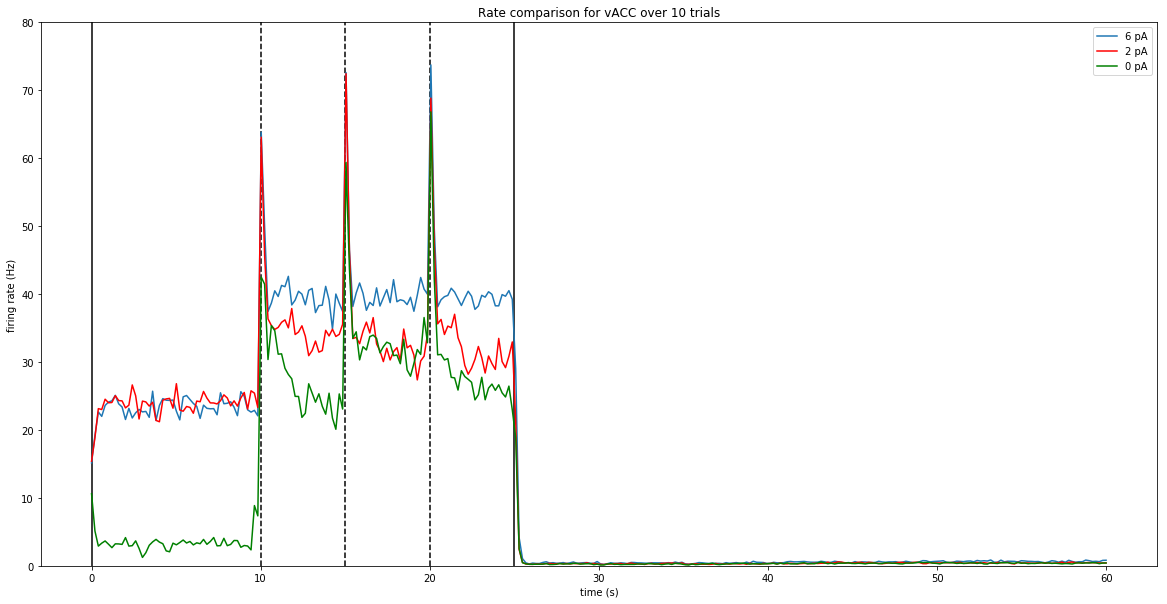

In [34]:
times = np.linspace(0,60, num = len(Mv_rate_average_6pA))

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title(r'Rate comparison for vACC')
ax.set_ylim([0, 80])
plt.vlines(10.0,0,80,linestyle = 'dashed')
plt.vlines(15.0,0,80,linestyle = 'dashed')
plt.vlines(20.0,0,80,linestyle = 'dashed')
plt.vlines(0,0,80,linestyle = 'solid')
plt.vlines(25.0,0,80,linestyle = 'solid')

plot(times,Mv_rate_average_6pA,label = '6 pA')
plot(times,Mv_rate_average_2pA,'r',label = '2 pA')
plot(times,Mv_rate_average_0pA,'g',label = '0 pA')
title('Rate comparison for vACC over 10 trials')
ylabel('firing rate (Hz)')
xlabel('time (s)')

plt.legend()
plt.savefig('6pA, 2pA,0pA for vACC 60 s over 10 trials')
plt.show()






In [ ]:
times = np.linspace(0,60, num = len(Mv_rate_0pA))

fig, ax = plt.subplots(figsize=(20, 10))


ax.set_ylim([0, 80])
plt.vlines(25.0,0,80,linestyle = 'dashed')
plt.vlines(30.0,0,80,linestyle = 'dashed')
plt.vlines(35.0,0,80,linestyle = 'dashed')
plt.vlines(40.0,0,80,linestyle = 'solid')
plot(times,Md_rate_2pA,label = '2 pA')
plot(times,Md_rate_0pA,'r',label = '0 pA')
plot(times,Md_rate_3pA,'b',label = '3 pA')
title('Rate comparison for dlPFC')
ylabel('firing rate (Hz)')
xlabel('time (s)')

plt.legend()
plt.savefig('0pA, 2pA, 3 for dlPFC 60 s ')
plt.show()






In [ ]:
Md_rate_2pA =[1.08750e+01, 1.68750e+00, 5.00000e-01, 6.25000e-02, 2.50000e-01,
       2.50000e-01, 3.12500e-01, 3.75000e-01, 3.12500e-01, 3.75000e-01,
       5.62500e-01, 1.18750e+00, 5.62500e-01, 6.25000e-02, 2.50000e-01,
       1.87500e-01, 6.25000e-01, 4.37500e-01, 1.25000e-01, 3.12500e-01,
       3.12500e-01, 3.12500e-01, 3.75000e-01, 2.50000e-01, 2.50000e-01,
       3.75000e-01, 8.75000e-01, 3.12500e-01, 3.75000e-01, 3.75000e-01,
       2.50000e-01, 2.50000e-01, 1.87500e-01, 2.50000e-01, 1.25000e-01,
       3.12500e-01, 5.00000e-01, 4.37500e-01, 3.12500e-01, 3.12500e-01,
       3.75000e-01, 3.75000e-01, 3.75000e-01, 2.50000e-01, 3.12500e-01,
       3.12500e-01, 4.37500e-01, 5.00000e-01, 3.12500e-01, 3.12500e-01,
       6.25000e-02, 1.25000e-01, 1.25000e-01, 6.25000e-02, 3.12500e-01,
       3.75000e-01, 5.00000e-01, 1.25000e-01, 3.12500e-01, 1.25000e-01,
       1.25000e-01, 6.25000e-01, 6.25000e-02, 6.25000e-02, 0.00000e+00,
       3.12500e-01, 1.87500e-01, 4.37500e-01, 2.50000e-01, 2.50000e-01,
       6.25000e-02, 3.12500e-01, 1.25000e-01, 1.25000e-01, 2.50000e-01,
       6.25000e-02, 6.25000e-02, 2.50000e-01, 6.87500e-01, 2.50000e-01,
       1.87500e-01, 6.87500e-01, 1.87500e-01, 4.37500e-01, 5.00000e-01,
       2.50000e-01, 3.75000e-01, 1.87500e-01, 4.37500e-01, 1.87500e-01,
       1.25000e-01, 1.87500e-01, 6.25000e-02, 1.25000e-01, 4.37500e-01,
       5.00000e-01, 1.25000e-01, 1.87500e-01, 1.25000e-01, 2.50000e-01,
       0.00000e+00, 0.00000e+00, 6.25000e-02, 1.87500e-01, 1.25000e-01,
       4.37500e-01, 2.50000e-01, 5.62500e-01, 1.87500e-01, 6.25000e-02,
       1.25000e-01, 2.50000e-01, 1.25000e-01, 6.25000e-02, 3.12500e-01,
       4.37500e-01, 4.37500e-01, 1.25000e-01, 3.12500e-01, 6.25000e-02,
       6.25000e-02, 1.87500e-01, 1.25000e-01, 1.25000e-01, 3.12500e-01,
       3.61875e+01, 4.77500e+01, 3.36875e+01, 4.23750e+01, 2.75000e+01,
       2.65000e+01, 3.46250e+01, 3.63750e+01, 2.53125e+01, 3.11875e+01,
       3.56250e+01, 3.11875e+01, 3.38125e+01, 3.60000e+01, 2.44375e+01,
       3.60000e+01, 3.38125e+01, 3.31875e+01, 3.48125e+01, 3.86250e+01,
       1.67500e+01, 2.86875e+01, 8.06250e+00, 4.93750e+00, 1.37500e+00,
       4.68750e+01, 4.71875e+01, 3.28750e+01, 2.46250e+01, 2.31250e+01,
       2.53125e+01, 3.08125e+01, 2.66250e+01, 2.58750e+01, 3.96250e+01,
       3.58750e+01, 3.82500e+01, 3.25000e+01, 3.10625e+01, 3.45625e+01,
       3.37500e+01, 3.22500e+01, 3.23750e+01, 3.58125e+01, 2.83125e+01,
       2.58750e+01, 3.89375e+01, 3.51875e+01, 2.33750e+01, 2.51875e+01,
       7.26250e+01, 4.61875e+01, 2.94375e+01, 2.93125e+01, 2.57500e+01,
       2.91875e+01, 3.45625e+01, 3.01250e+01, 2.65000e+01, 2.15625e+01,
       3.30625e+01, 2.93125e+01, 3.39375e+01, 2.92500e+01, 3.69375e+01,
       3.46875e+01, 3.83750e+01, 3.81250e+01, 3.61875e+01, 3.41250e+01,
       3.49375e+01, 2.93125e+01, 1.88125e+01, 3.13125e+01, 3.22500e+01,
       3.62500e+01, 3.11250e+01, 3.57500e+01, 3.40000e+01, 4.03125e+01,
       3.56250e+01, 3.06875e+01, 3.58750e+01, 3.55000e+01, 3.22500e+01,
       3.32500e+01, 2.25000e+01, 3.35000e+01, 4.39375e+01, 3.54375e+01,
       3.41250e+01, 3.13125e+01, 3.68750e+01, 3.91250e+01, 3.10625e+01,
       3.68125e+01, 3.71875e+01, 3.65625e+01, 3.20000e+01, 3.49375e+01,
       3.71875e+01, 3.44375e+01, 3.45000e+01, 3.41250e+01, 3.72500e+01,
       3.59375e+01, 3.64375e+01, 1.81875e+01, 1.91250e+01, 3.83125e+01,
       3.95000e+01, 1.32500e+01, 8.31250e+00, 5.87500e+00, 3.18750e+00,
       1.18750e+00, 1.12500e+00, 4.37500e-01, 5.62500e-01, 5.00000e-01,
       5.62500e-01, 4.37500e-01, 5.00000e-01, 2.50000e-01, 1.25000e-01,
       5.62500e-01, 3.12500e-01, 5.00000e-01, 5.00000e-01, 6.87500e-01,
       3.12500e-01, 5.62500e-01, 7.50000e-01, 4.37500e-01, 7.50000e-01,
       1.37500e+00, 7.50000e-01, 5.00000e-01, 3.12500e-01, 1.25000e-01,
       6.87500e-01, 6.87500e-01, 6.25000e-02, 3.12500e-01, 4.37500e-01,
       6.25000e-01, 5.00000e-01, 3.75000e-01, 5.62500e-01, 3.12500e-01,
       3.12500e-01, 6.25000e-01, 5.00000e-01, 1.06250e+00, 5.00000e-01,
       3.12500e-01, 5.62500e-01, 6.25000e-01, 4.37500e-01, 1.31250e+00,
       5.00000e-01, 5.00000e-01, 5.00000e-01, 3.75000e-01, 2.50000e-01,
       1.25000e-01, 1.12500e+00, 7.50000e-01, 6.87500e-01, 4.37500e-01,
       5.62500e-01, 5.62500e-01, 3.12500e-01, 1.25000e-01, 3.75000e-01]

In [ ]:
import numpy as np
difference_1pA  = statistics.mean(list(np.array(Mean_potential_per_bin_1pA))) - (-0.05408395860867786)
print(difference_1pA)

In [ ]:
Mv_rate_0pA  = [1.14375e+01, 3.56250e+00, 8.75000e-01, 5.00000e-01, 1.87500e-01,
       1.25000e-01, 5.00000e-01, 1.87500e-01, 4.37500e-01, 3.12500e-01,
       5.00000e-01, 5.00000e-01, 5.62500e-01, 8.75000e-01, 1.00000e+00,
       5.62500e-01, 8.12500e-01, 4.37500e-01, 6.87500e-01, 3.12500e-01,
       4.37500e-01, 5.00000e-01, 1.06250e+00, 2.50000e-01, 5.00000e-01,
       4.37500e-01, 3.12500e-01, 5.62500e-01, 6.25000e-01, 6.25000e-01,
       3.75000e-01, 4.37500e-01, 6.25000e-01, 5.62500e-01, 4.37500e-01,
       3.12500e-01, 4.37500e-01, 7.50000e-01, 6.25000e-01, 5.00000e-01,
       5.62500e-01, 6.25000e-01, 5.62500e-01, 3.75000e-01, 3.12500e-01,
       3.75000e-01, 1.06250e+00, 1.12500e+00, 5.62500e-01, 5.00000e-01,
       4.91250e+01, 4.16875e+01, 3.63750e+01, 3.39375e+01, 3.15000e+01,
       2.17500e+01, 3.41250e+01, 3.35625e+01, 2.60625e+01, 3.27500e+01,
       3.38750e+01, 3.62500e+01, 3.72500e+01, 3.03125e+01, 3.63750e+01,
       3.16875e+01, 3.06250e+01, 2.90625e+01, 2.64375e+01, 3.59375e+01,
       3.92500e+01, 3.15625e+01, 2.95625e+01, 3.98125e+01, 3.06250e+01,
       7.20000e+01, 3.83750e+01, 2.43125e+01, 3.74375e+01, 2.88125e+01,
       3.66250e+01, 3.60000e+01, 2.92500e+01, 2.87500e+01, 3.43750e+01,
       3.06250e+01, 3.91875e+01, 3.20000e+01, 3.40000e+01, 2.83750e+01,
       3.29375e+01, 3.31250e+01, 3.62500e+01, 3.64375e+01, 3.08750e+01,
       3.20000e+01, 3.55000e+01, 3.11875e+01, 3.29375e+01, 2.85625e+01,
       7.05625e+01, 4.66250e+01, 3.30000e+01, 3.36250e+01, 2.61875e+01,
       1.55625e+01, 3.23750e+01, 3.84375e+01, 3.49375e+01, 3.13750e+01,
       2.55625e+01, 1.48125e+01, 2.57500e+01, 3.88750e+01, 2.23750e+01,
       3.41875e+01, 3.81250e+01, 3.58750e+01, 3.41875e+01, 3.45625e+01,
       2.81875e+01, 2.88125e+01, 3.20000e+01, 2.18125e+01, 2.20000e+01,
       1.55625e+01, 4.37500e-01, 3.12500e-01, 5.62500e-01, 3.75000e-01,
       1.87500e-01, 2.50000e-01, 1.25000e-01, 3.12500e-01, 3.75000e-01,
       6.25000e-02, 1.25000e-01, 1.25000e-01, 2.50000e-01, 2.50000e-01,
       2.50000e-01, 1.87500e-01, 1.25000e-01, 0.00000e+00, 1.87500e-01,
       1.25000e-01, 3.12500e-01, 0.00000e+00, 3.12500e-01, 2.50000e-01,
       1.25000e-01, 1.87500e-01, 2.50000e-01, 1.87500e-01, 3.75000e-01,
       1.87500e-01, 5.62500e-01, 4.37500e-01, 3.75000e-01, 6.25000e-01,
       3.12500e-01, 1.87500e-01, 2.50000e-01, 1.25000e-01, 3.12500e-01,
       1.87500e-01, 4.37500e-01, 1.25000e-01, 1.87500e-01, 4.37500e-01,
       5.00000e-01, 1.25000e-01, 1.25000e-01, 1.25000e-01, 1.25000e-01,
       2.50000e-01, 1.25000e-01, 3.12500e-01, 6.25000e-02, 1.87500e-01,
       1.25000e-01, 2.50000e-01, 3.75000e-01, 6.25000e-02, 2.50000e-01,
       6.25000e-02, 2.50000e-01, 6.25000e-02, 1.25000e-01, 6.87500e-01,
       6.25000e-02, 1.87500e-01, 4.37500e-01, 1.25000e-01, 2.50000e-01,
       1.87500e-01, 4.37500e-01, 3.12500e-01, 3.12500e-01, 1.87500e-01,
       3.75000e-01, 1.25000e-01, 0.00000e+00, 1.25000e-01, 2.50000e-01,
       5.62500e-01, 2.50000e-01, 3.12500e-01, 3.12500e-01, 5.62500e-01,
       3.12500e-01, 1.87500e-01, 1.87500e-01, 5.62500e-01, 1.87500e-01,
       3.75000e-01, 1.87500e-01, 5.00000e-01, 5.00000e-01, 4.37500e-01,
       5.00000e-01, 5.62500e-01, 6.25000e-01, 2.50000e-01, 5.00000e-01]

In [ ]:
Md_rate_0pA = [12.5625,  1.5   ,  0.4375,  0.25  ,  0.4375,  0.25  ,  0.1875,
        0.25  ,  0.25  ,  0.3125,  0.125 ,  0.5625,  0.3125,  0.4375,
        0.5625,  0.375 ,  0.375 ,  0.375 ,  0.375 ,  0.3125,  0.625 ,
        0.375 ,  0.1875,  0.4375,  0.3125,  0.125 ,  0.5   ,  0.125 ,
        0.0625,  0.25  ,  0.375 ,  0.375 ,  0.375 ,  0.4375,  0.375 ,
        0.6875,  0.25  ,  0.375 ,  0.1875,  0.375 ,  0.25  ,  0.3125,
        0.375 ,  0.25  ,  0.375 ,  0.3125,  0.6875,  0.375 ,  0.375 ,
        0.125 ,  0.    ,  0.375 ,  0.1875,  0.0625,  0.    ,  0.125 ,
        0.25  ,  0.125 ,  0.0625,  0.125 ,  0.4375,  0.    ,  0.25  ,
        0.0625,  0.1875,  0.0625,  0.3125,  0.1875,  0.0625,  0.3125,
        0.1875,  0.0625,  0.0625,  0.125 ,  0.25  ,  0.125 ,  0.0625,
        0.0625,  0.125 ,  0.1875,  0.0625,  0.125 ,  0.    ,  0.125 ,
        0.25  ,  0.25  ,  0.5625,  0.4375,  0.25  ,  0.125 ,  0.3125,
        0.3125,  0.25  ,  0.25  ,  0.375 ,  0.375 ,  0.1875,  0.375 ,
        0.5   ,  0.3125,  0.125 ,  0.    ,  0.0625,  0.25  ,  0.0625,
        0.1875,  0.25  ,  0.1875,  0.375 ,  0.1875,  0.1875,  0.1875,
        0.125 ,  0.375 ,  0.1875,  0.3125,  0.0625,  0.25  ,  0.25  ,
        0.375 ,  0.3125,  0.25  ,  0.1875,  0.4375,  0.0625, 32.0625,
       41.125 , 26.625 , 33.8125, 34.5   , 22.0625,  9.4375,  3.    ,
        0.375 ,  0.4375,  0.625 ,  0.375 ,  0.125 ,  0.25  ,  0.4375,
        0.375 ,  0.125 ,  0.125 ,  0.5625,  0.75  ,  0.4375,  0.4375,
        0.1875,  0.6875,  0.375 , 50.5   , 41.9375, 33.0625, 35.9375,
       27.125 , 21.5   , 34.875 , 34.375 , 36.9375, 22.1875, 32.0625,
       22.6875, 24.5625,  7.8125,  6.0625,  1.9375,  0.9375,  0.25  ,
        0.3125,  0.25  ,  0.5625,  0.4375,  0.3125,  0.4375,  0.25  ,
       52.375 , 45.5   , 37.9375, 33.4375, 25.25  , 26.125 , 37.    ,
       37.5625, 31.    , 27.5   , 30.    , 22.6875, 27.1875, 27.0625,
       22.25  , 29.9375, 29.5625, 38.5625, 29.9375, 29.4375, 37.3125,
       20.    , 22.75  , 30.4375, 36.75  , 24.5625, 28.5   , 38.375 ,
       31.4375, 28.6875, 31.3125, 22.    , 40.875 , 23.9375, 13.75  ,
       29.1875, 31.25  , 29.875 , 35.5   , 33.125 , 26.1875, 17.4375,
       20.3125, 28.5   , 32.5625, 27.0625, 31.3125, 24.875 , 33.25  ,
       25.75  , 28.25  , 27.8125, 25.375 , 26.75  , 31.4375, 31.125 ,
       33.375 , 30.875 , 36.625 , 30.1875, 26.1875, 26.1875, 29.0625,
       33.75  , 28.4375, 23.8125, 35.    , 34.    , 27.3125, 36.5   ,
       22.75  , 21.625 , 30.75  , 39.75  , 38.75  , 24.0625, 27.9375,
       35.    , 28.6875, 28.75  , 33.1875, 40.9375, 33.    , 30.375 ,
       35.0625, 29.125 , 39.3125, 27.625 , 25.5625, 30.8125, 25.4375,
       25.8125, 31.8125, 31.75  , 21.125 , 28.3125, 19.6875, 13.3125,
       24.9375, 33.375 , 30.8125, 33.5625, 29.9375, 31.9375, 27.0625,
       33.875 , 26.8125, 24.25  , 31.0625, 37.3125, 20.875 , 31.625 ,
       27.3125, 32.875 , 22.3125, 33.1875, 36.3125, 35.75  , 37.1875,
       29.5625, 31.3125, 31.    , 31.75  , 25.8125, 35.125 ]